In [1]:
# ADDED LINES FOR RE-GRAPHING PURPOSES
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

master_data_link = 'https://drive.google.com/file/d/1vofyAQyIGpK0GVJYOAeFgQkAcFKSWVog/view?usp=sharing' # Shareable link to the master data CSV file

id = master_data_link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Coffee_Stores_Data.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import *
from datetime import datetime
from datetime import timedelta
from datetime import date
import holidays
%matplotlib inline

coffeeData = pd.read_csv('Coffee_Stores_Data.csv')

In [3]:
product_occurences = coffeeData.sort_values('Description')
#product_occurences = coffeeData.sort_values()
print(product_occurences['Description'].value_counts()) #show the products in order of most number of appearances to least (for filtering least 4 common products)

Plain Bagel                                    46521
Butter Croissant                               46514
Everything Bagel                               46505
Blueberry Scone                                46460
Chocolate Croissant                            46440
Jalapeno Cheese Bagel                          45249
Muffin - Blueberry Streusel                    44439
Danish - Classic Cheese                        44418
Protein Box                                    44396
Caprese Sandwich                               44391
Almond Croissant                               44370
Egg| Spinach & Cheddar Sandwich on Ciabatta    44370
Cinnamon Roll                                  44329
Muffin - Double Chocolate                      44328
Tasty Tuna Salad Sandwich                      44322
Breakfast Burrito Egg Beans & Rice             44308
Honey Raisin Bran Muffin                       44249
Mixed Fruit Snack Pot                          44094
Croissant - White Cheddar Jalapeno            

In [4]:
coffeeData_filtered = coffeeData[~coffeeData['Description'].isin(['Caramel Cake Pop', 'Egg White Pesto Wrap', 'Overnight Oats', 'Breakfast Burrito Egg Beans & Rice', 'Honey Raisin Bran Muffin', 'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich', 'Vive Juice Shot'])] #remove the least 4 common products + all second half products
coffeeData_filtered = coffeeData_filtered[~coffeeData_filtered['StoreID'].isin([18, 117, 332])] #remove stores 18, 117, and 332 (for team A)
coffeeData_filtered = coffeeData_filtered.drop_duplicates() #remove any duplicate data which may appear
print(coffeeData_filtered['Description'].value_counts())

Butter Croissant                               45413
Everything Bagel                               45404
Blueberry Scone                                45359
Chocolate Croissant                            45339
Danish - Classic Cheese                        43317
Caprese Sandwich                               43290
Egg| Spinach & Cheddar Sandwich on Ciabatta    43269
Almond Croissant                               43269
Cinnamon Roll                                  43228
Croissant - White Cheddar Jalapeno             42747
Cookie - Chocolate Chunk                       41337
Coffee Cake with Streusel                      40327
Pretzel Egg Mozzarella Sandwich                39171
Name: Description, dtype: int64


In [5]:
coffeeData_filtered = coffeeData[~coffeeData['Description'].isin(['Caramel Cake Pop', 'Egg White Pesto Wrap', 'Overnight Oats', 'Breakfast Burrito Egg Beans & Rice', 'Honey Raisin Bran Muffin', 'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich', 'Vive Juice Shot'])] #remove the least 4 common products + all second half products
coffeeData_filtered = coffeeData_filtered[~coffeeData_filtered['StoreID'].isin([18, 117, 332])] #remove stores 18, 117, and 332 (for team A)
coffeeData_filtered = coffeeData_filtered.drop_duplicates() #remove any duplicate data which may appear
print(coffeeData_filtered['Description'].value_counts())

Butter Croissant                               45413
Everything Bagel                               45404
Blueberry Scone                                45359
Chocolate Croissant                            45339
Danish - Classic Cheese                        43317
Caprese Sandwich                               43290
Egg| Spinach & Cheddar Sandwich on Ciabatta    43269
Almond Croissant                               43269
Cinnamon Roll                                  43228
Croissant - White Cheddar Jalapeno             42747
Cookie - Chocolate Chunk                       41337
Coffee Cake with Streusel                      40327
Pretzel Egg Mozzarella Sandwich                39171
Name: Description, dtype: int64


StoreID           PLU  ReceivedQuantity   SoldQuantity  \
count  561470.000000  5.614700e+05     561470.000000  561470.000000   
mean      185.977315  1.960649e+06          5.222680       3.884517   
std       120.190304  1.087815e+06          3.789569       3.144336   
min         2.000000  8.107030e+05        -14.000000       0.000000   
25%        83.000000  8.208010e+05          3.000000       2.000000   
50%       169.000000  3.000159e+06          4.000000       3.000000   
75%       315.000000  3.000210e+06          8.000000       6.000000   
max       401.000000  3.000281e+06         90.000000      43.000000   

         EndQuantity    LatestOrder     StockedOut        GroupID  \
count  561470.000000  561470.000000  561470.000000  561361.000000   
mean        1.029754      11.406620       0.365827       3.529932   
std         2.524614       5.794575       0.481662       1.251131   
min       -26.000000       0.000000       0.000000       1.000000   
25%         0.000000       9.000000       0.000000       3.000000   
50%         0.000000      12.000000       0.000000       4.000000   
75%         1.000000      16.000000       1.000000       5.000000   
max       142.000000      23.000000       1.000000       5.000000   

         MissedSales  
count  554618.000000  
mean        0.522630  
std         1.077986  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.616058  
max        17.581967

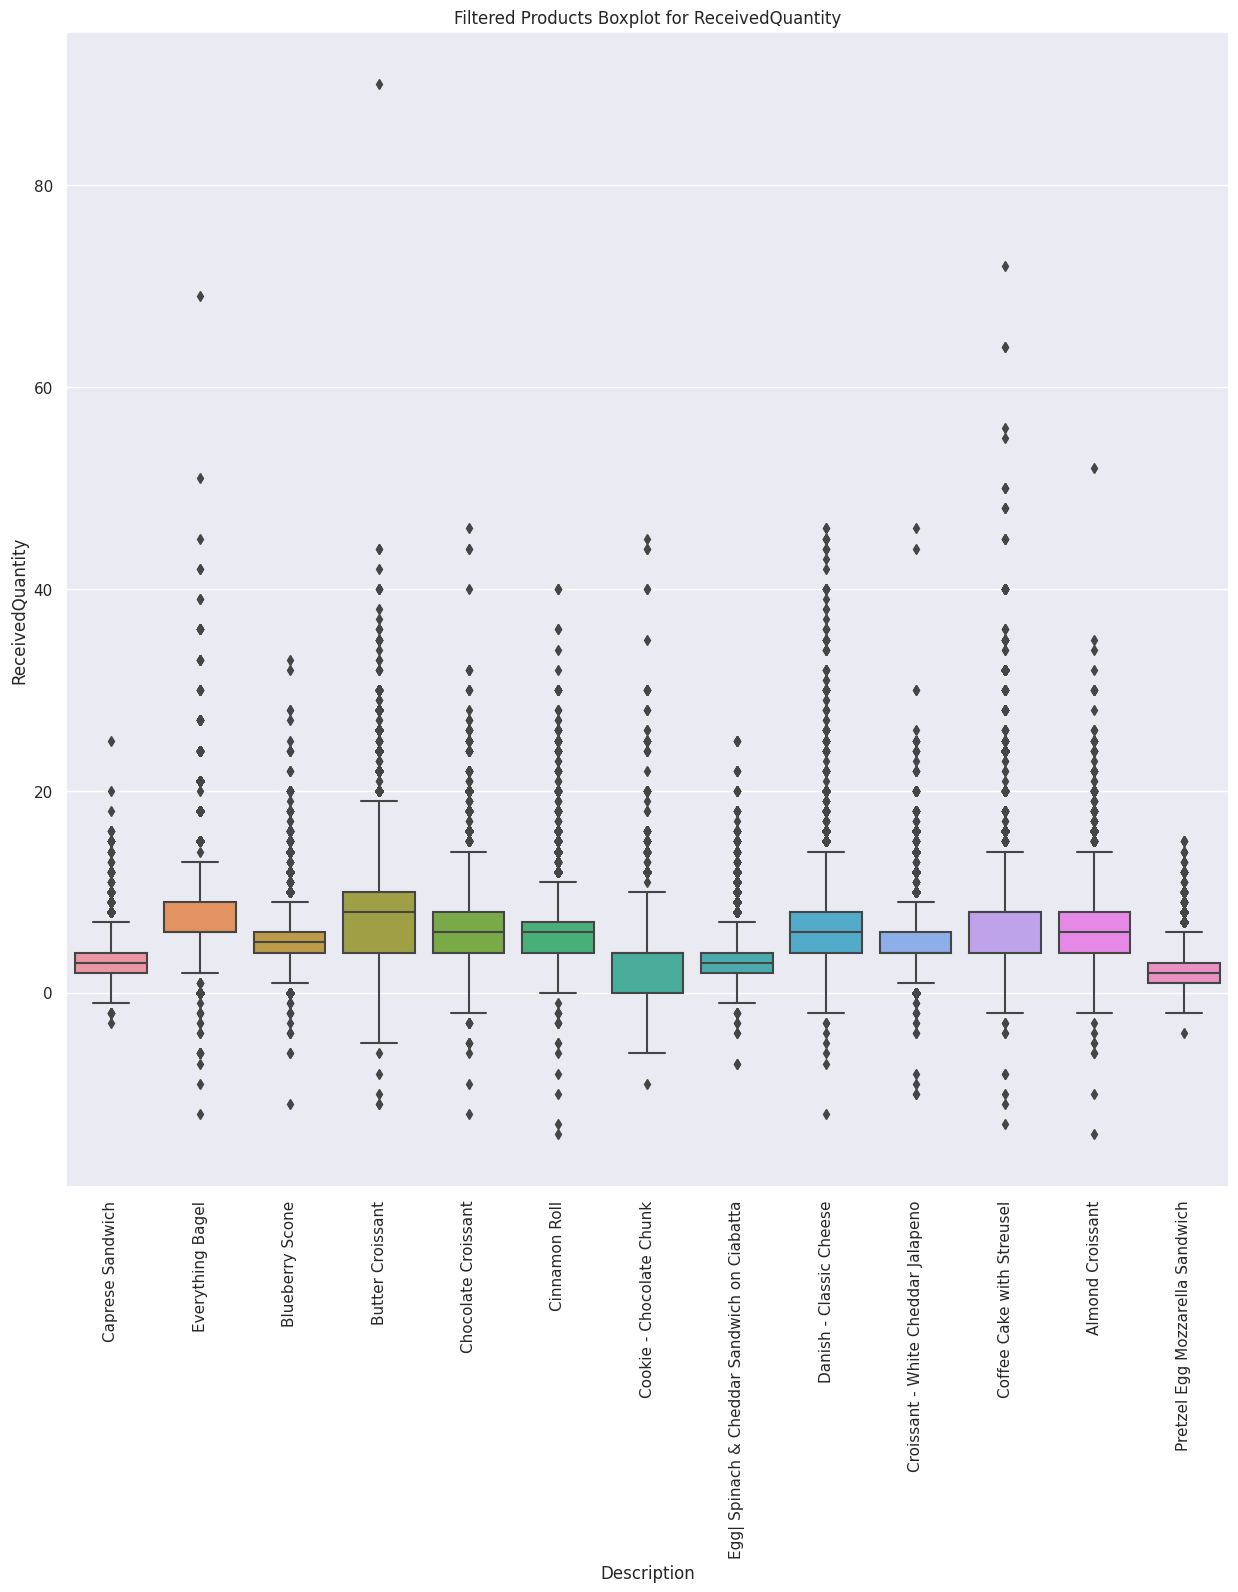

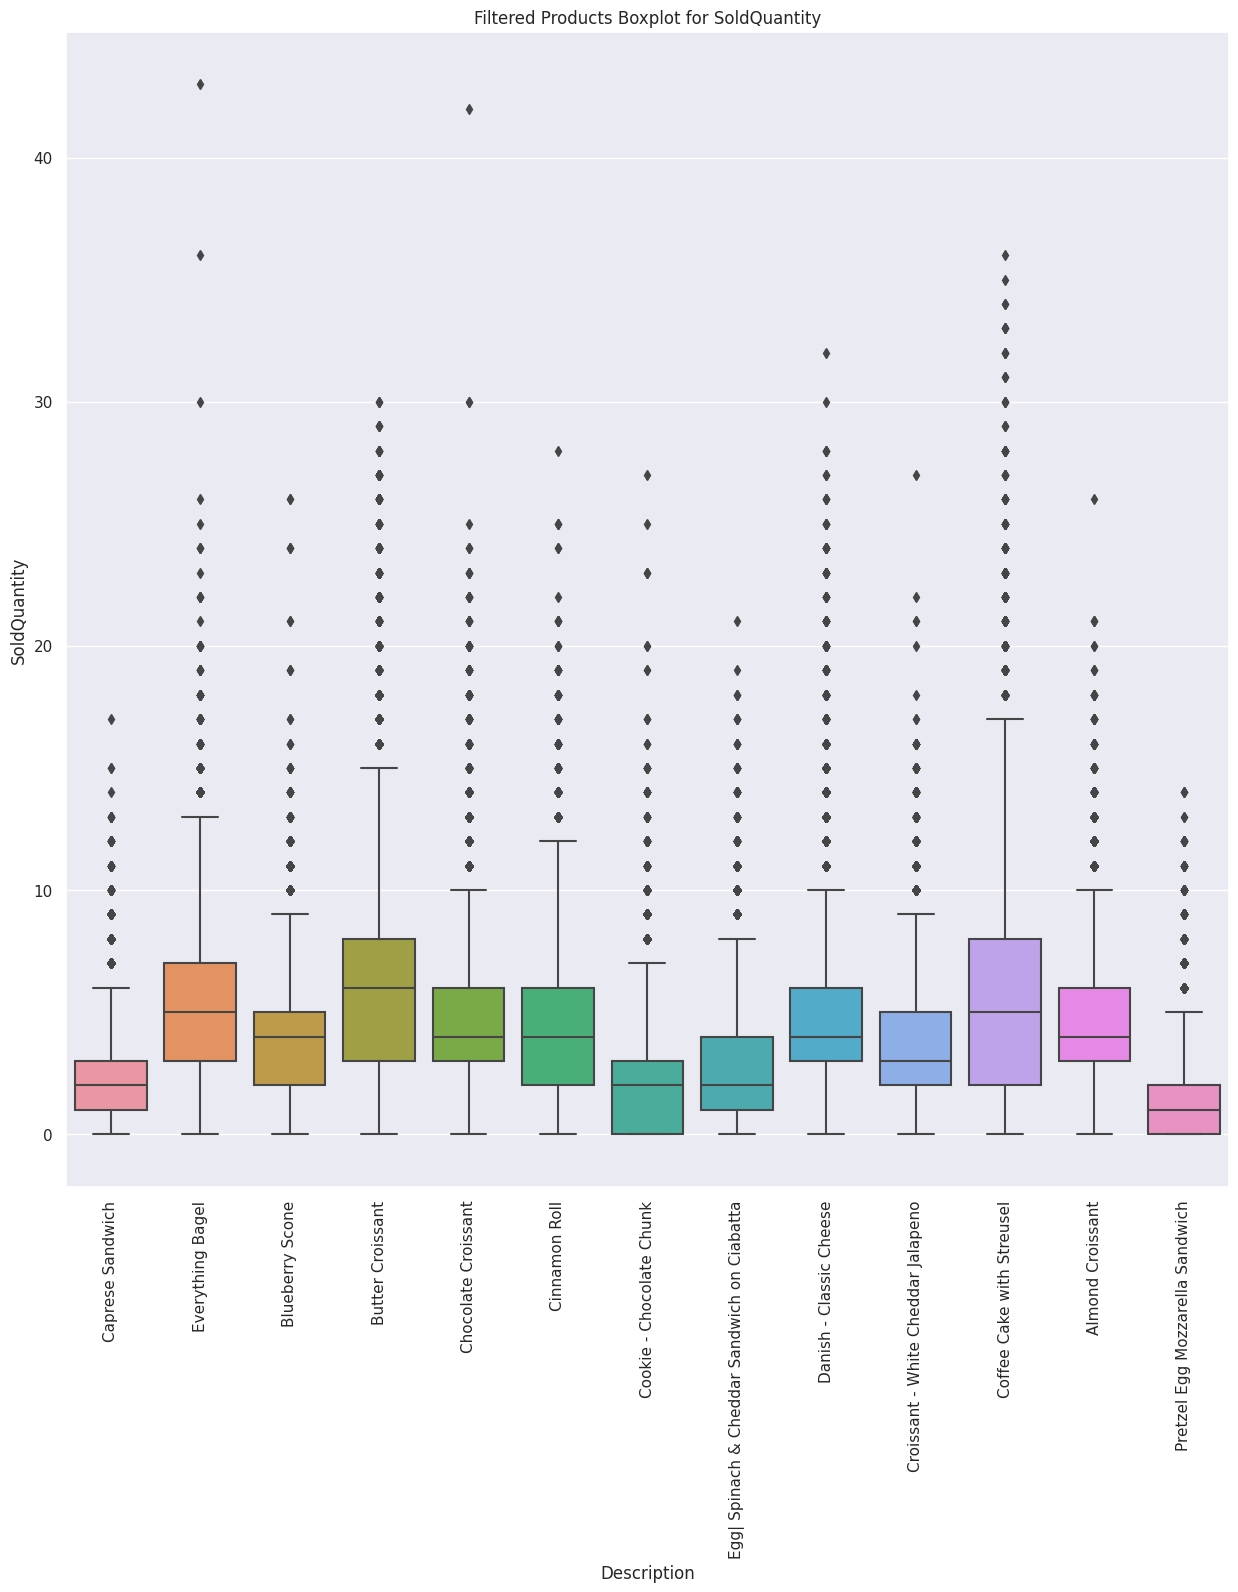

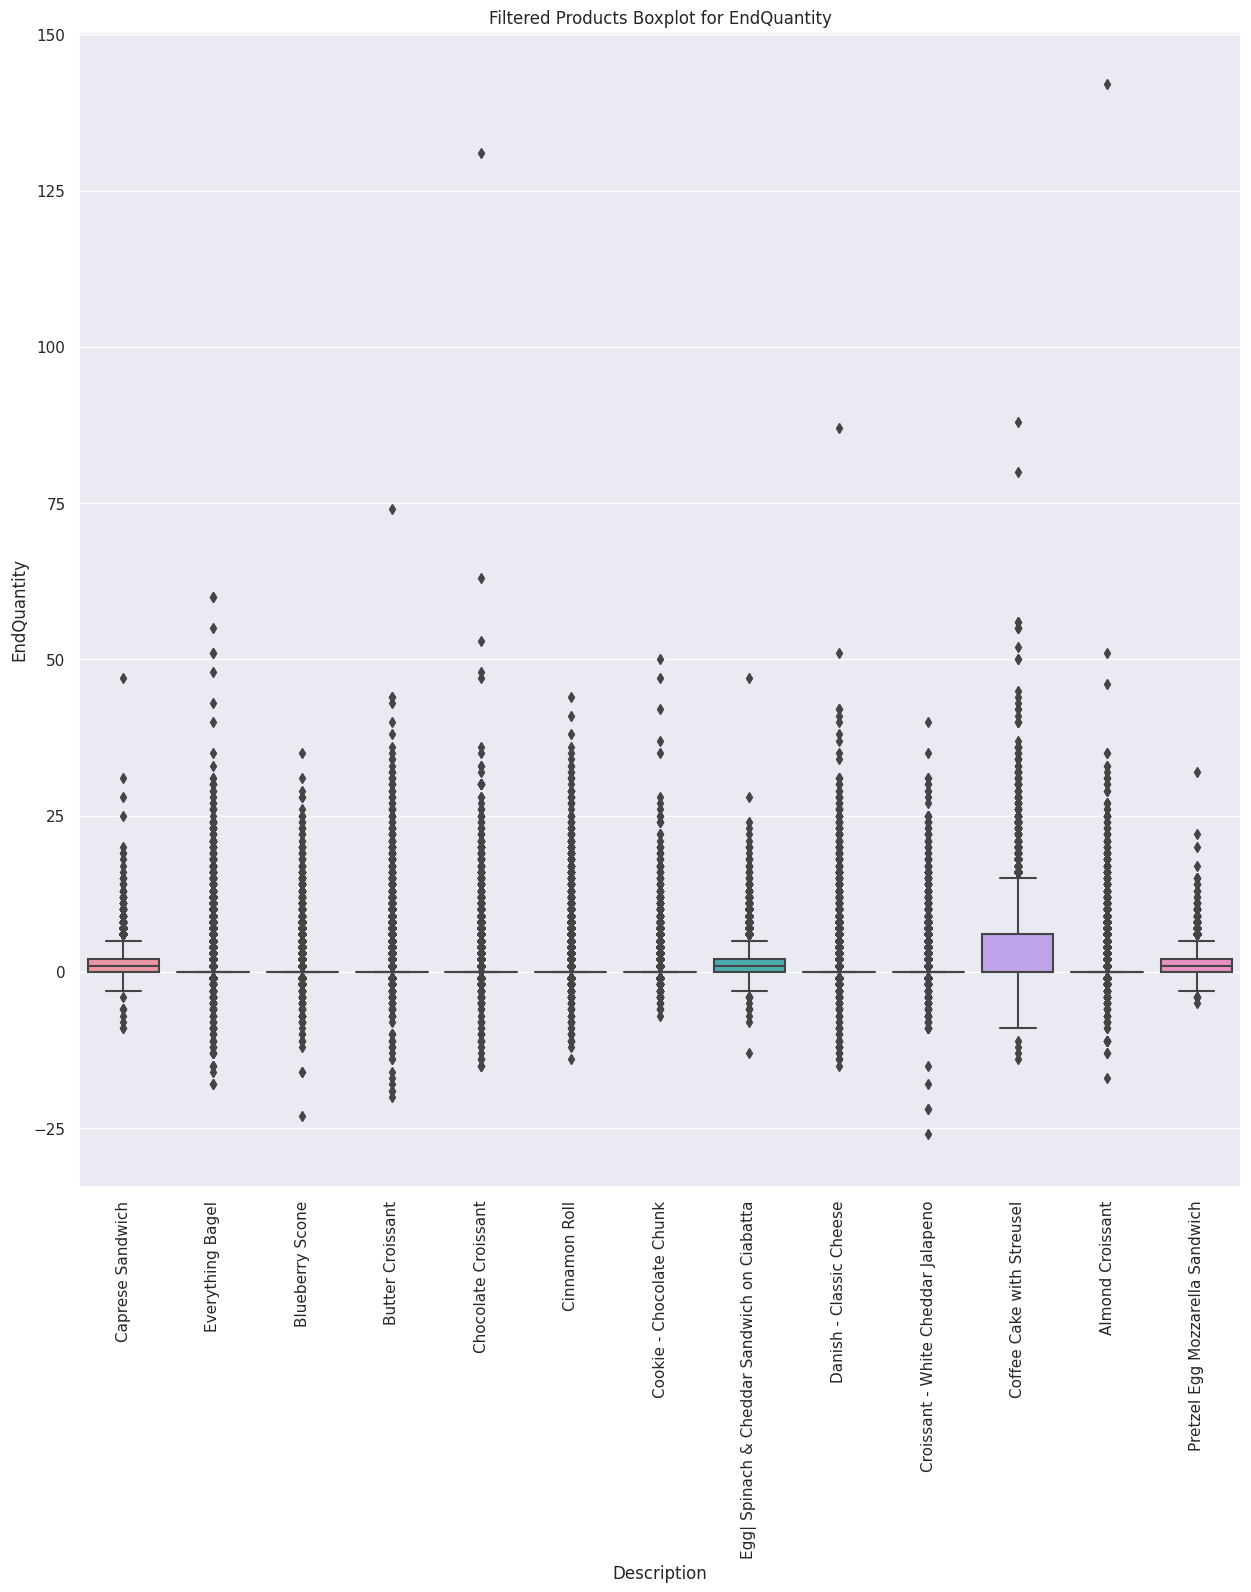

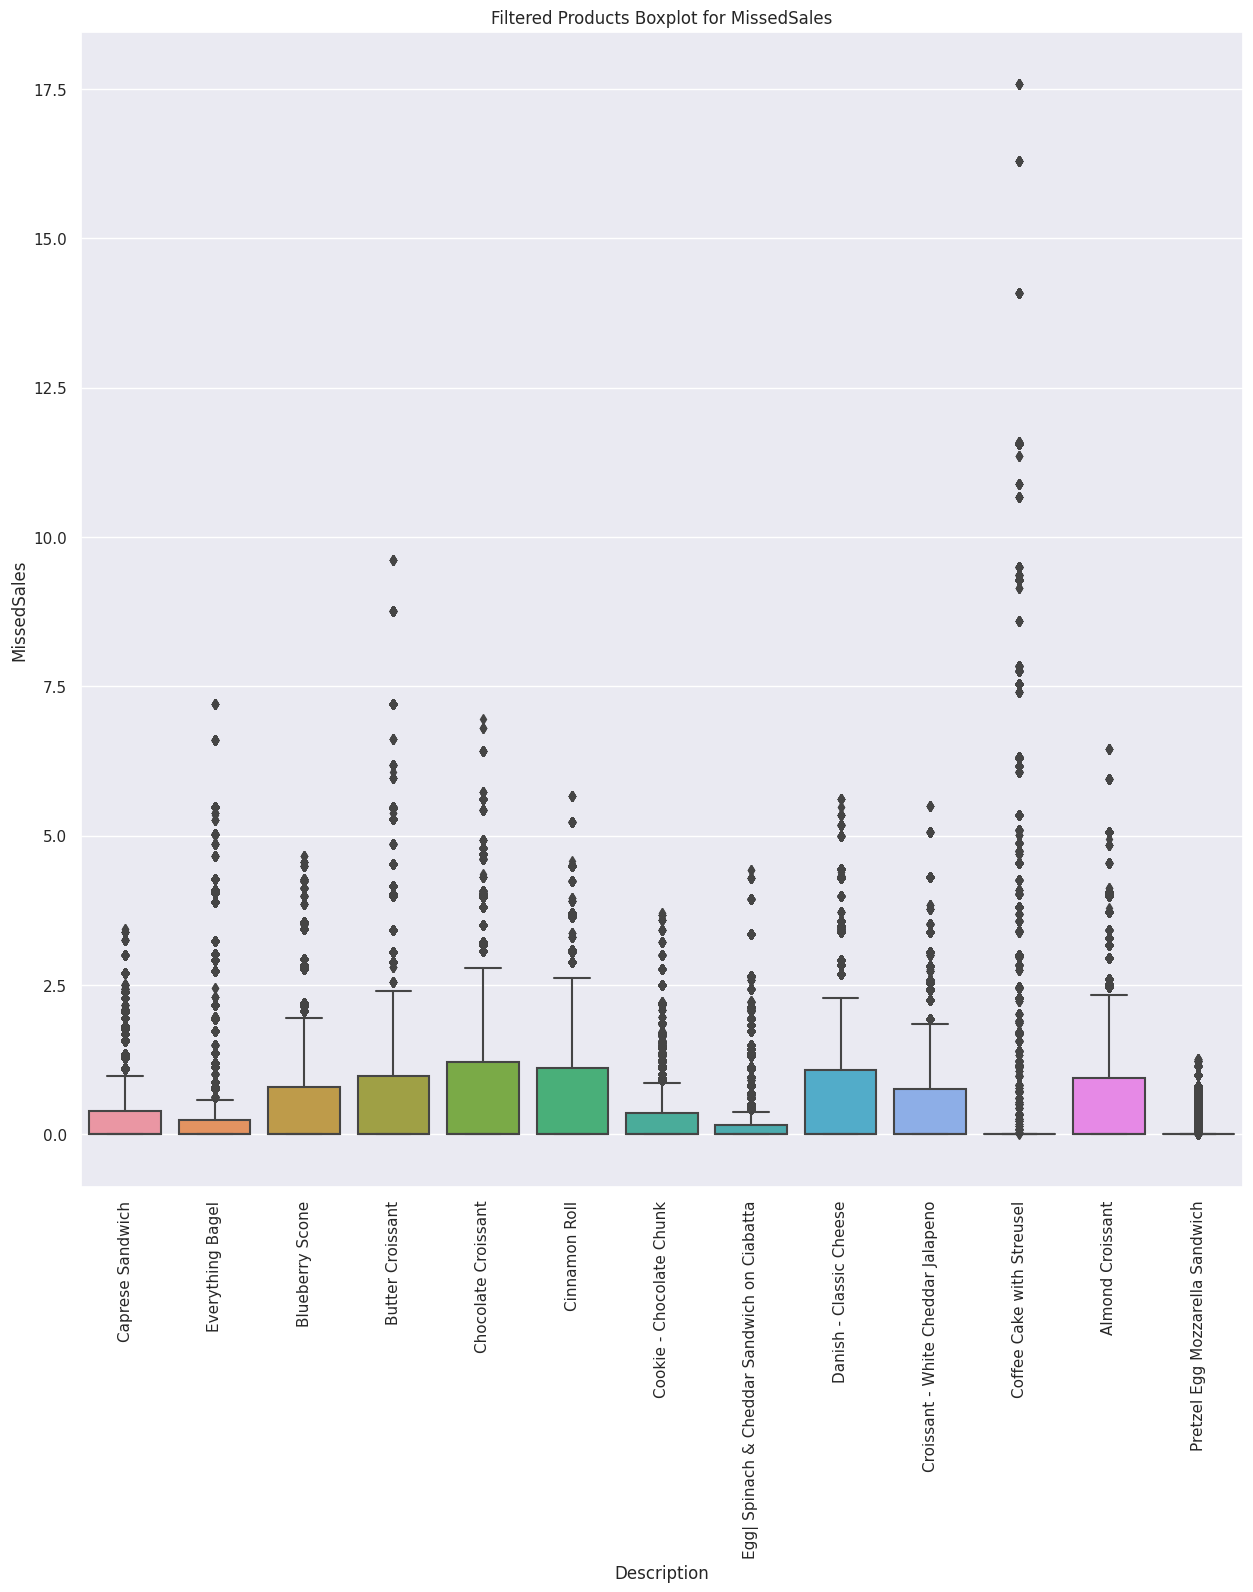

In [6]:
i = 0
columns_to_boxplot=['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'MissedSales']
sns.set(rc={'figure.figsize':(15, 15)})
for column in columns_to_boxplot:
    plt.figure()
    myplot = sns.boxplot(x=coffeeData_filtered['Description'], y=coffeeData_filtered[column])
    myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)
    myplot.set_title('Filtered Products Boxplot for {}'.format(column))
    #myplot.figure.savefig('Plot 1_{}'.format(i))
    i += 1
coffeeData_filtered.describe()

In [9]:
# Calculate the sum of SoldQuantity for each product
product_sales_series = coffeeData_filtered.groupby('Description')['SoldQuantity'].sum()

# Sort the products by SoldQuantity in descending order
products_sorted_by_sales = product_sales_series.sort_values(ascending=False)

# Determine the number of products to take for top and bottom 25%
product_percentage = int(len(products_sorted_by_sales) * 0.25)

# Get the top 25% and bottom 25% of products
top25_percent_products = products_sorted_by_sales.head(product_percentage).index.tolist()
bottom25_percent_products = products_sorted_by_sales.tail(product_percentage).index.tolist()


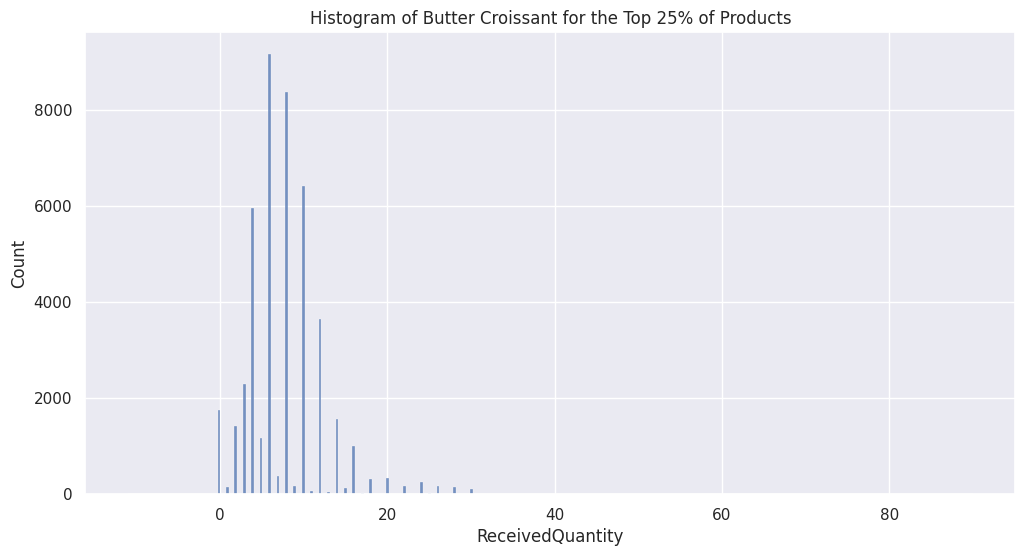

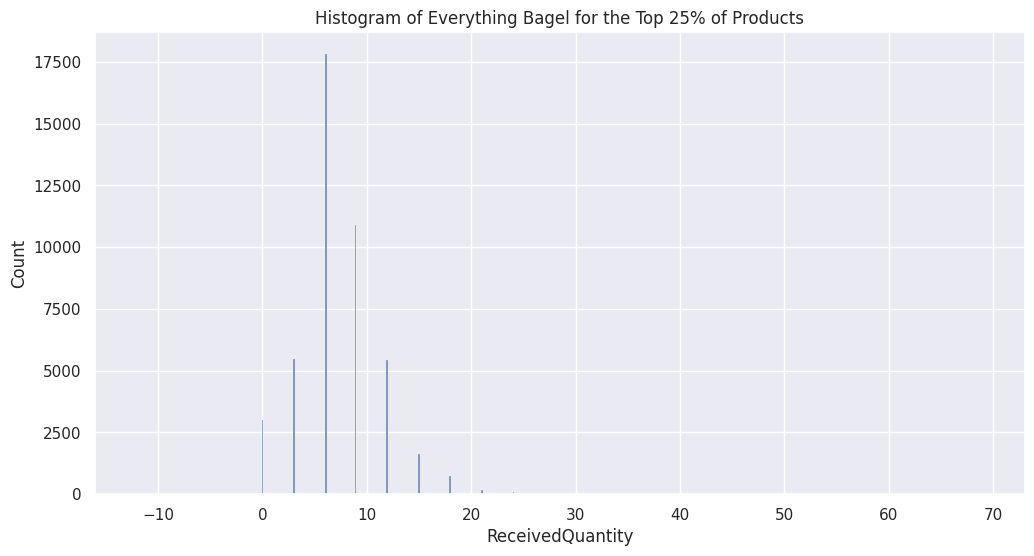

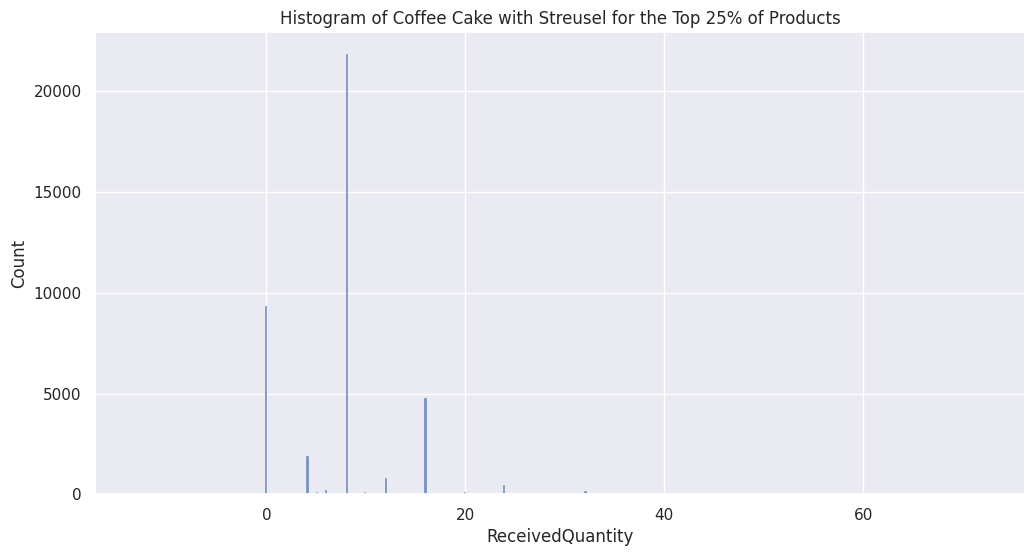

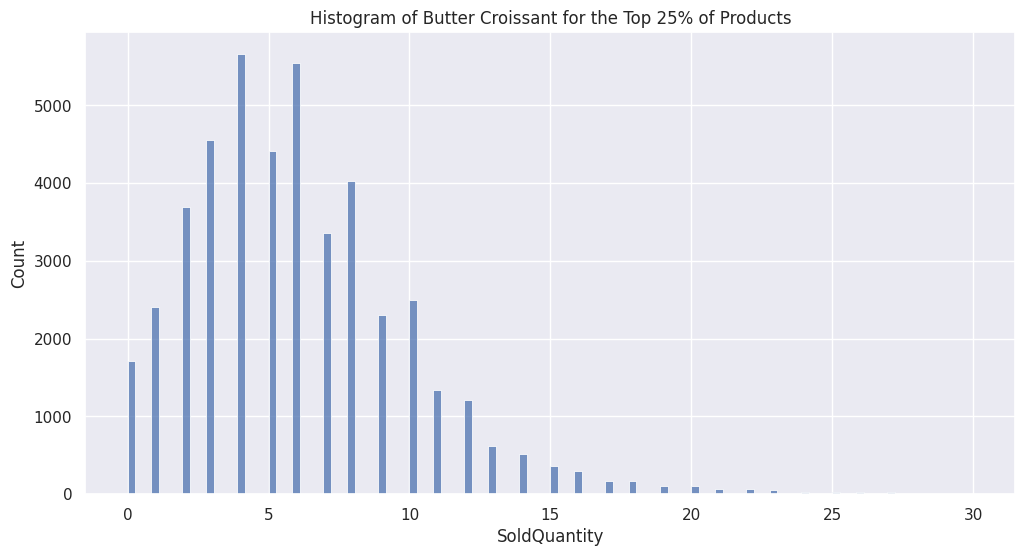

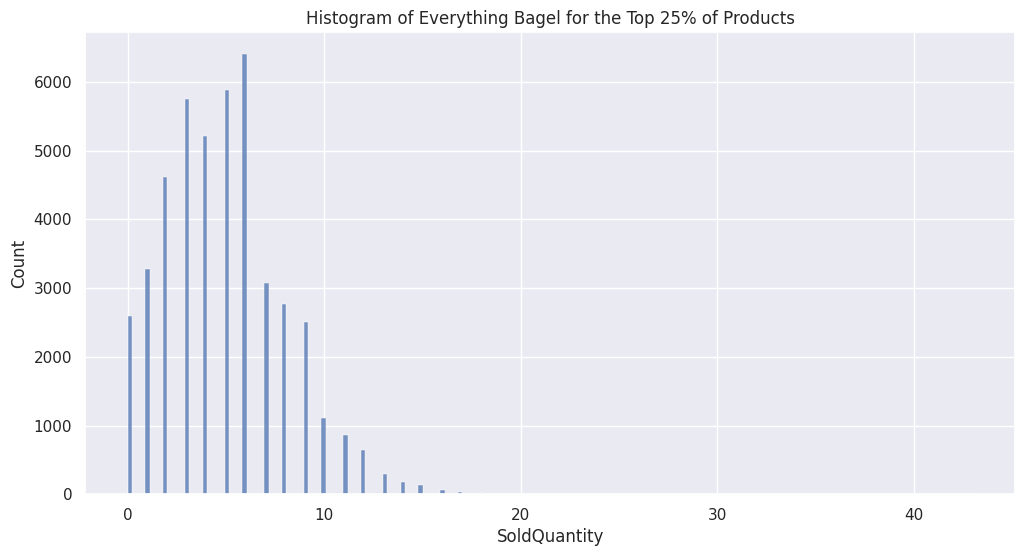

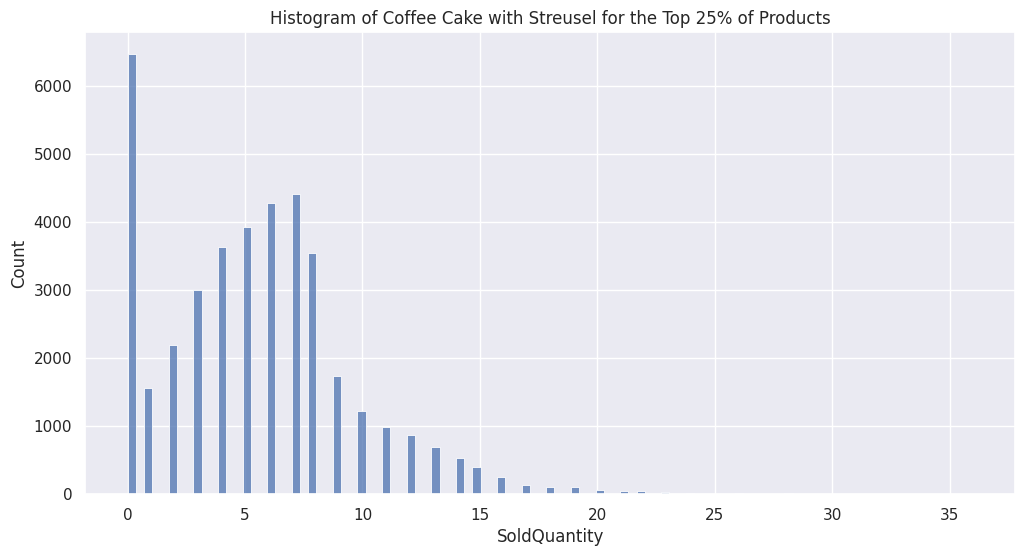

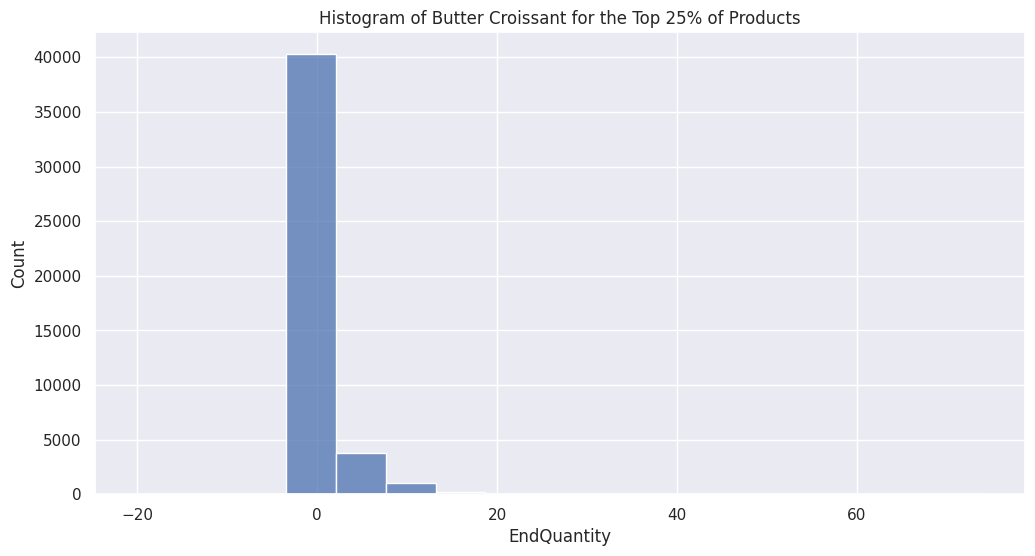

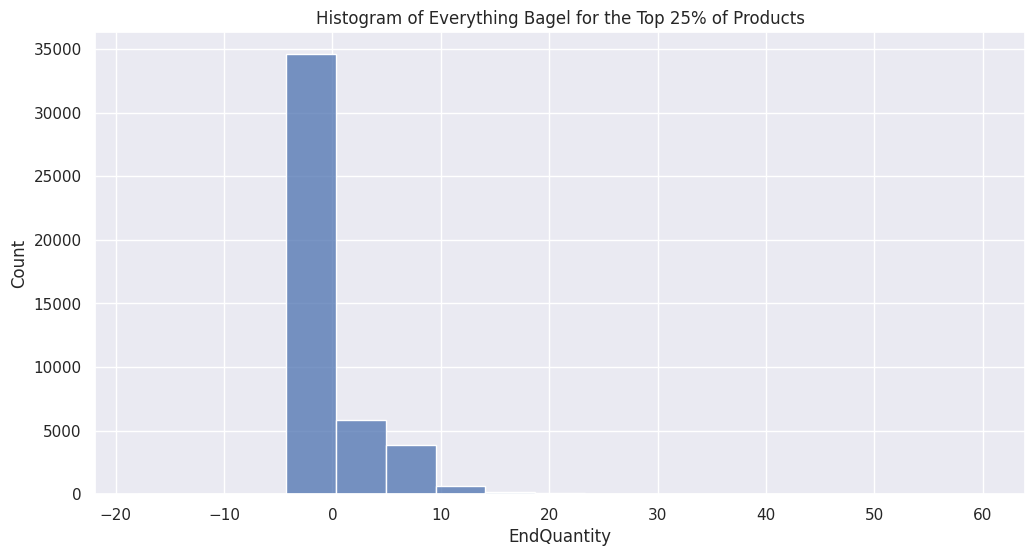

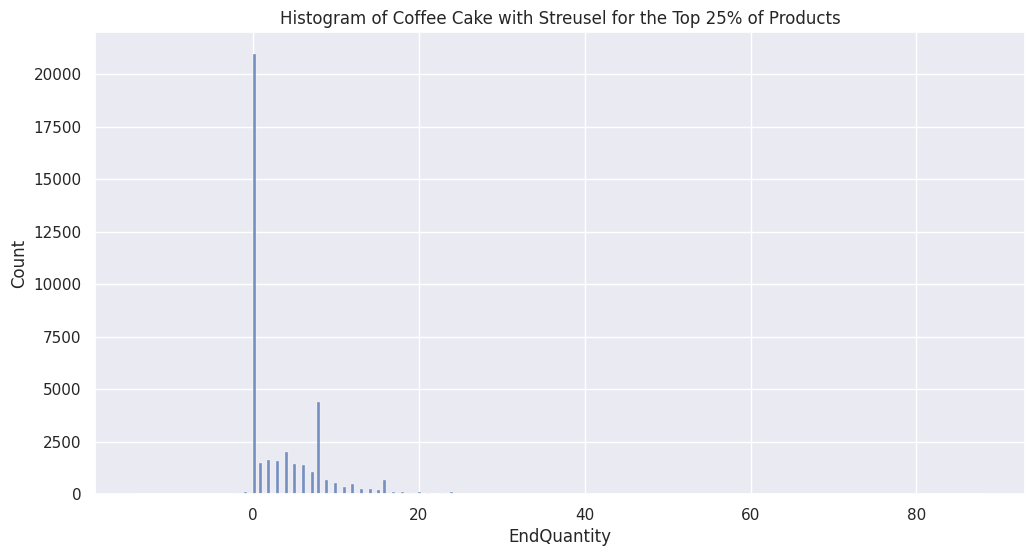

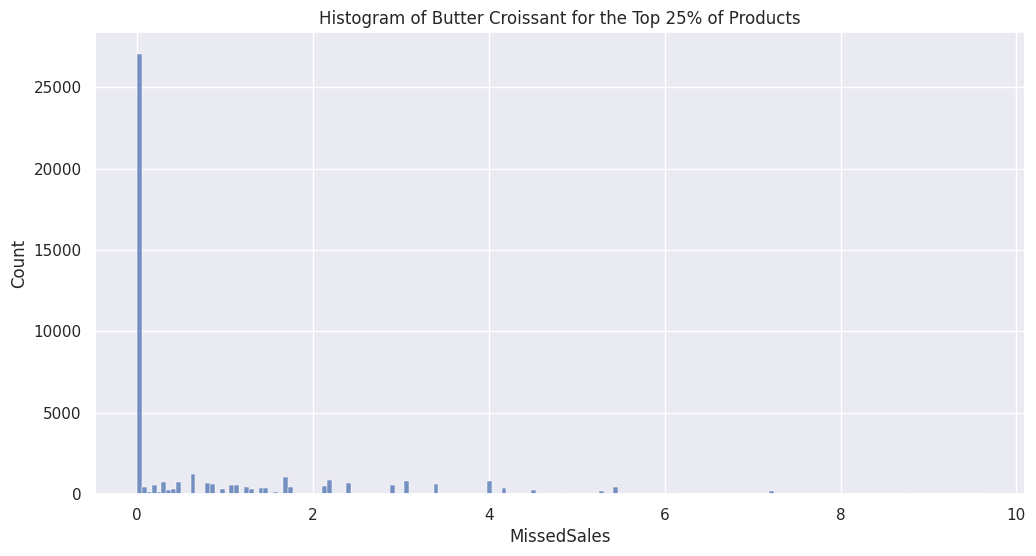

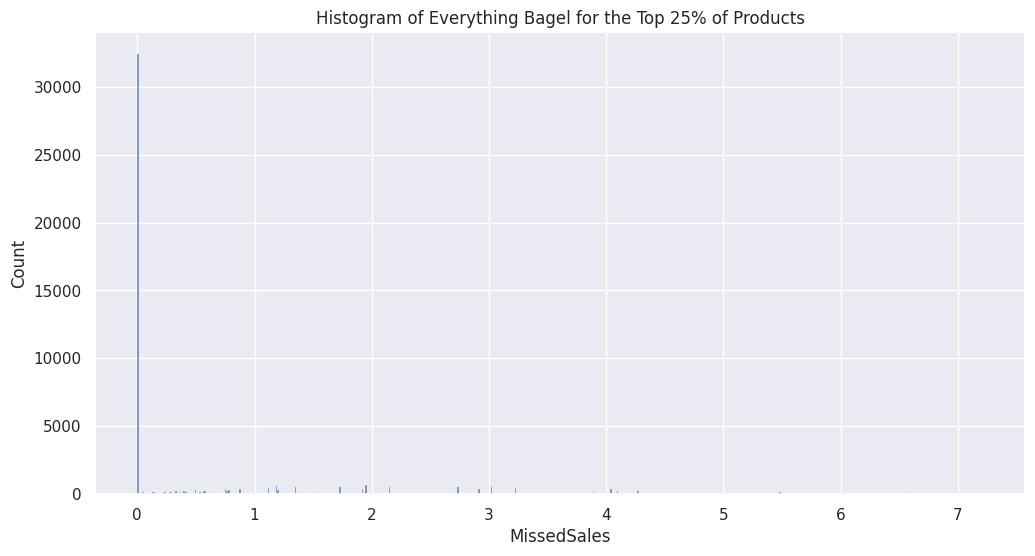

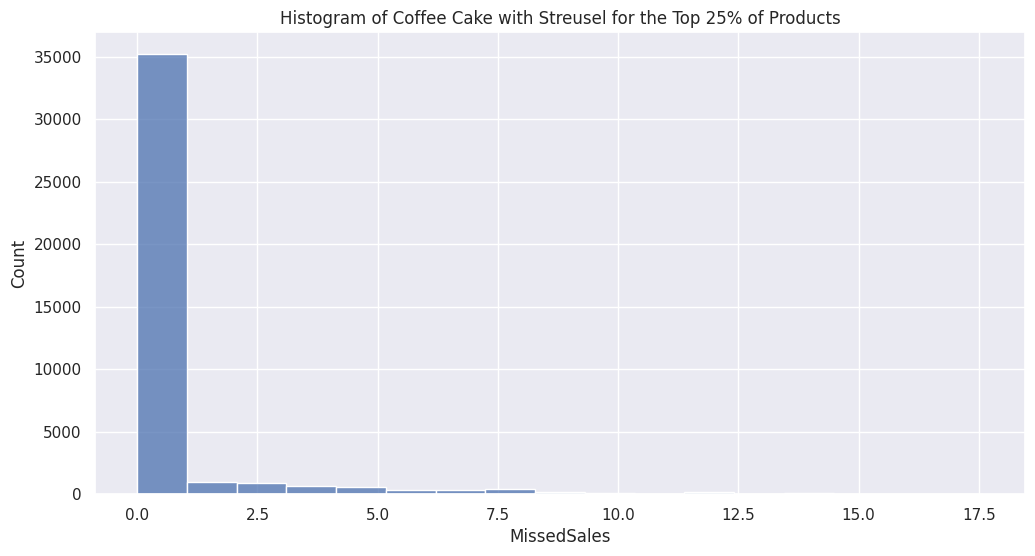

In [10]:
sns.set(rc={'figure.figsize':(12, 6)})
sub_filter = coffeeData_filtered[coffeeData_filtered['Description'].isin(top25_percent_products)]
for column in ['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'MissedSales']:
    for product in top25_percent_products:
        p_df = sub_filter[sub_filter['Description']==product]
        plt.figure()
        myplot = sns.histplot(x=p_df[column])
        myplot.set_title(f'Histogram of {product} for the Top 25% of Products')

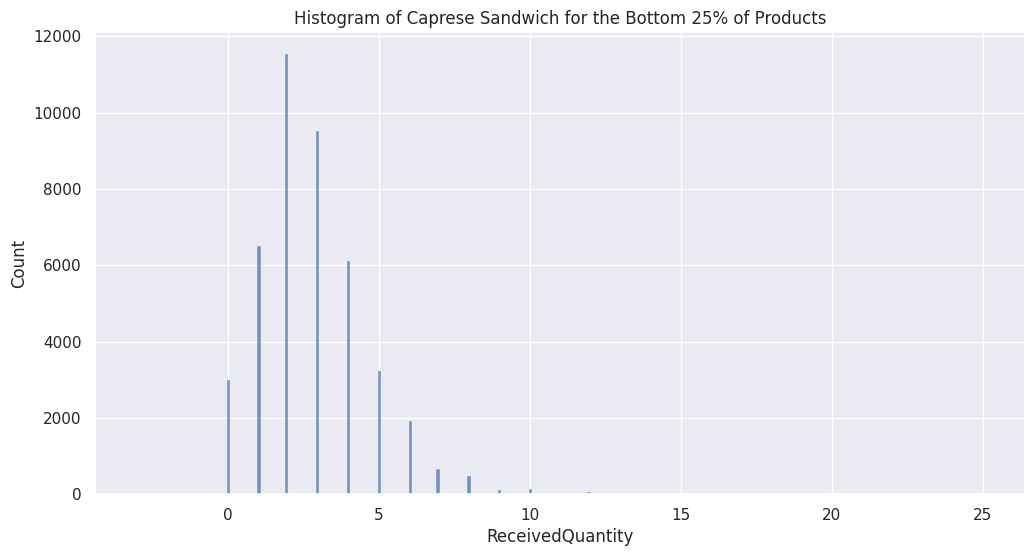

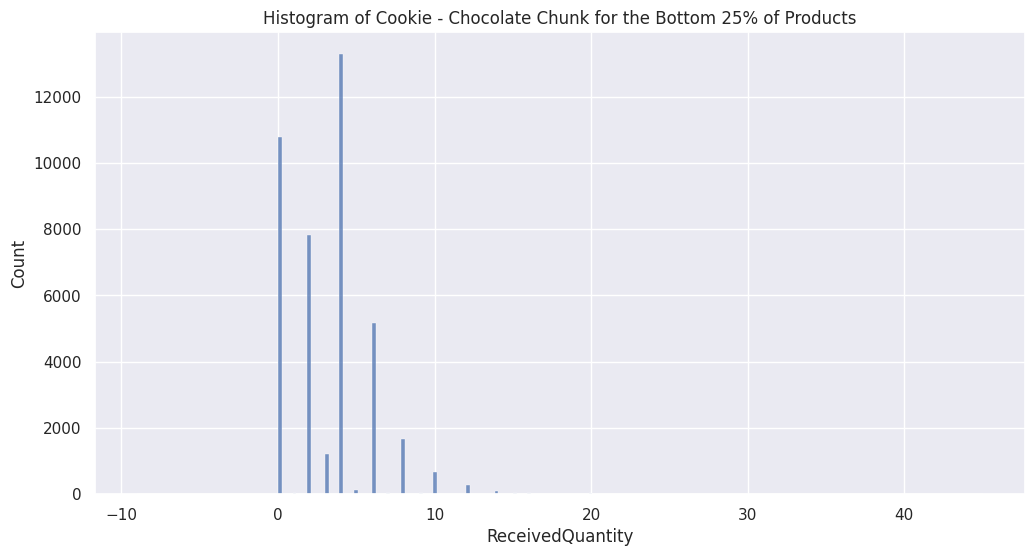

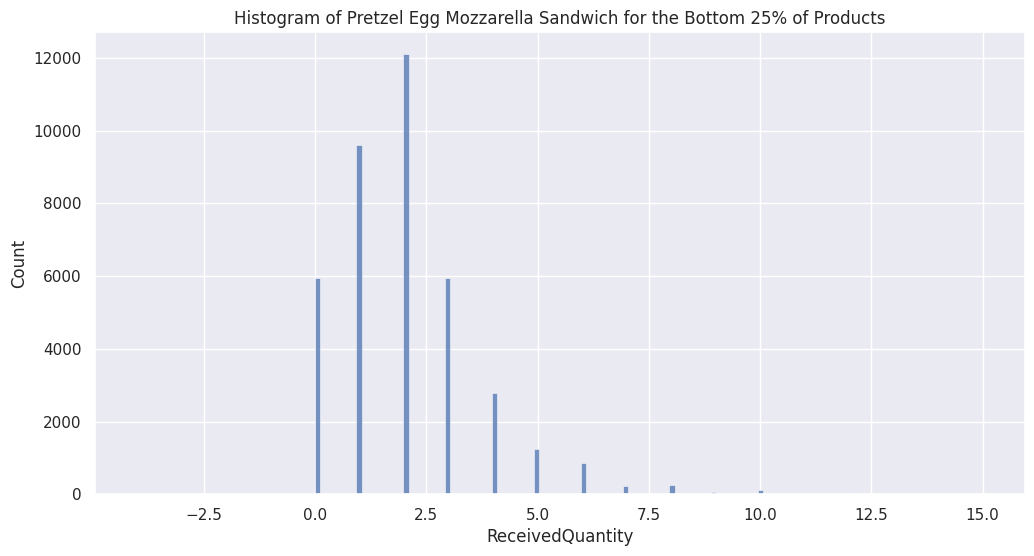

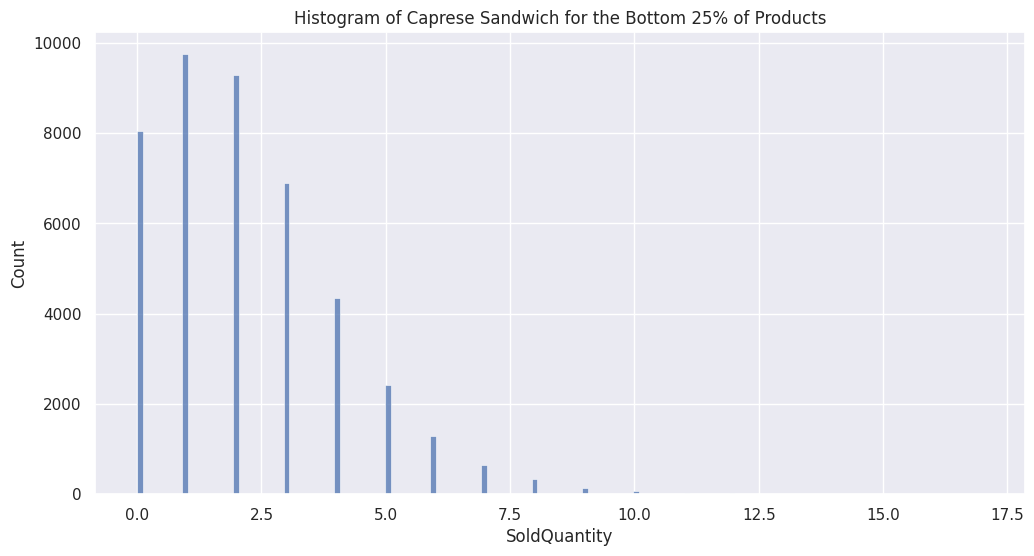

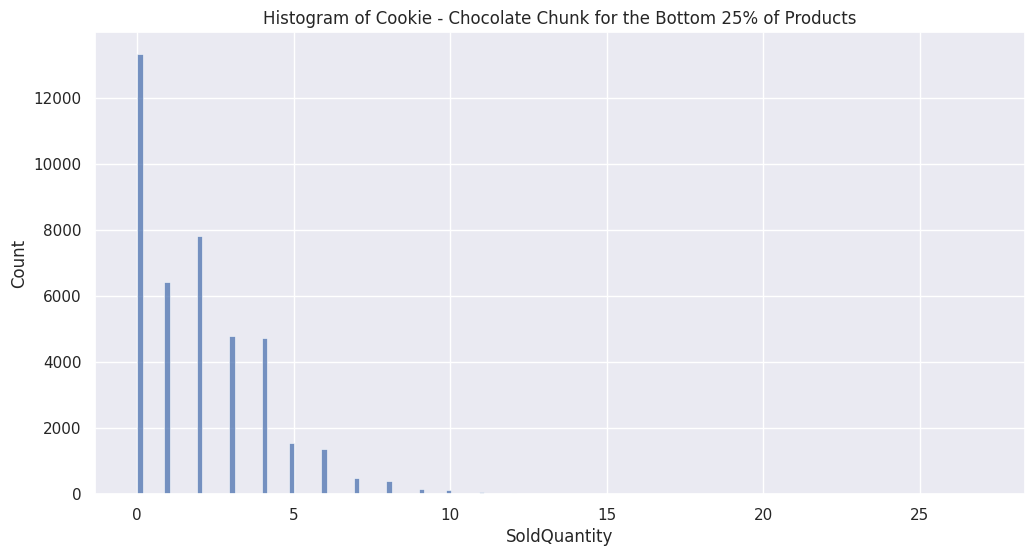

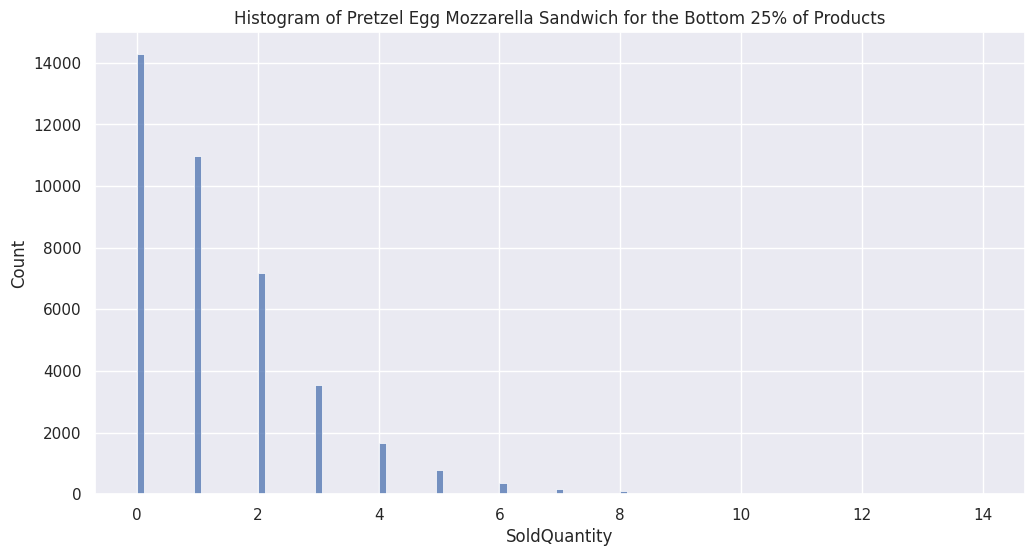

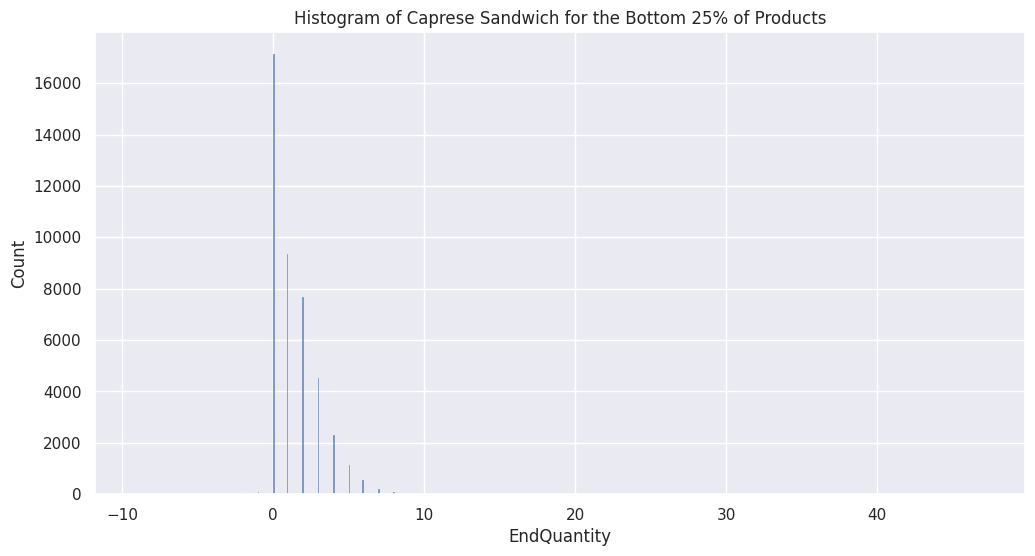

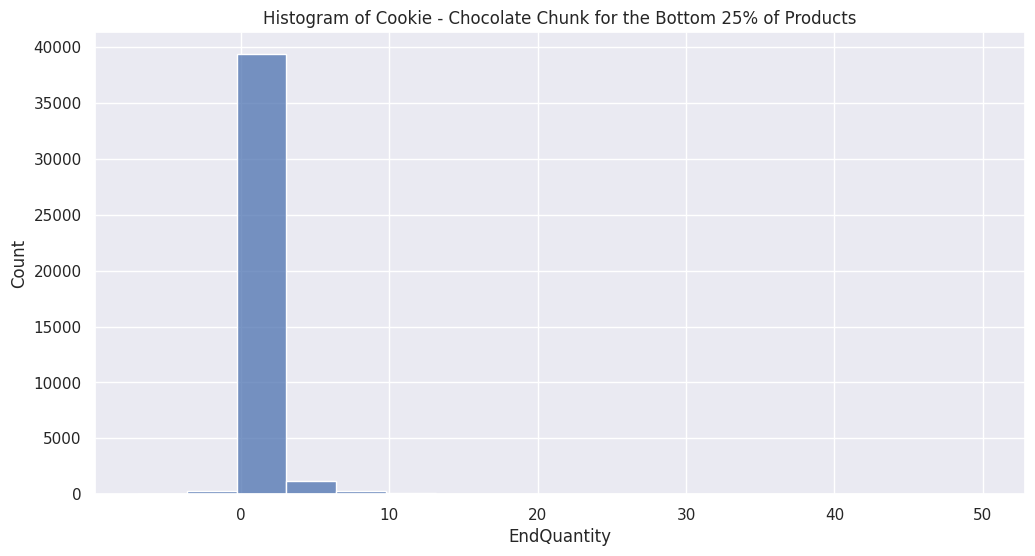

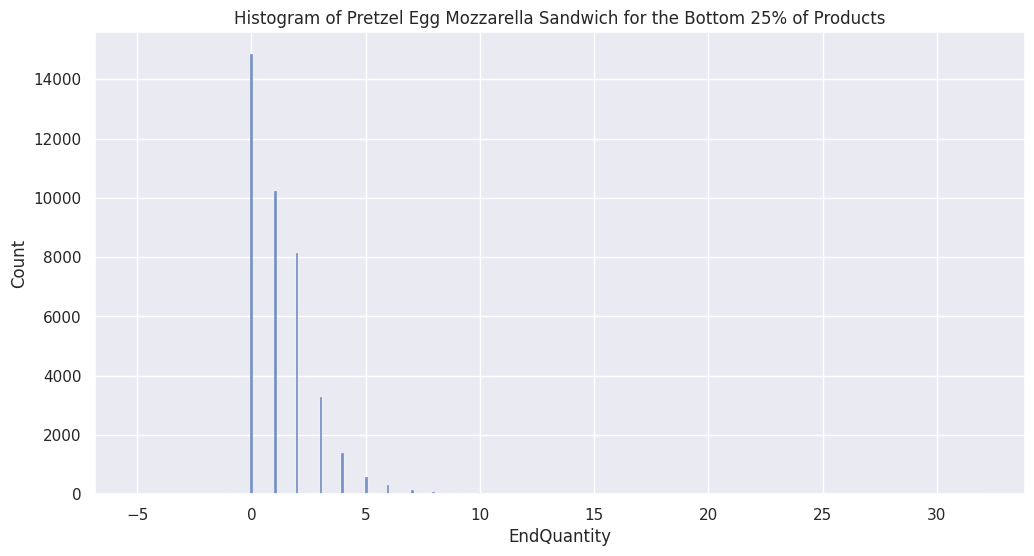

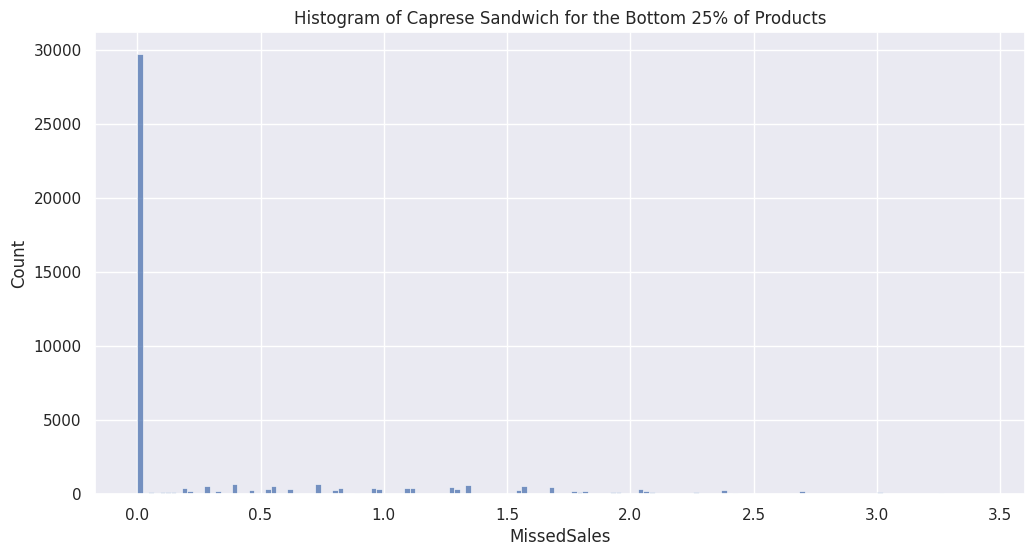

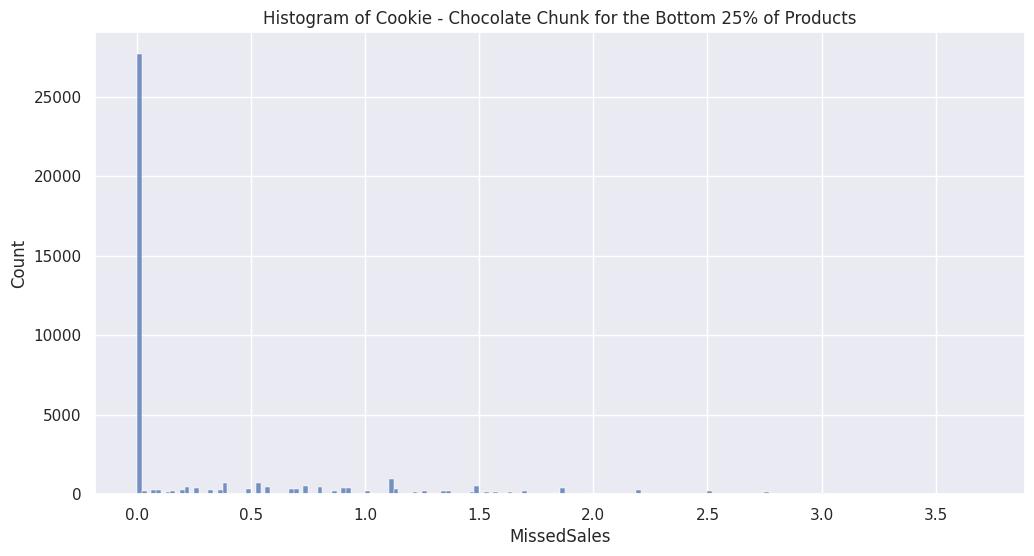

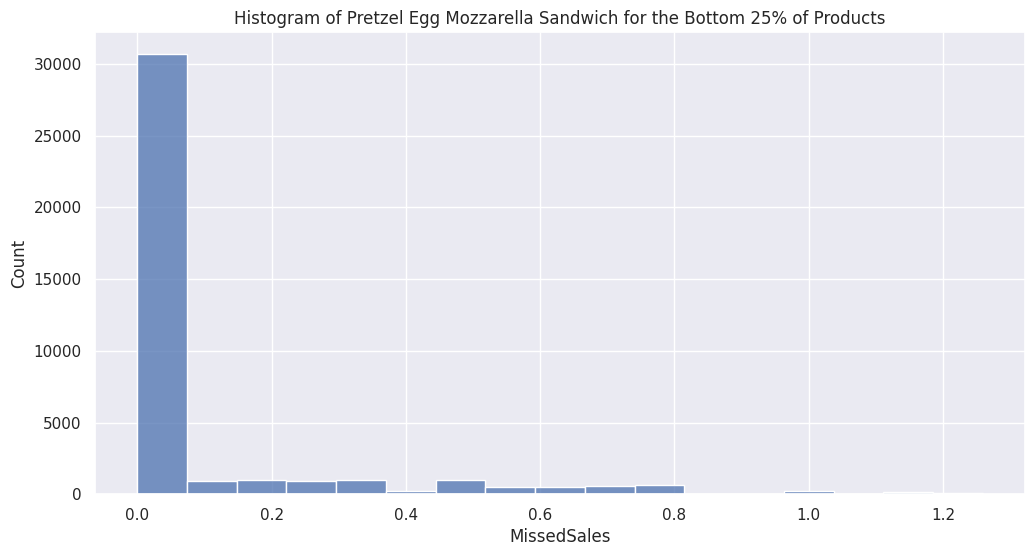

In [11]:
sub_filter = coffeeData_filtered[coffeeData_filtered['Description'].isin(bottom25_percent_products)]
for column in ['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'MissedSales']:
    for product in bottom25_percent_products:
        p_df = sub_filter[sub_filter['Description']==product]
        plt.figure()
        myplot = sns.histplot(x=p_df[column])
        myplot.set_title(f'Histogram of {product} for the Bottom 25% of Products')

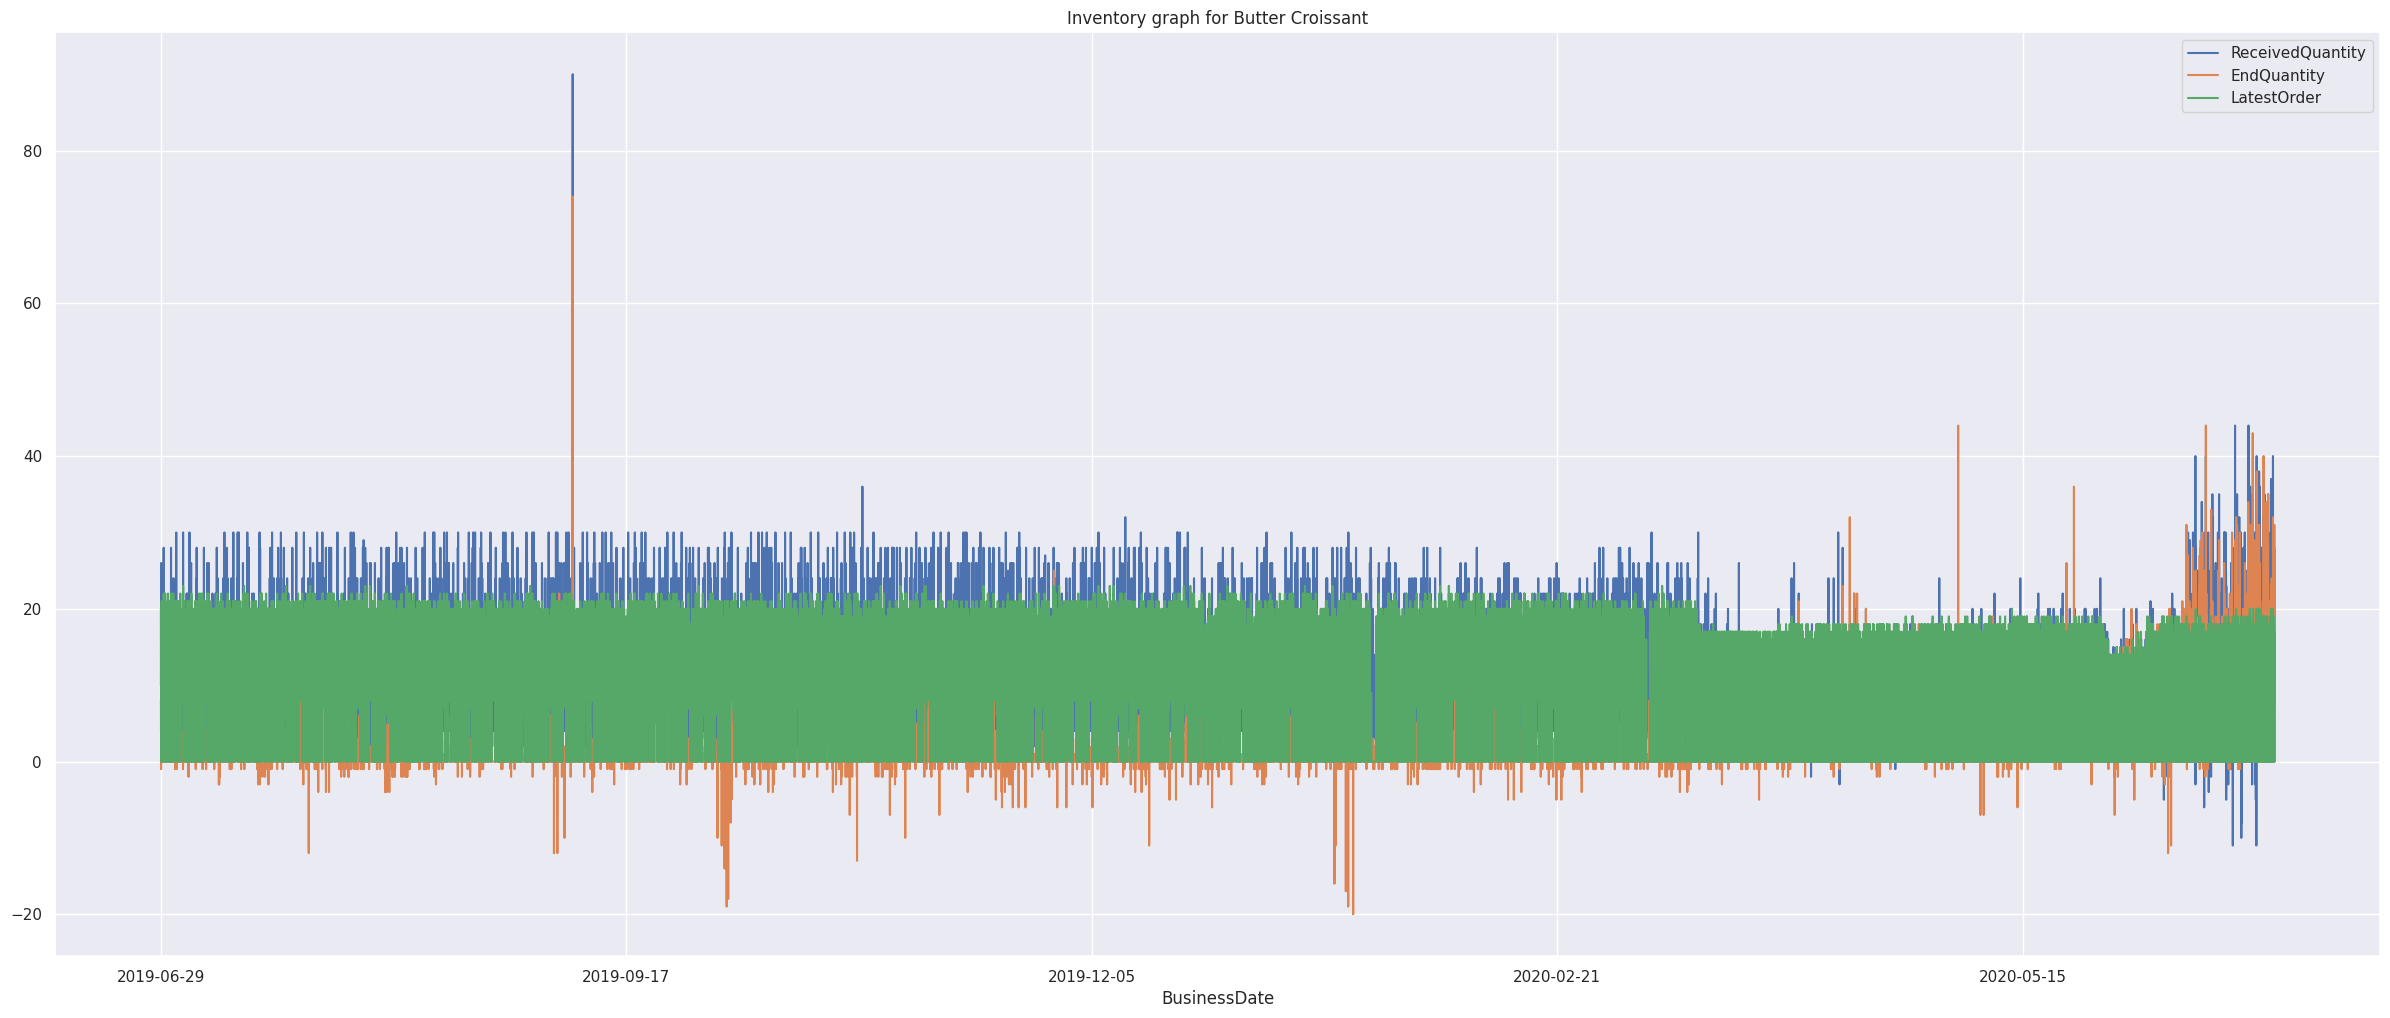

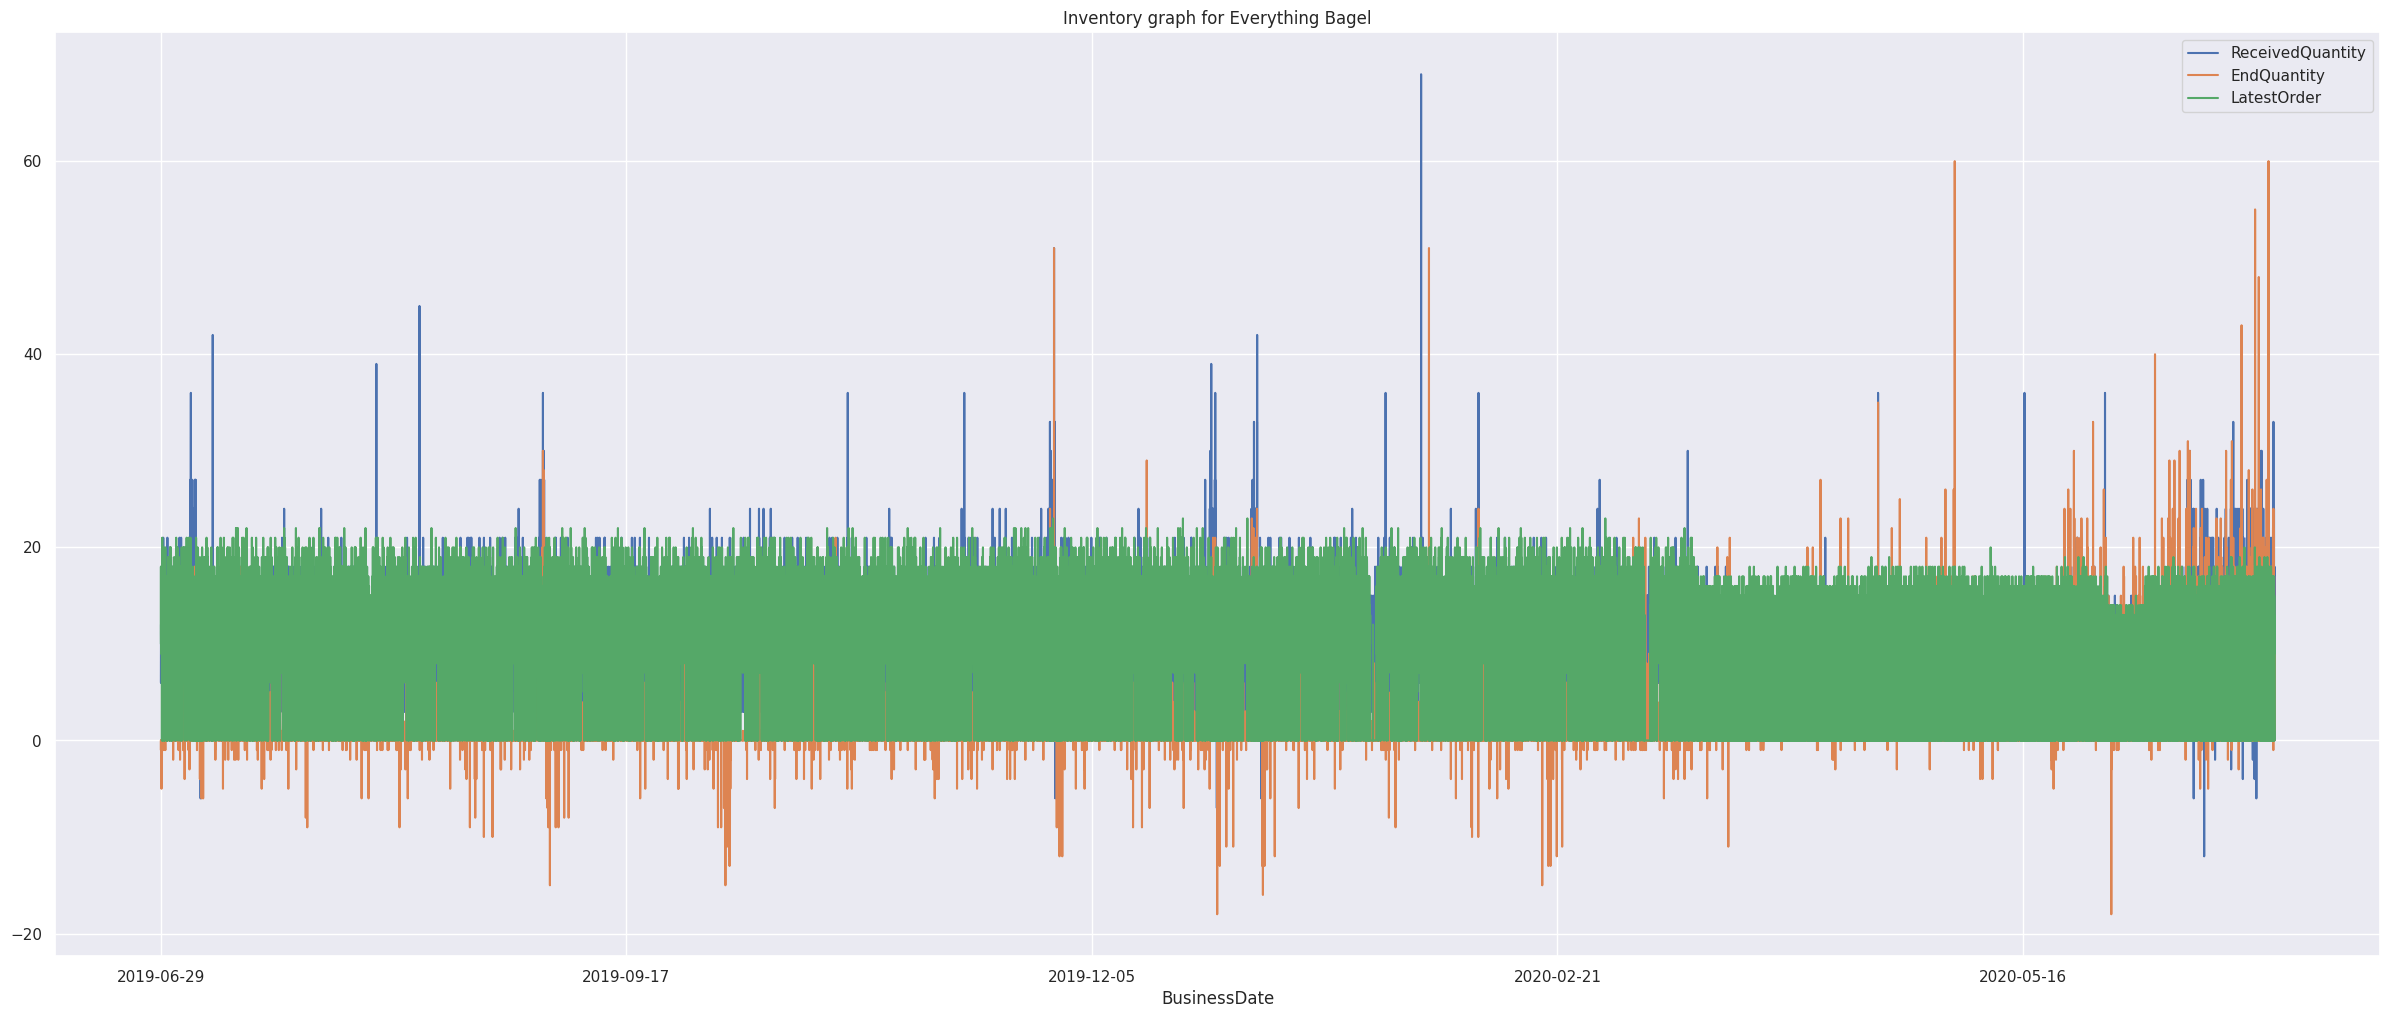

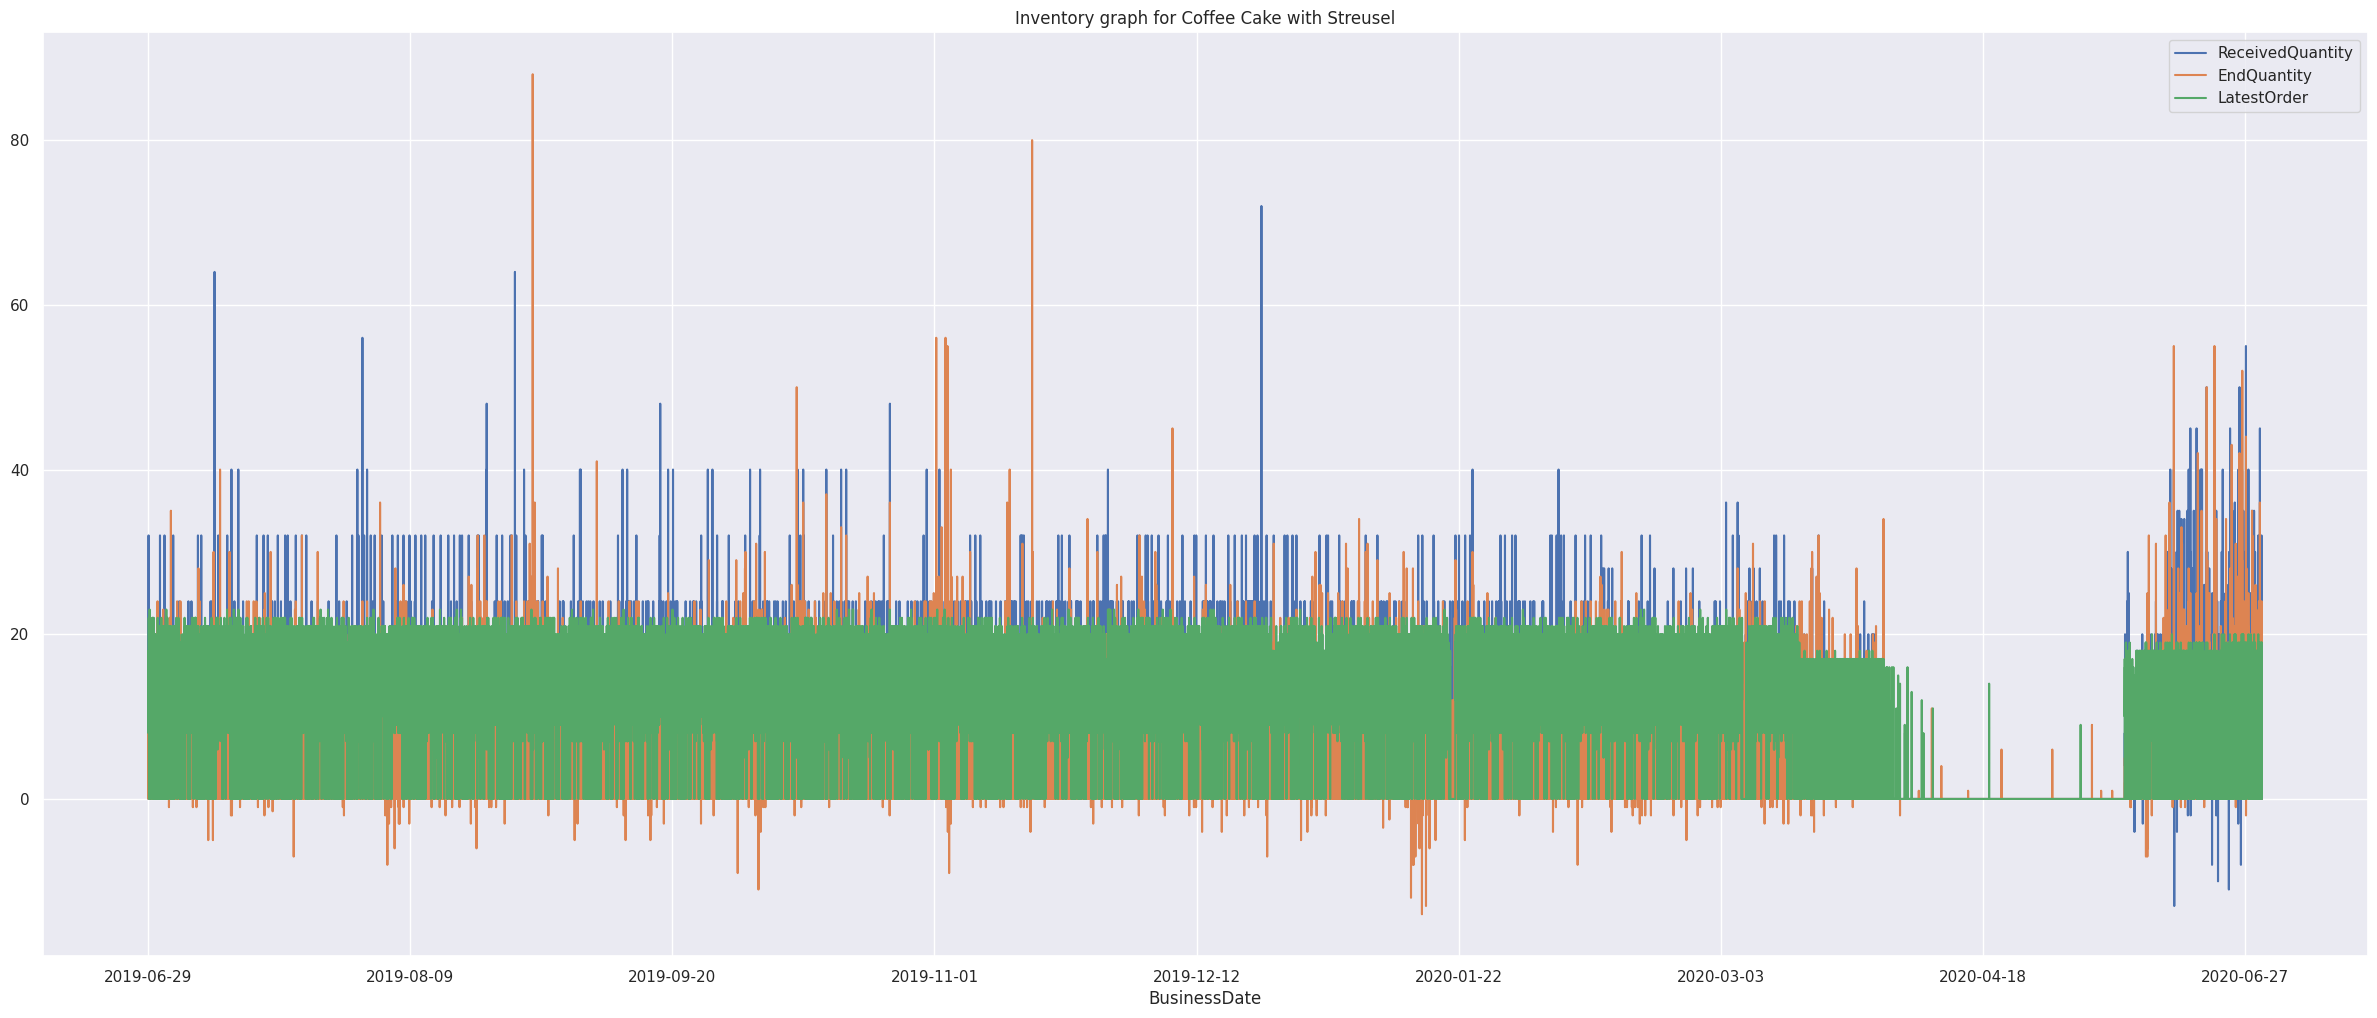

In [12]:
for product in top25_percent_products:
    specific_product_plot = coffeeData_filtered[coffeeData_filtered['Description'] == product].sort_values(by=['BusinessDate']).plot(kind='line', x='BusinessDate', y=['ReceivedQuantity', 'EndQuantity', 'LatestOrder'])
    specific_product_plot.set_title("Inventory graph for {}".format(product))
    f = specific_product_plot.figure
    f.set_figheight(12)
    f.set_figwidth(30)

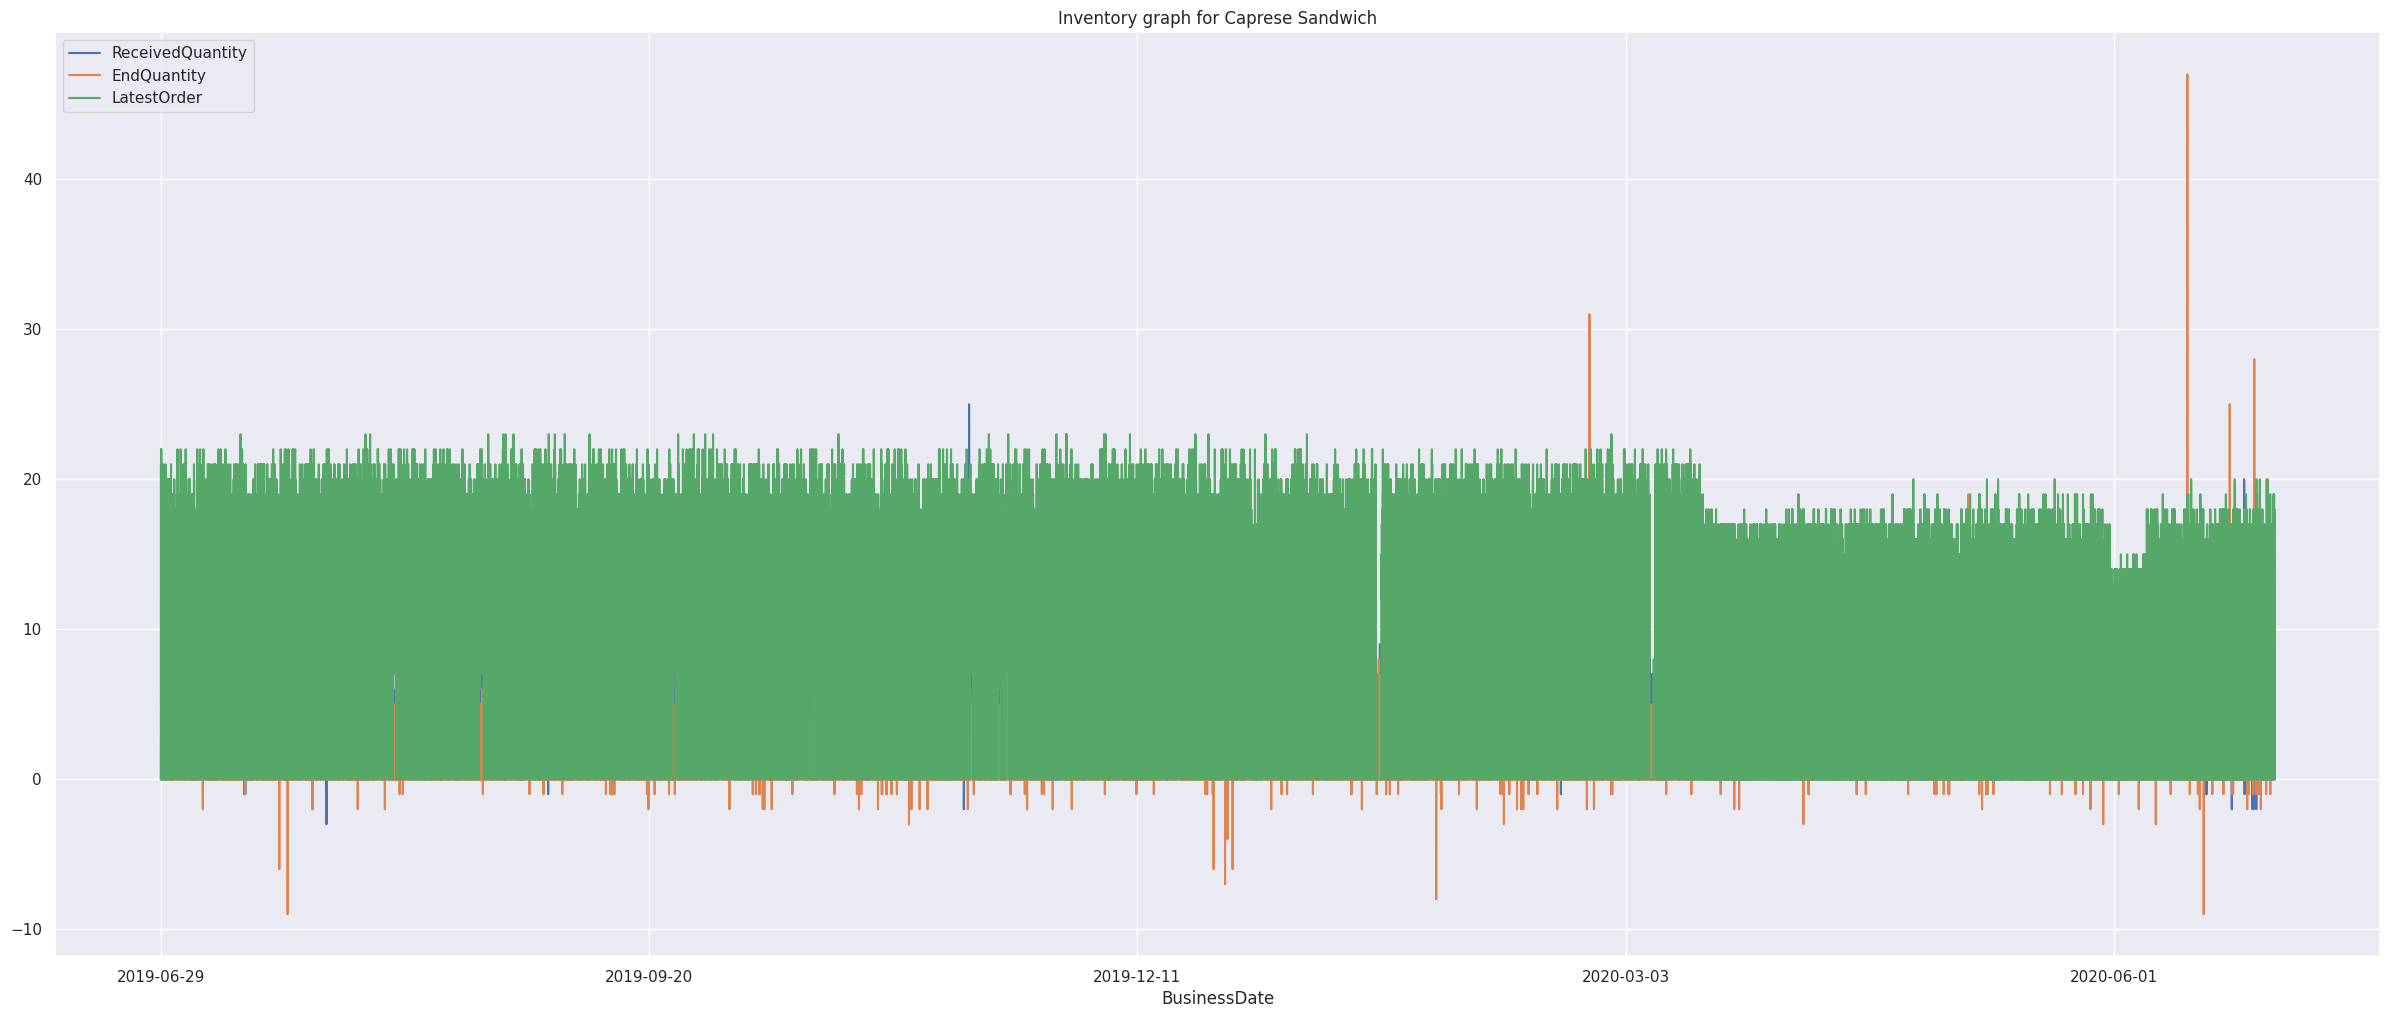

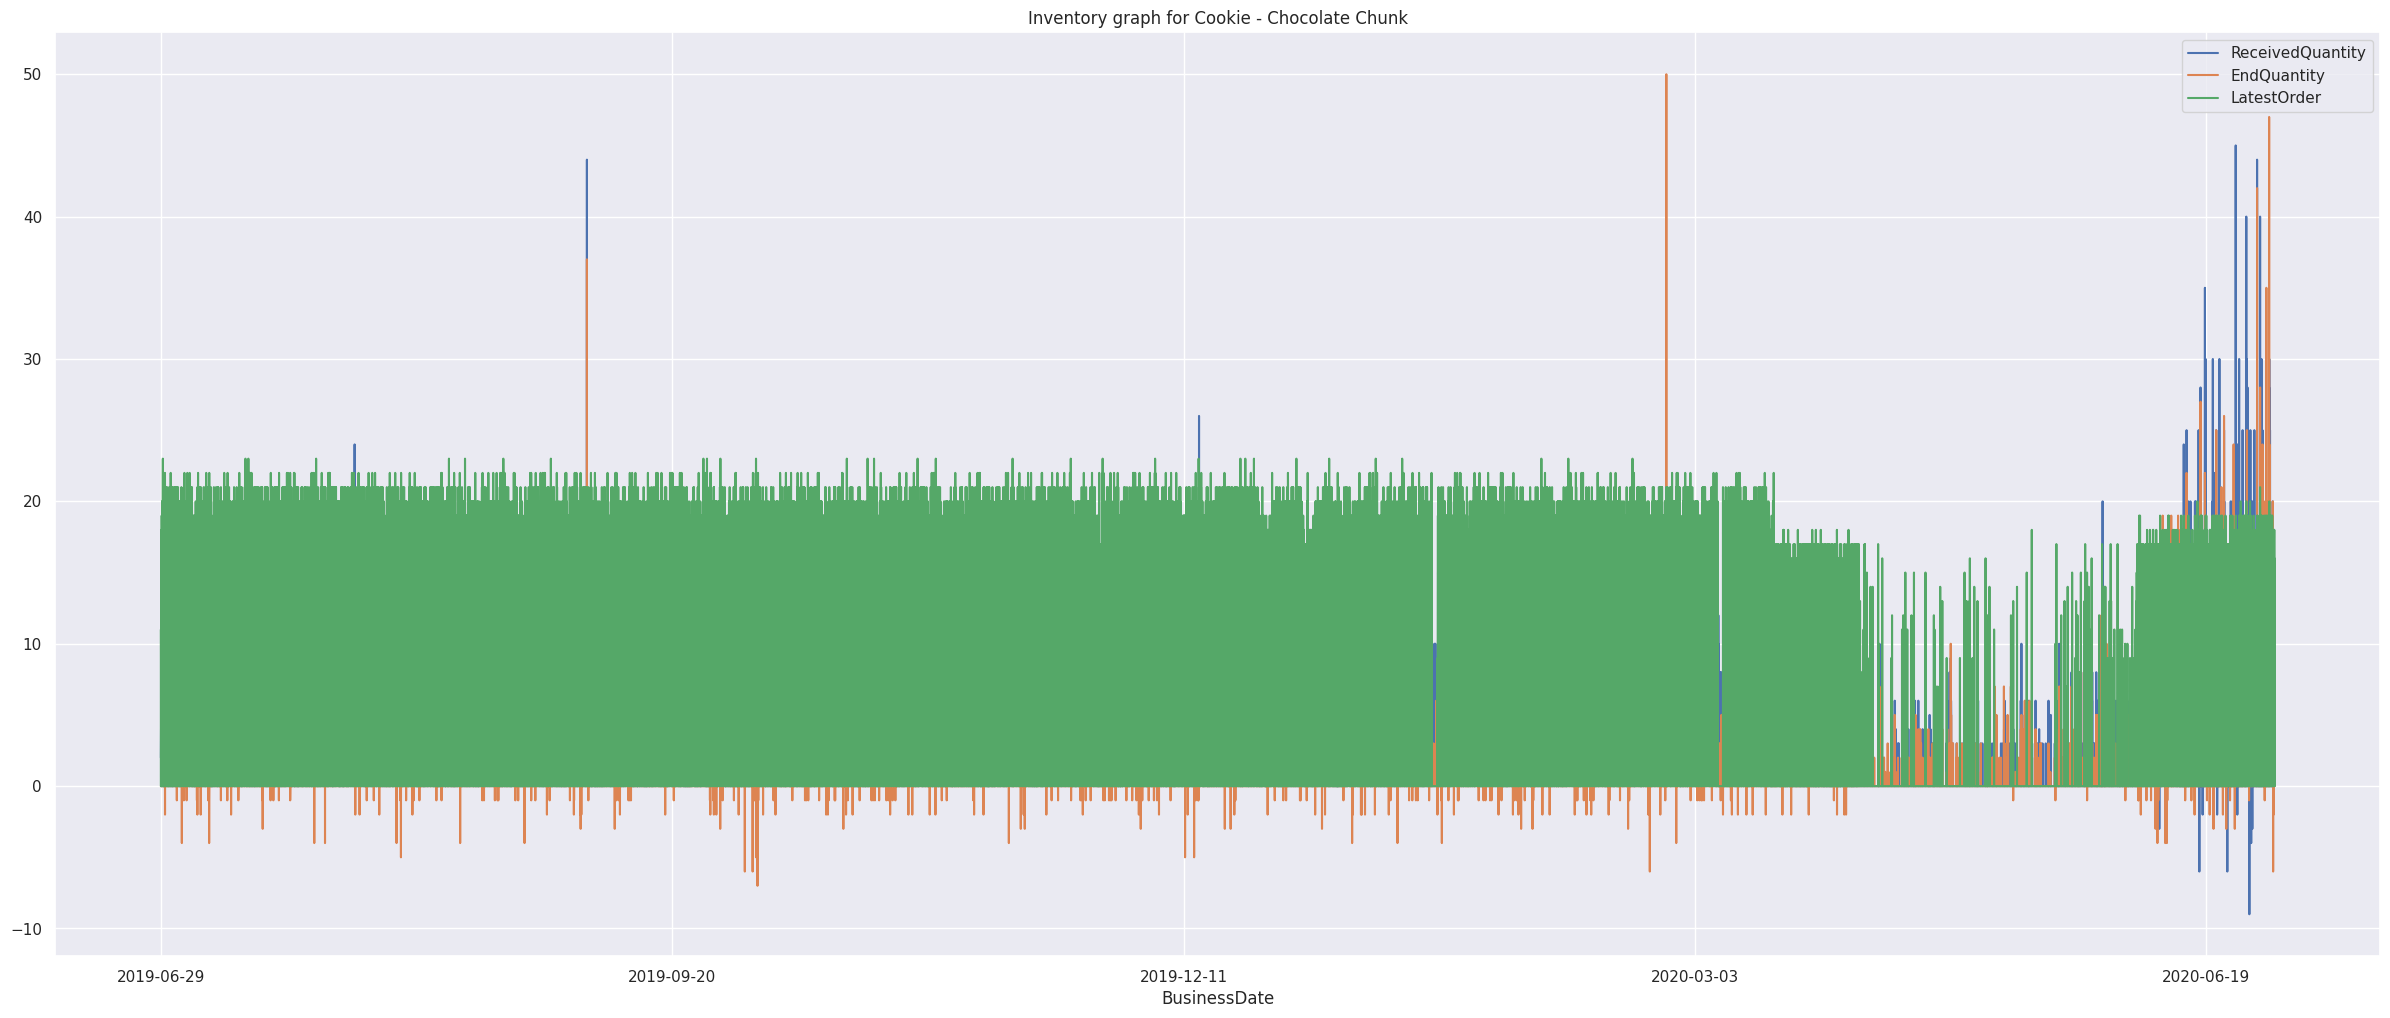

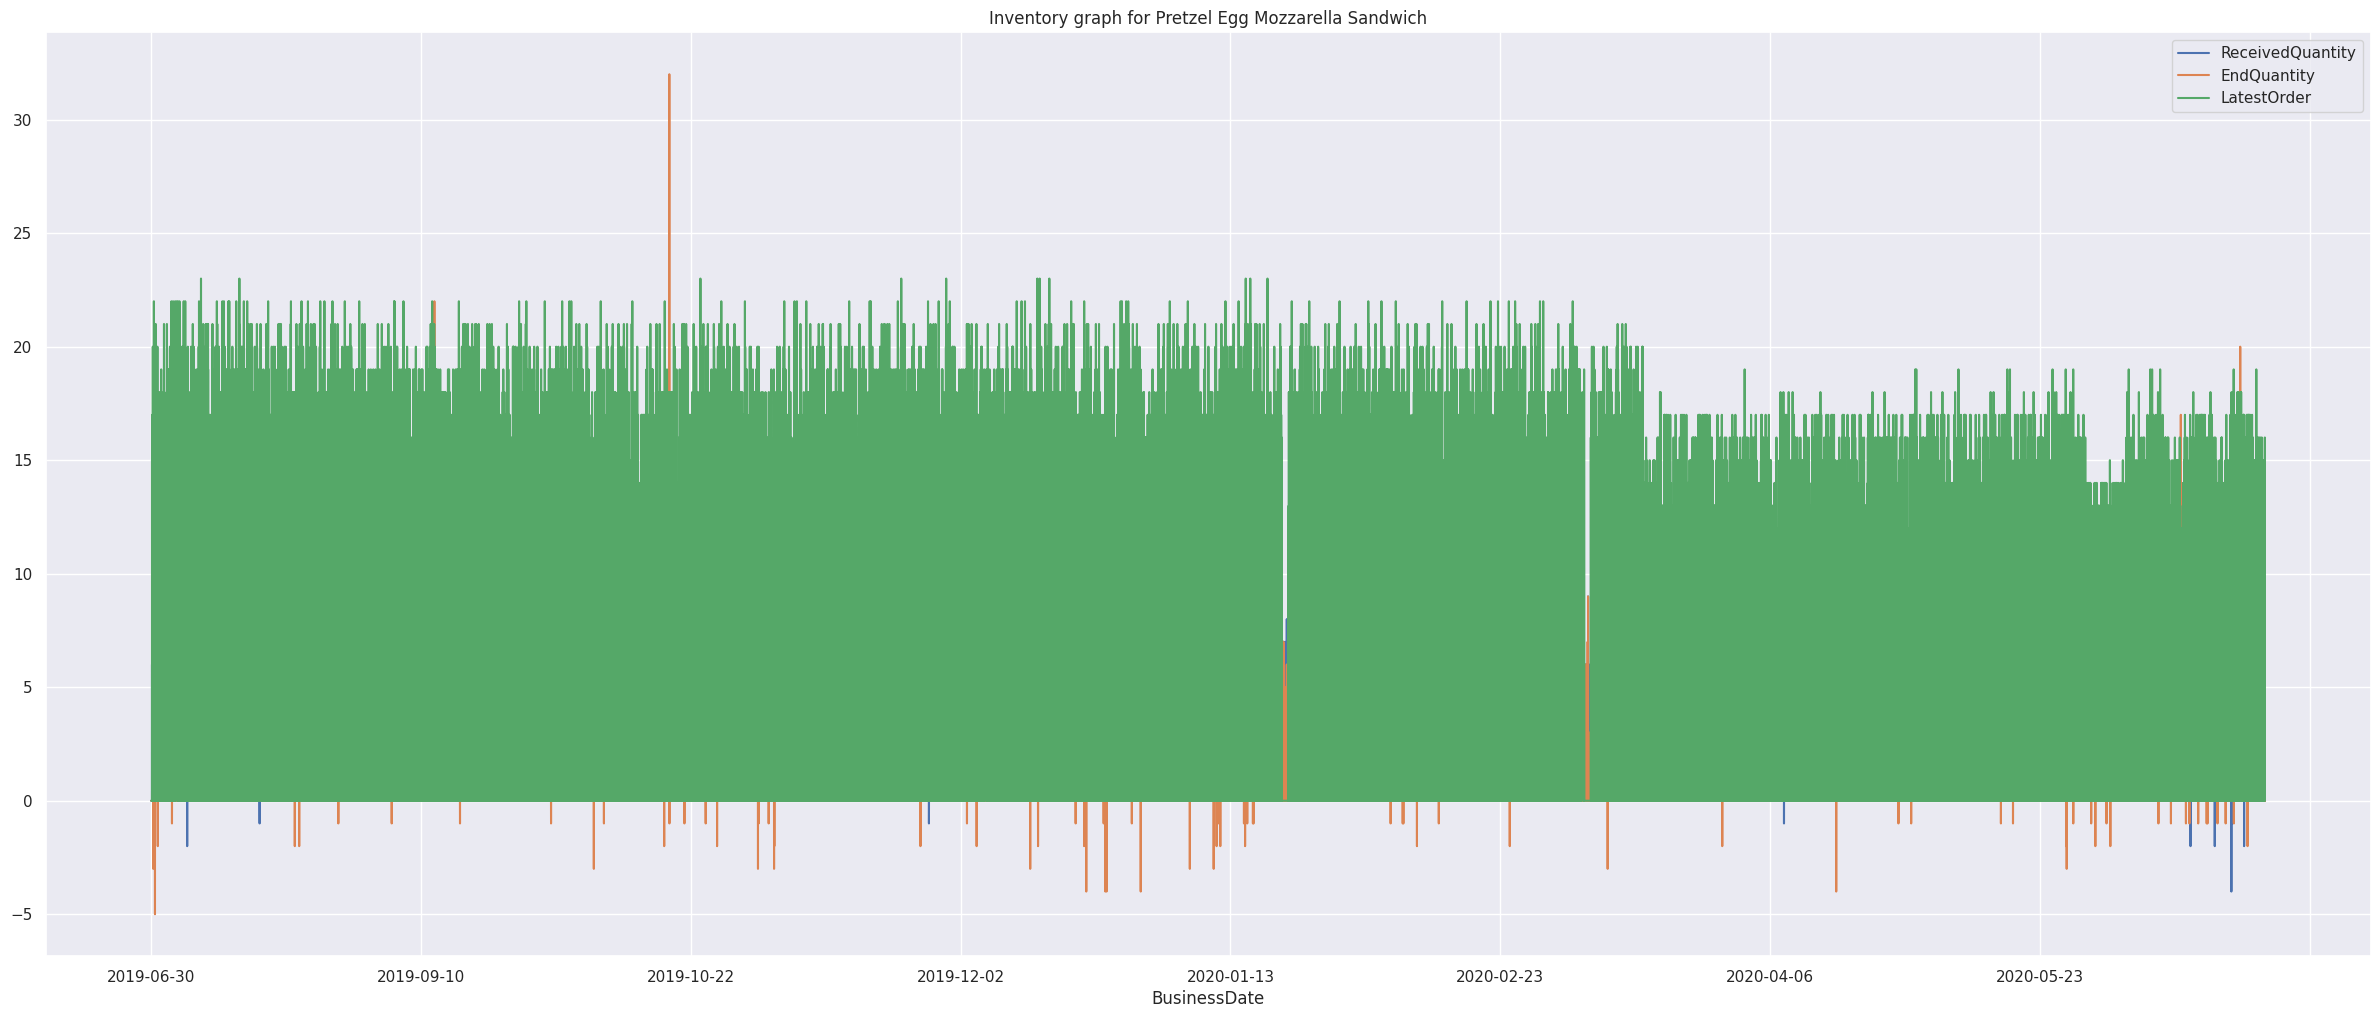

In [13]:
for product in bottom25_percent_products:
    specific_product_plot = coffeeData_filtered[coffeeData_filtered['Description'] == product].sort_values(by=['BusinessDate']).plot(kind='line', x='BusinessDate', y=['ReceivedQuantity', 'EndQuantity', 'LatestOrder'])
    specific_product_plot.set_title("Inventory graph for {}".format(product))
    f = specific_product_plot.figure
    f.set_figheight(12)
    f.set_figwidth(30)

In [19]:
# Group the data by 'Description' and sum the 'SoldQuantity'
product_sales_series = coffeeData_filtered.groupby('Description')['SoldQuantity'].sum()

# Print the sales volume for each product
for product, sales in product_sales_series.items():
    print(f"{product} : {sales}")

# Sort the series in descending order
products_sorted_by_sales = product_sales_series.sort_values(ascending=False)

# Calculate top and bottom 25% products
product_percentage = int(len(products_sorted_by_sales) * 0.25)
top25_percent_products = products_sorted_by_sales.head(product_percentage).index.tolist()
bottom25_percent_products = products_sorted_by_sales.tail(product_percentage).index.tolist()

print("\nTop 25% of products: ", top25_percent_products)
print("Bottom 25% of products: ", bottom25_percent_products)

# Print all products maintaining the original order
all_products = coffeeData_filtered['Description'].unique().tolist()
print(all_products)


Almond Croissant : 194262.0
Blueberry Scone : 173388.0
Butter Croissant : 275507.0
Caprese Sandwich : 96163.0
Chocolate Croissant : 215269.0
Cinnamon Roll : 184320.0
Coffee Cake with Streusel : 222357.0
Cookie - Chocolate Chunk : 82730.0
Croissant - White Cheddar Jalapeno : 147865.0
Danish - Classic Cheese : 205898.0
Egg| Spinach & Cheddar Sandwich on Ciabatta : 108126.0
Everything Bagel : 223361.0
Pretzel Egg Mozzarella Sandwich : 51794.0

Top 25% of products:  ['Butter Croissant', 'Everything Bagel', 'Coffee Cake with Streusel']
Bottom 25% of products:  ['Caprese Sandwich', 'Cookie - Chocolate Chunk', 'Pretzel Egg Mozzarella Sandwich']
['Caprese Sandwich', 'Everything Bagel', 'Blueberry Scone', 'Butter Croissant', 'Chocolate Croissant', 'Cinnamon Roll', 'Cookie - Chocolate Chunk', 'Egg| Spinach & Cheddar Sandwich on Ciabatta', 'Danish - Classic Cheese', 'Croissant - White Cheddar Jalapeno', 'Coffee Cake with Streusel', 'Almond Croissant', 'Pretzel Egg Mozzarella Sandwich']


<ipython-input-21-7f4b64a402a8>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


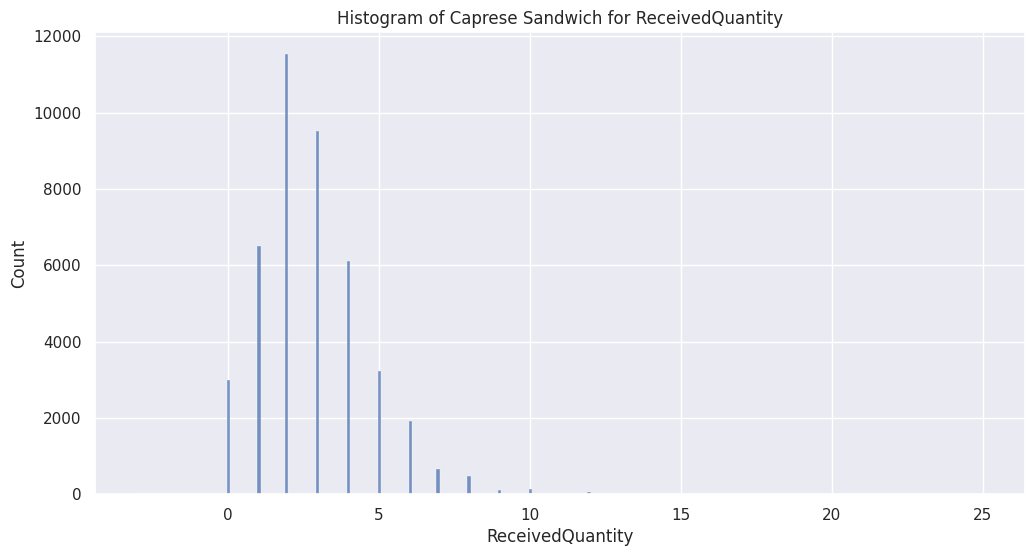

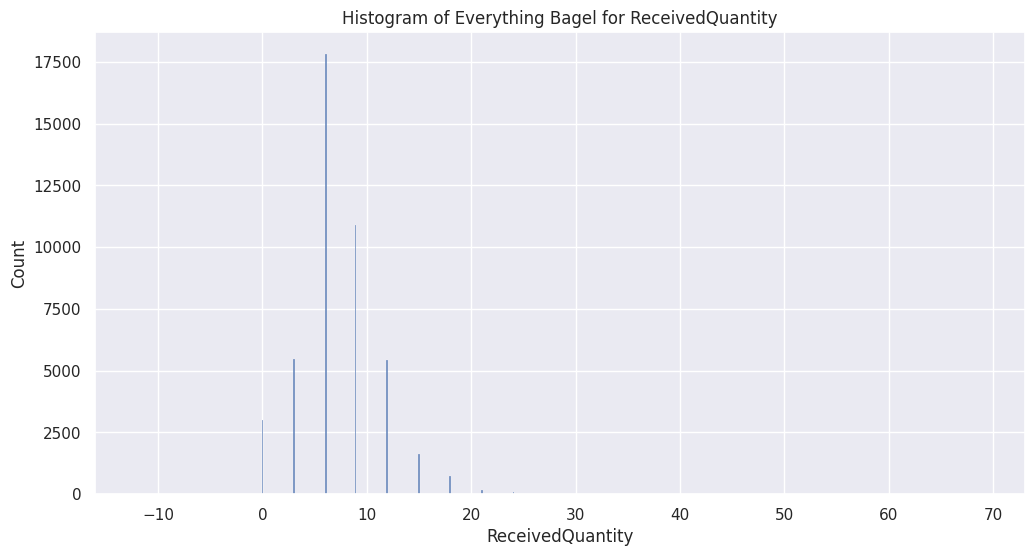

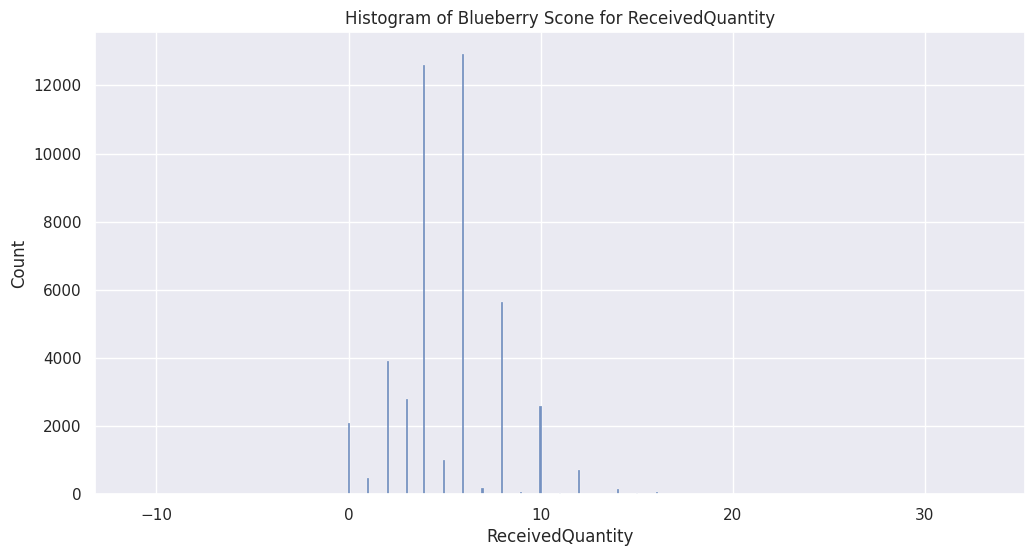

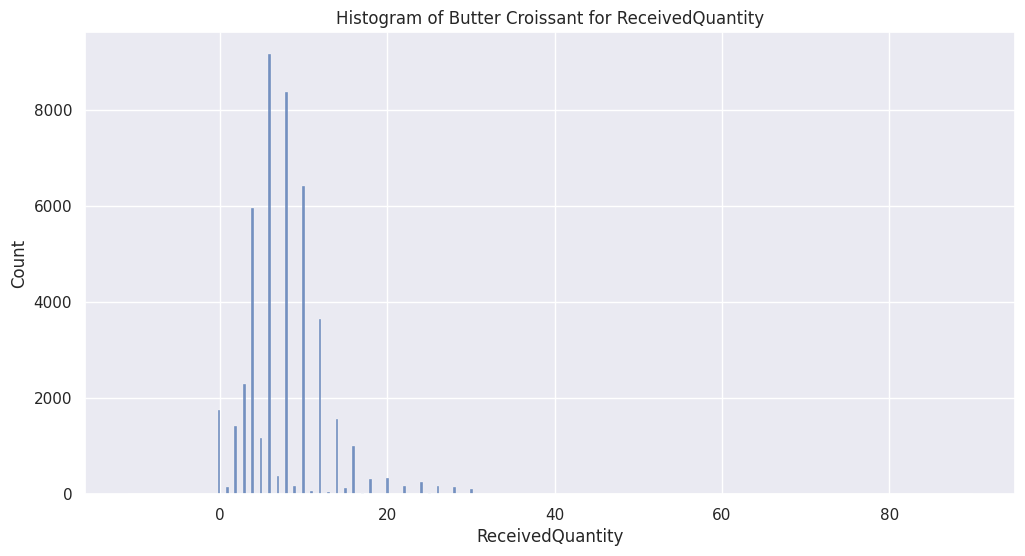

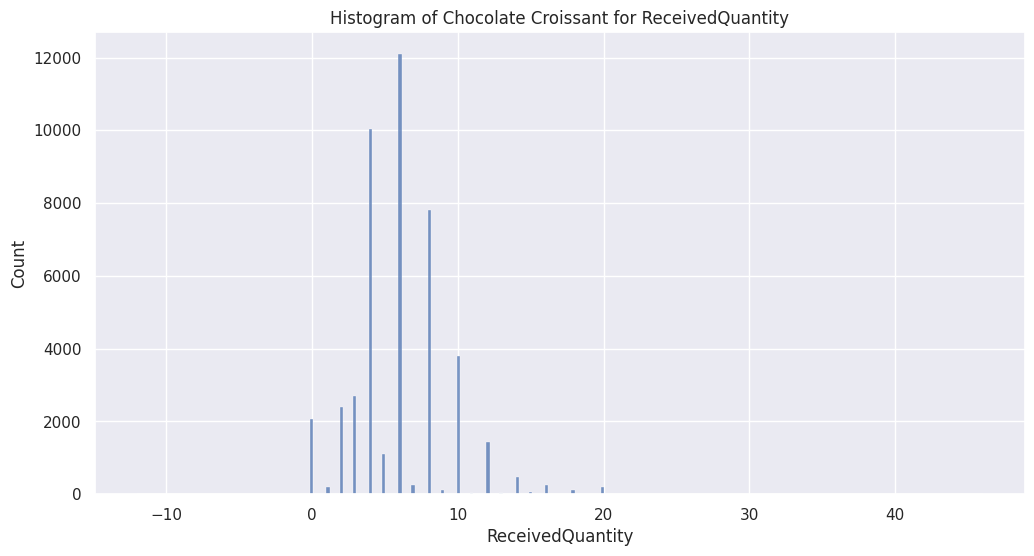

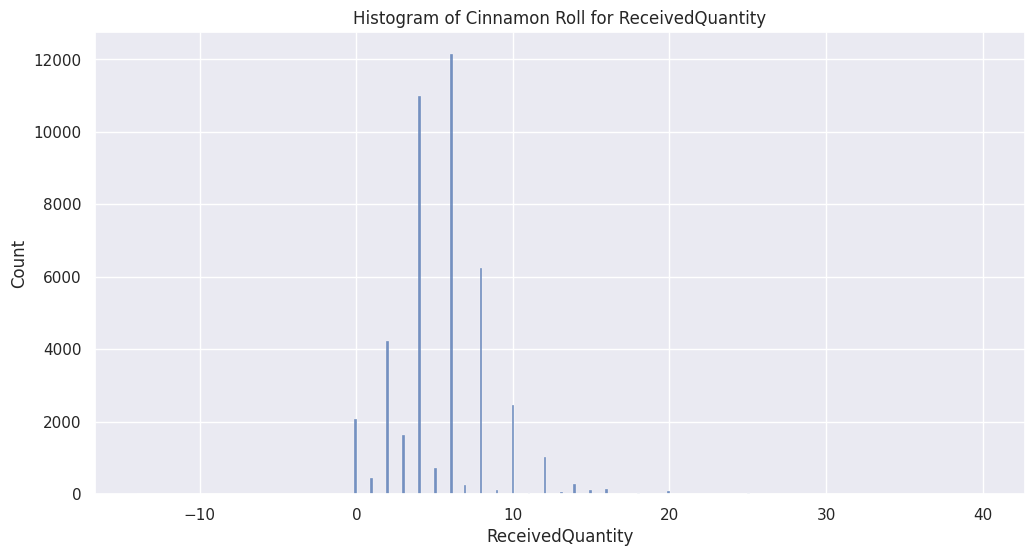

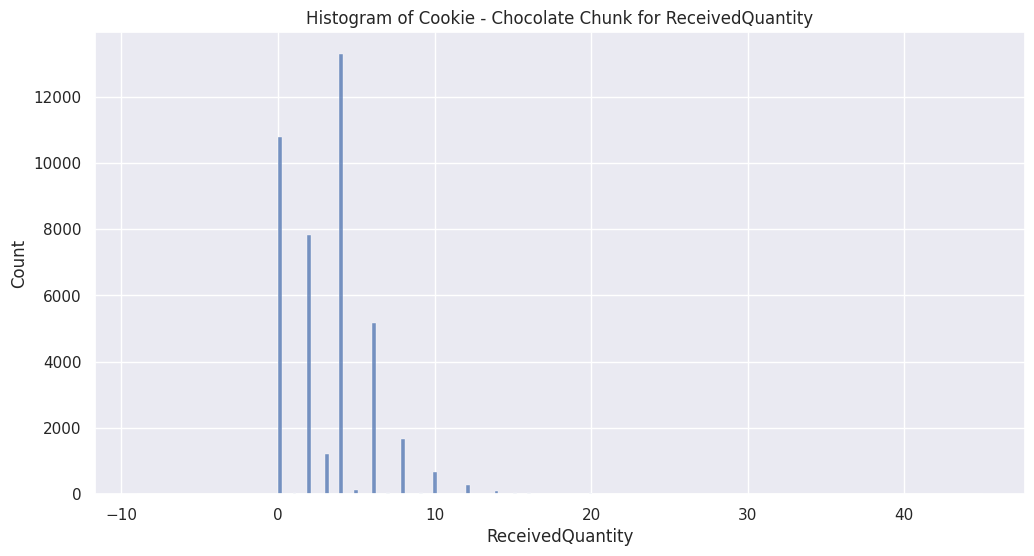

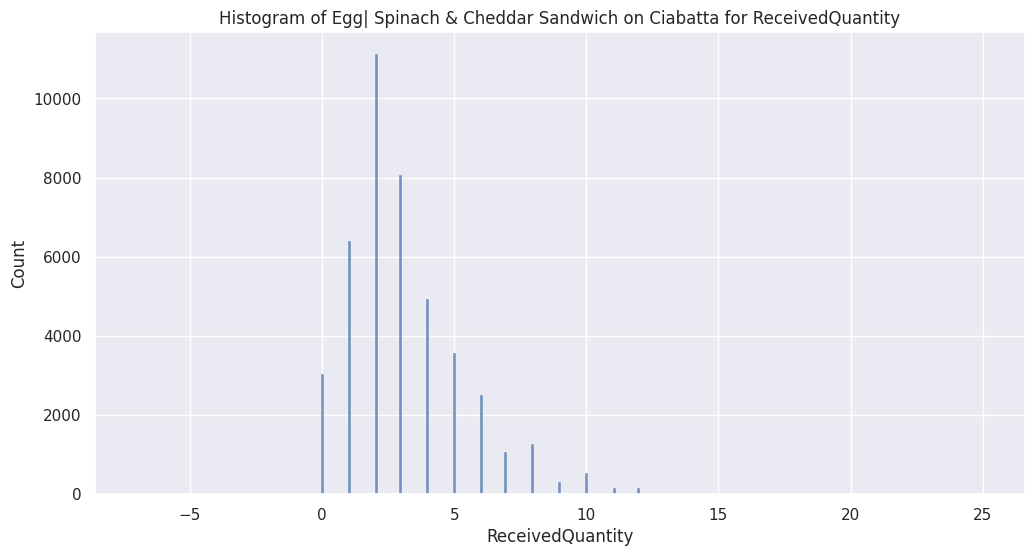

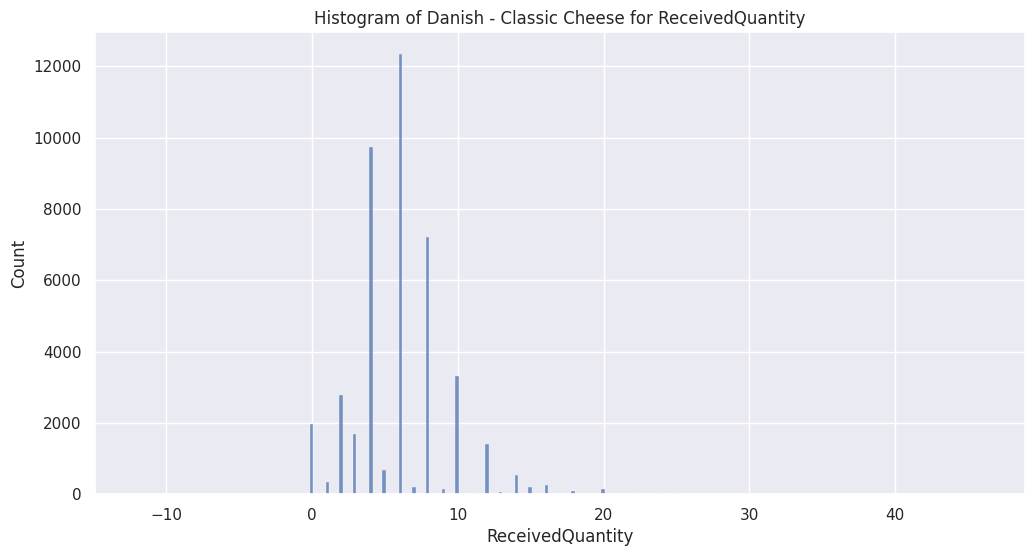

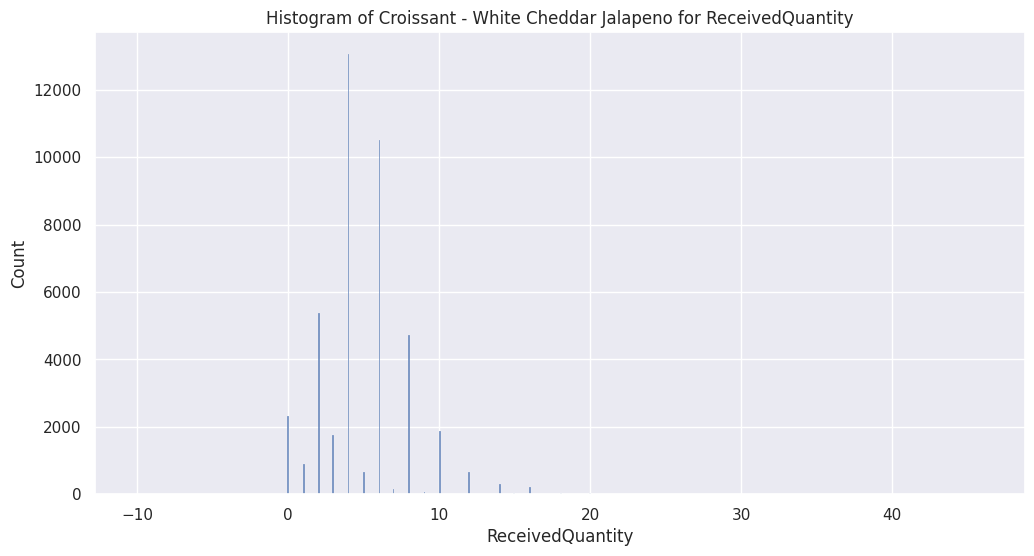

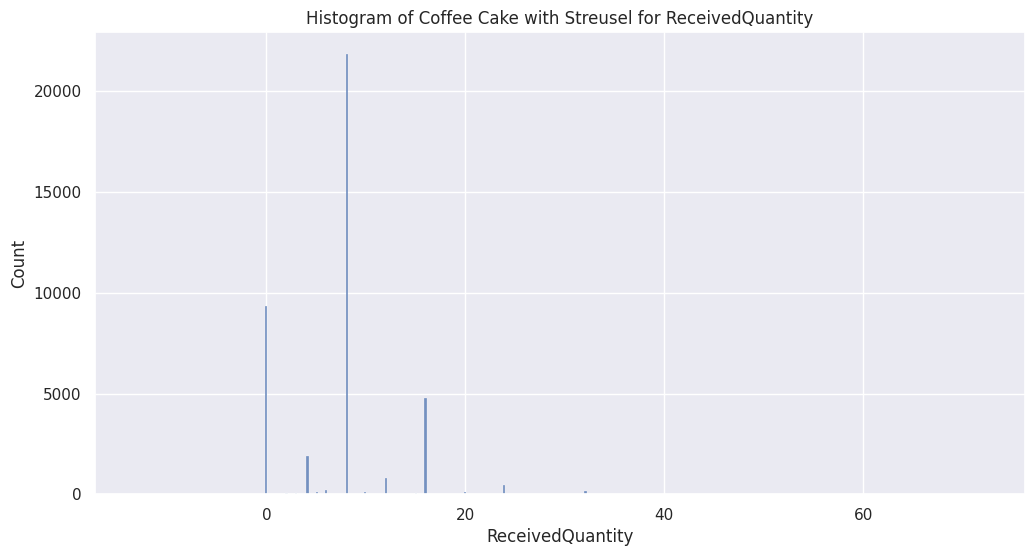

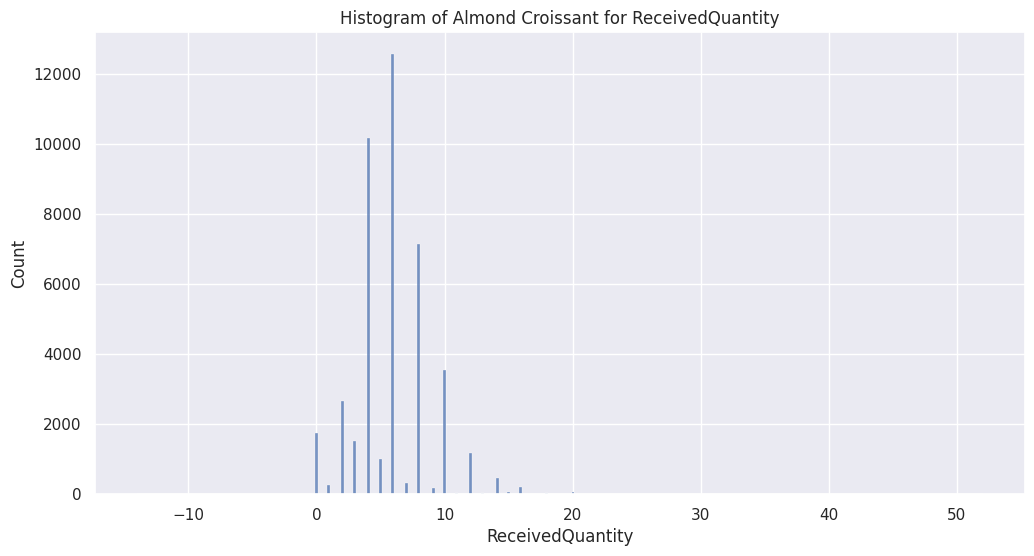

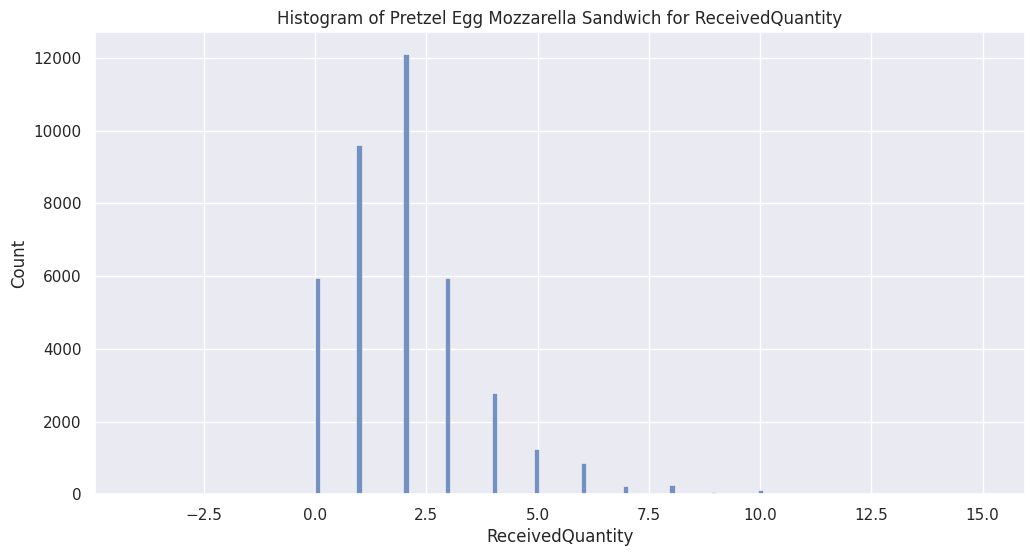

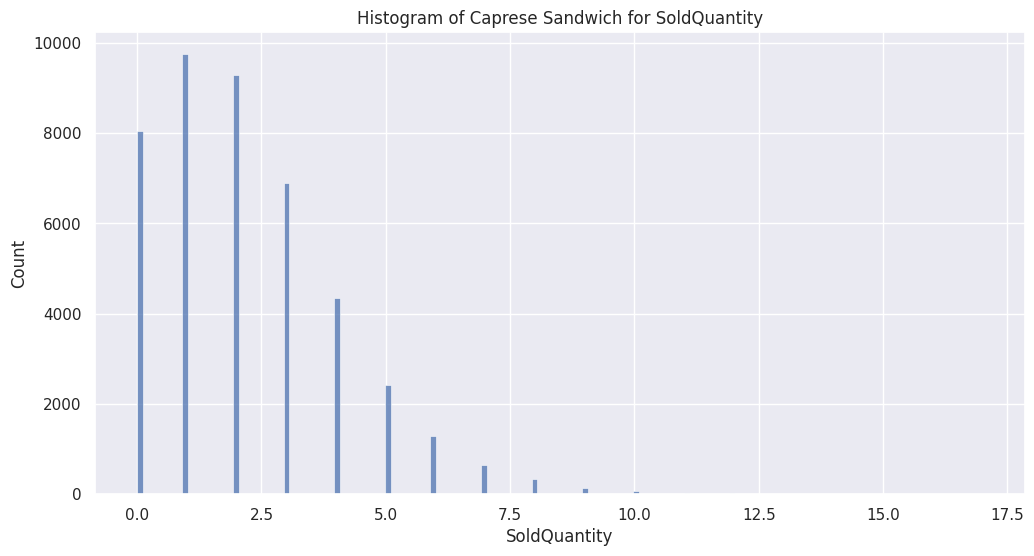

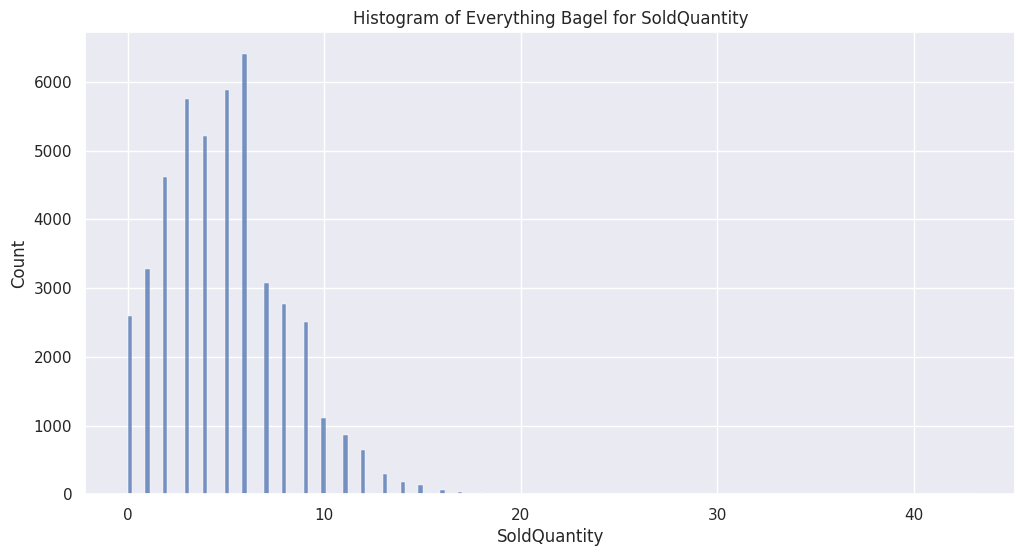

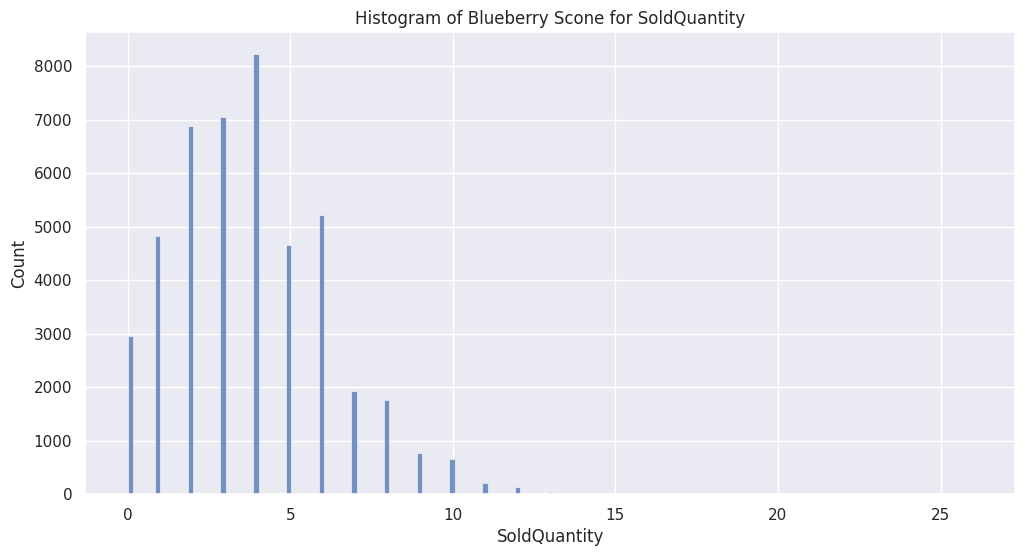

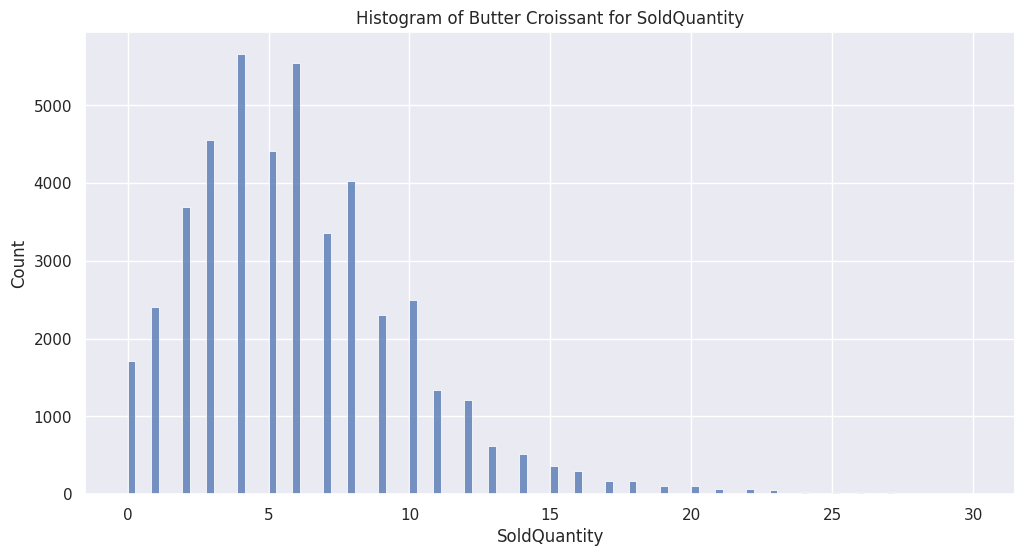

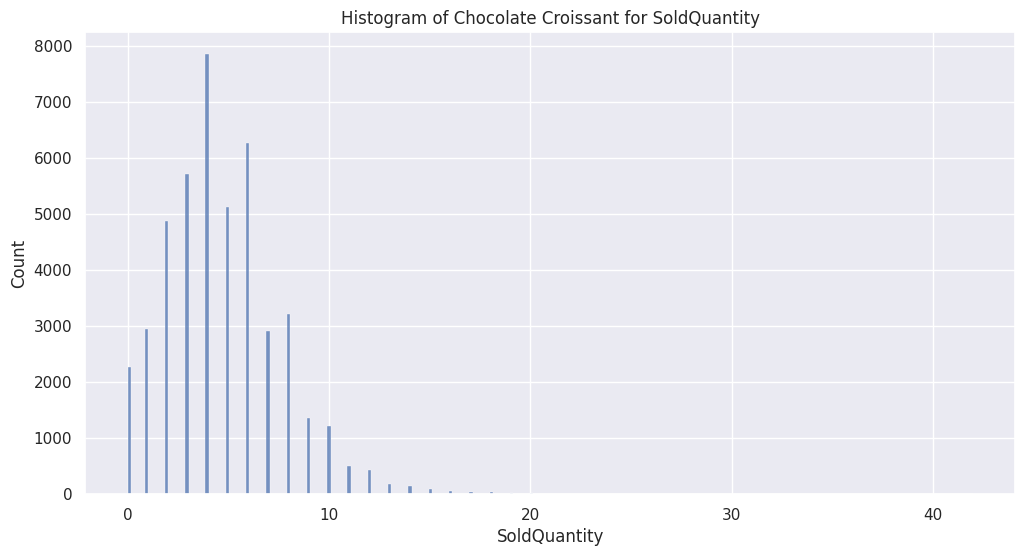

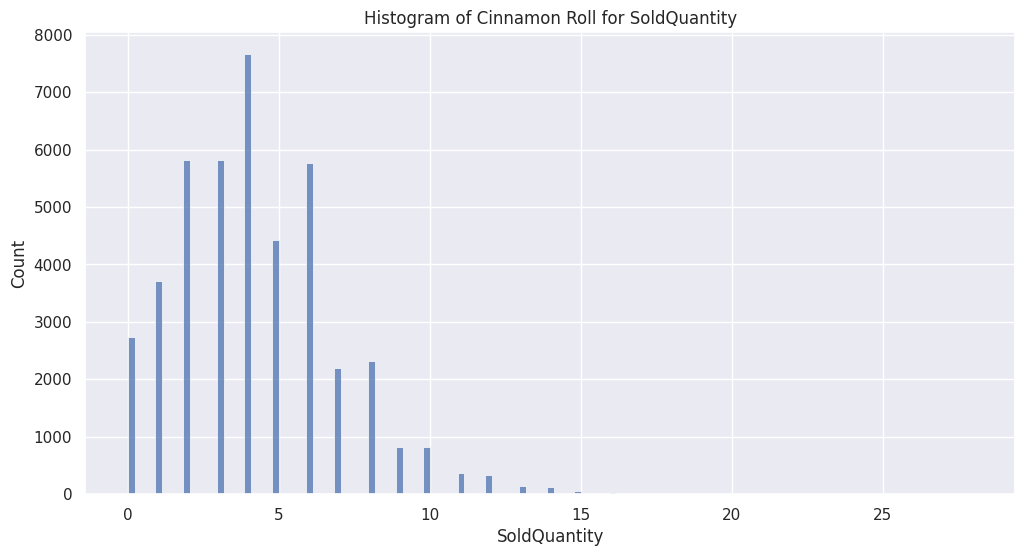

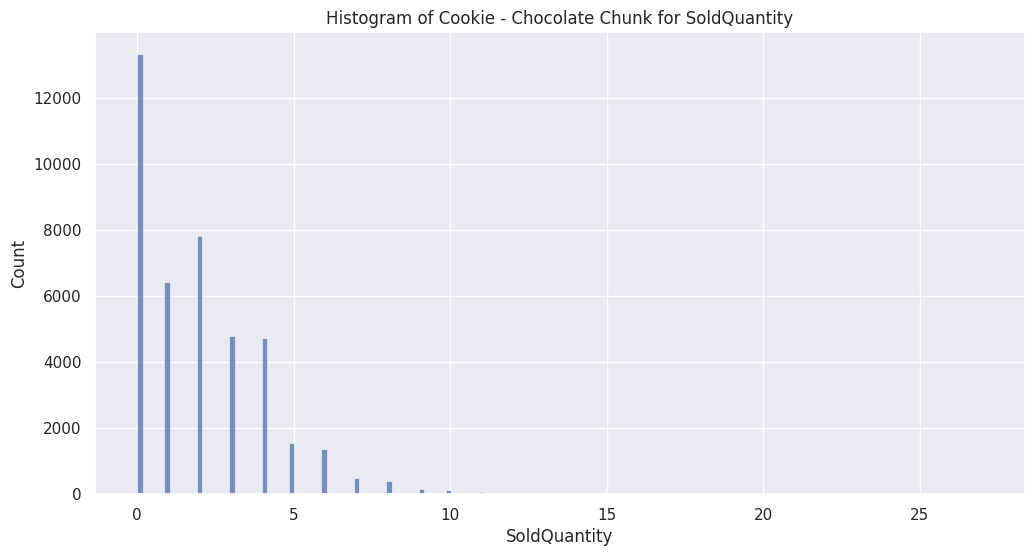

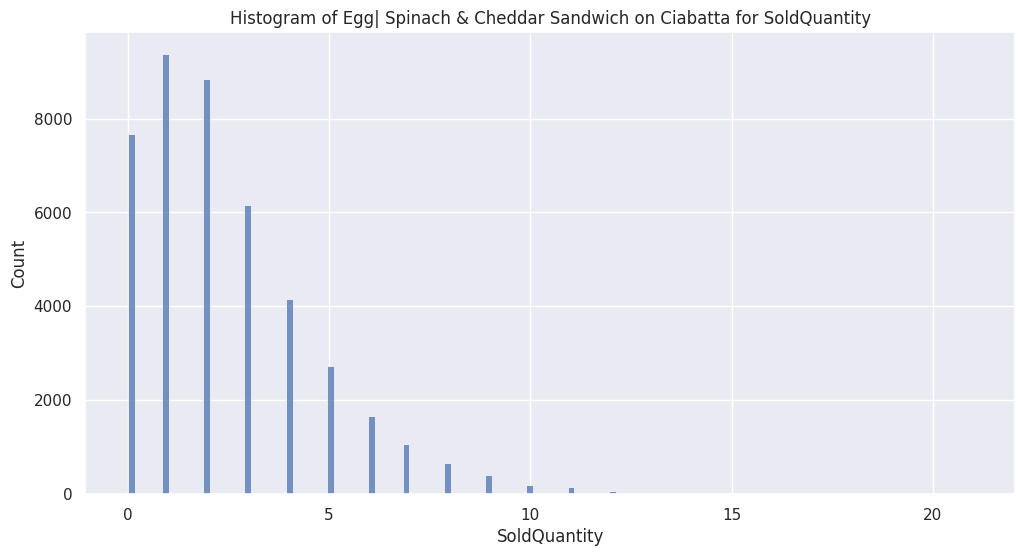

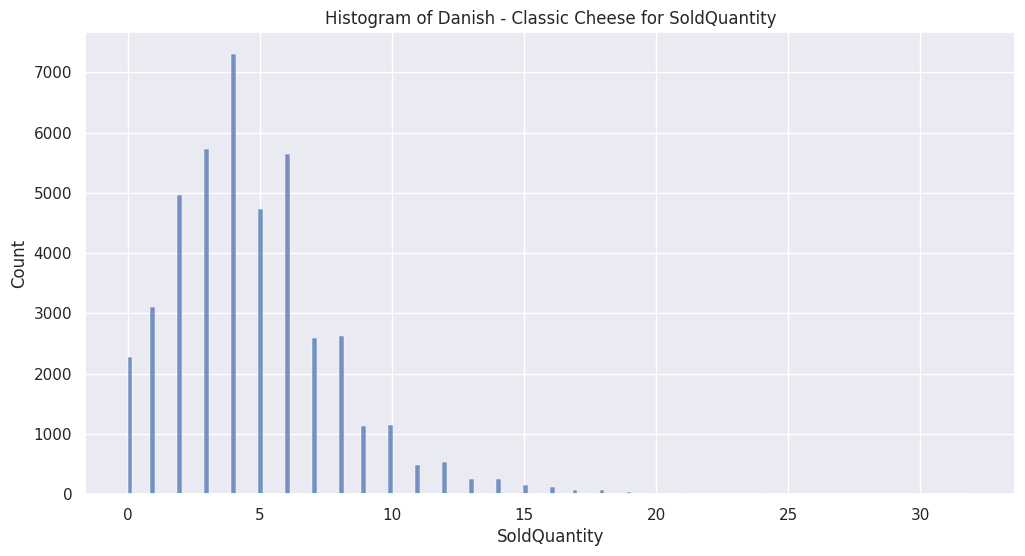

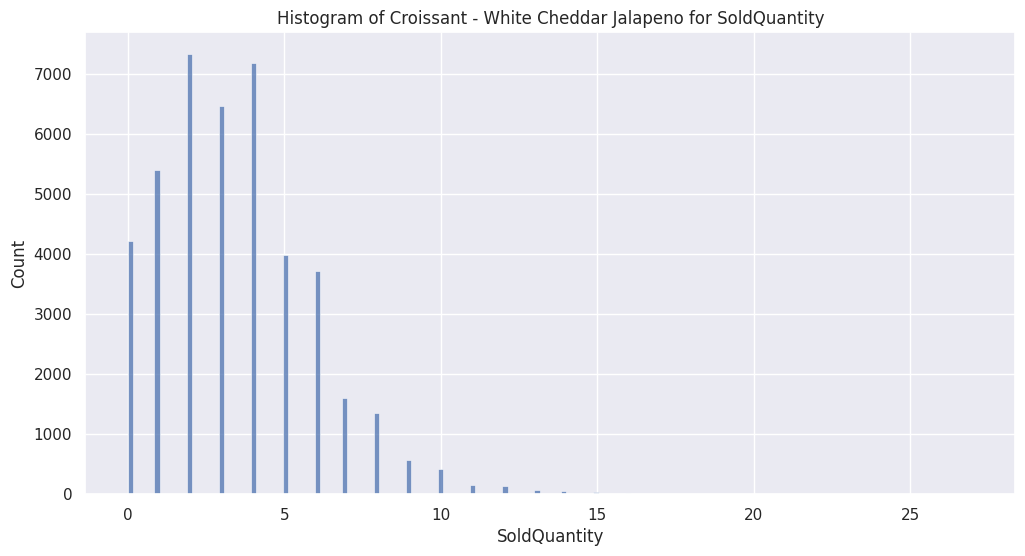

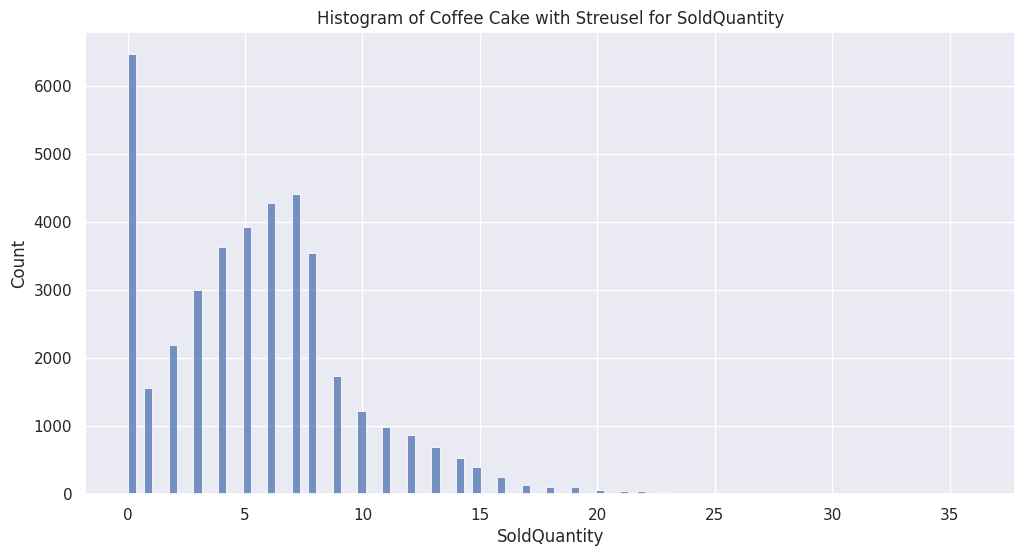

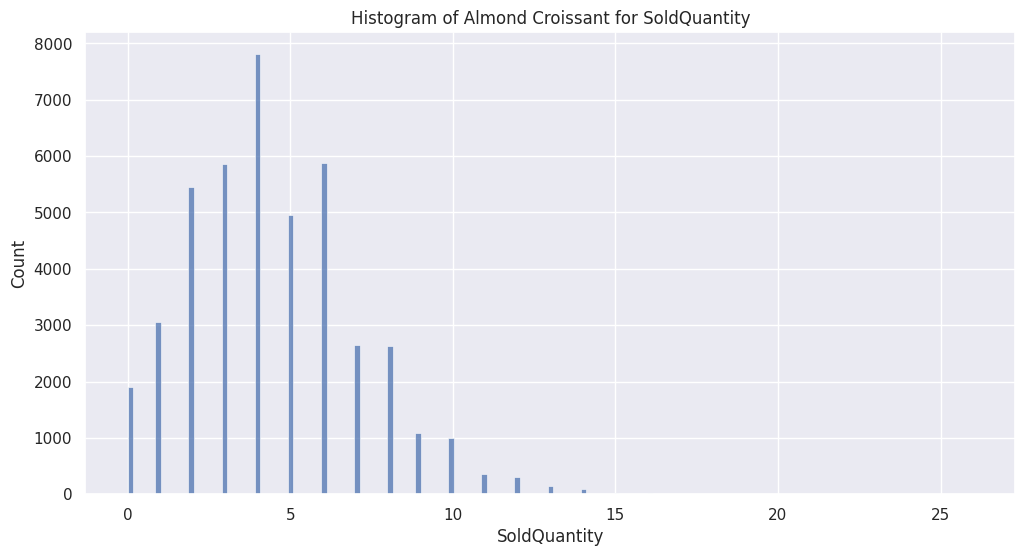

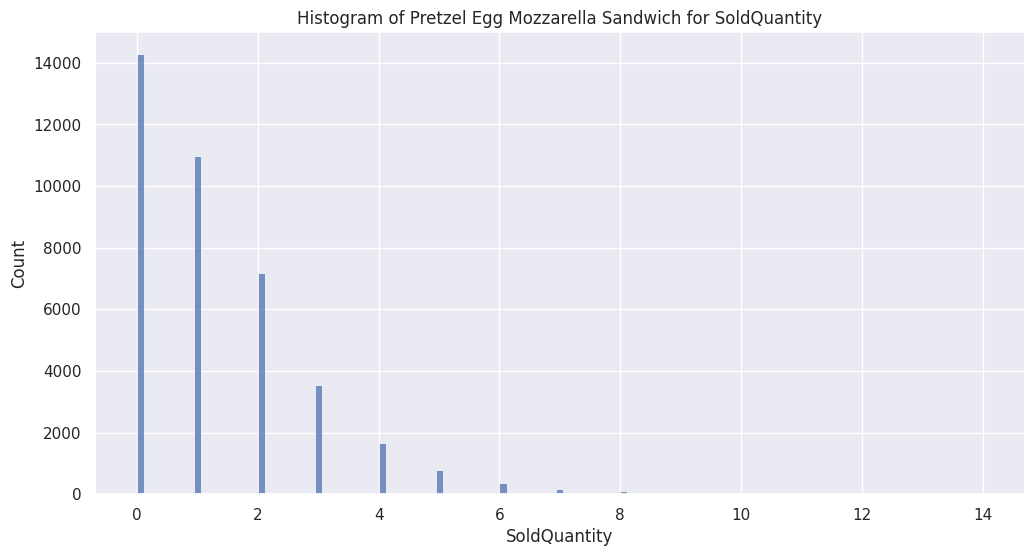

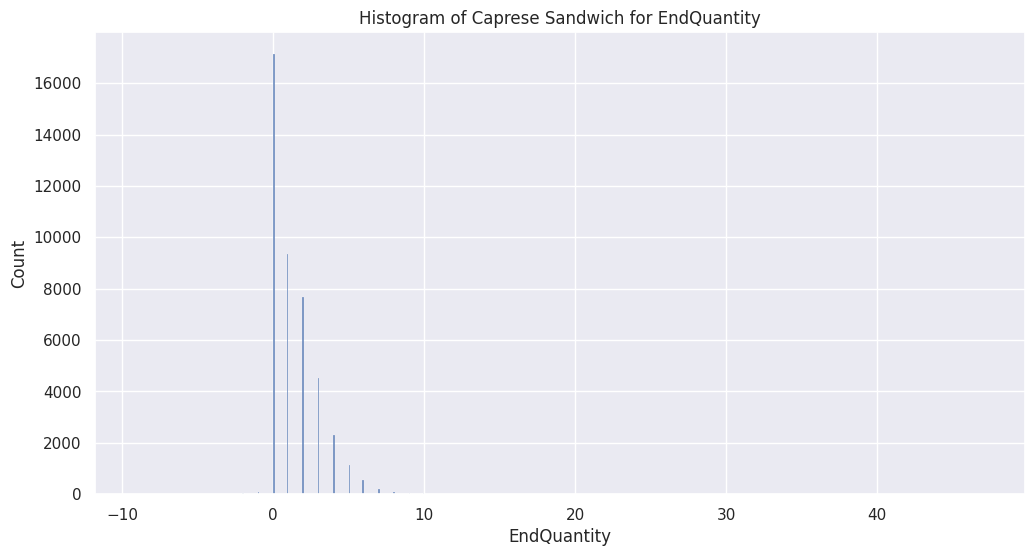

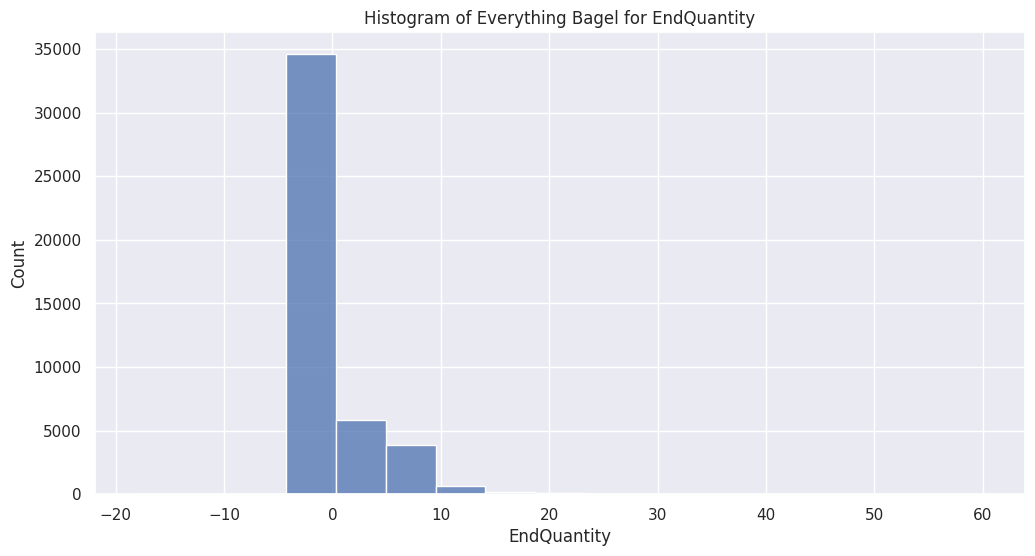

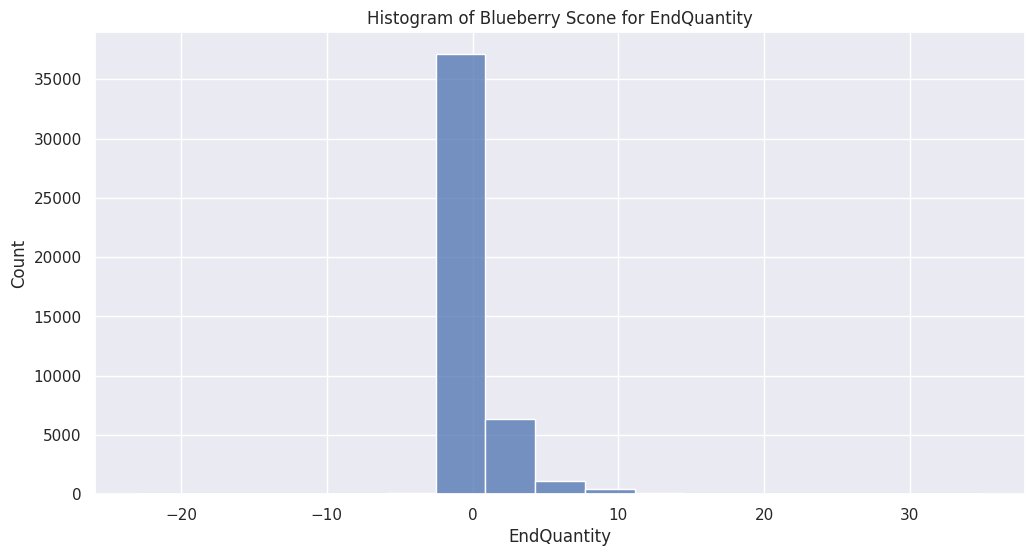

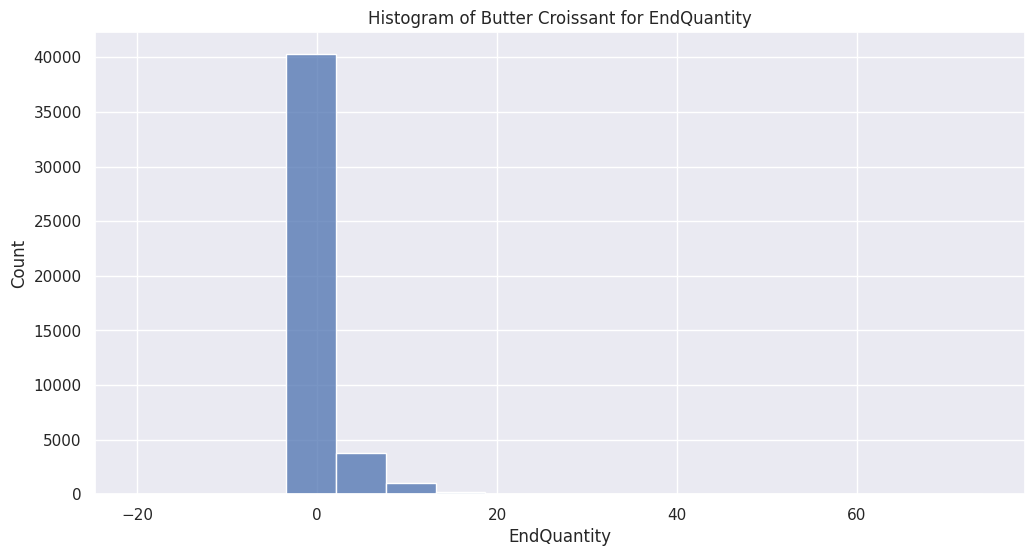

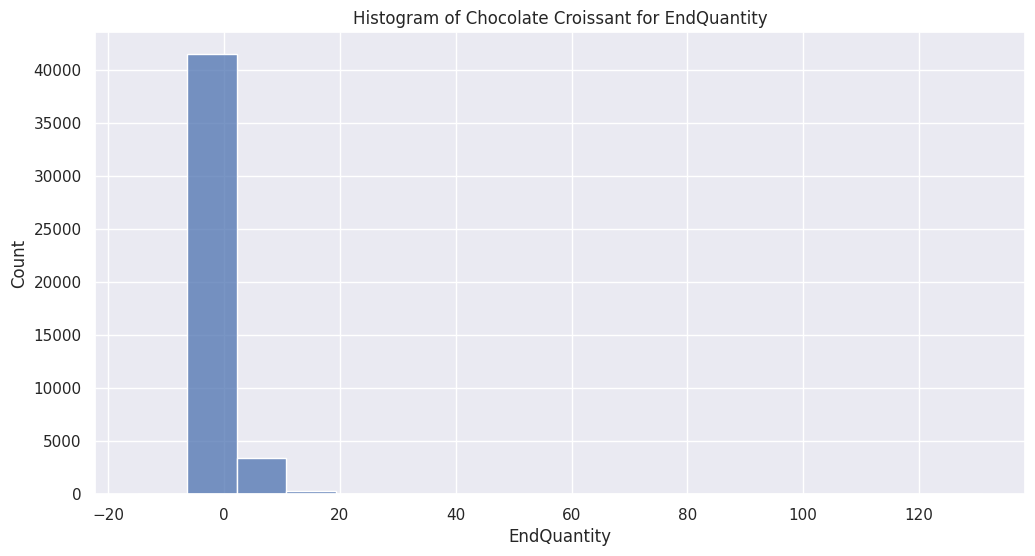

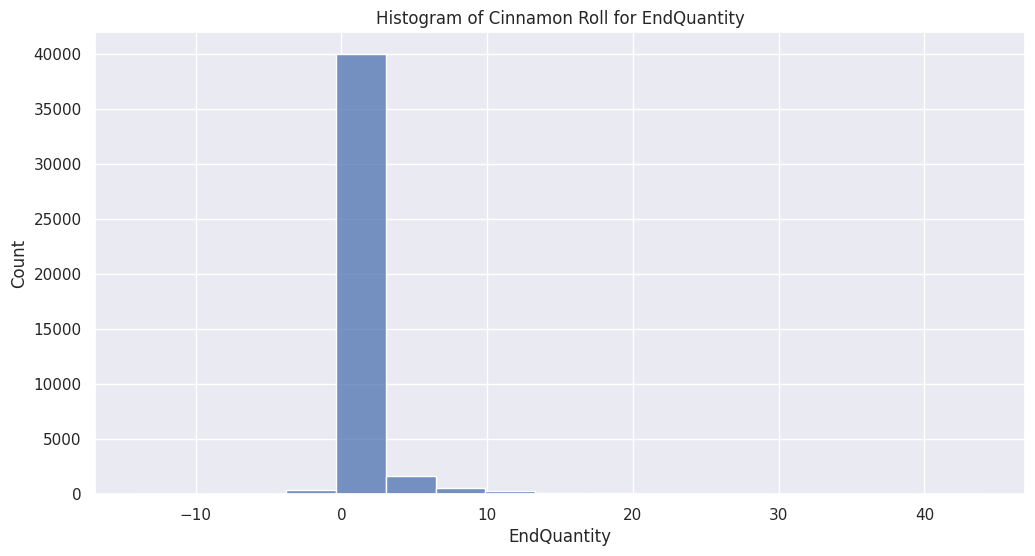

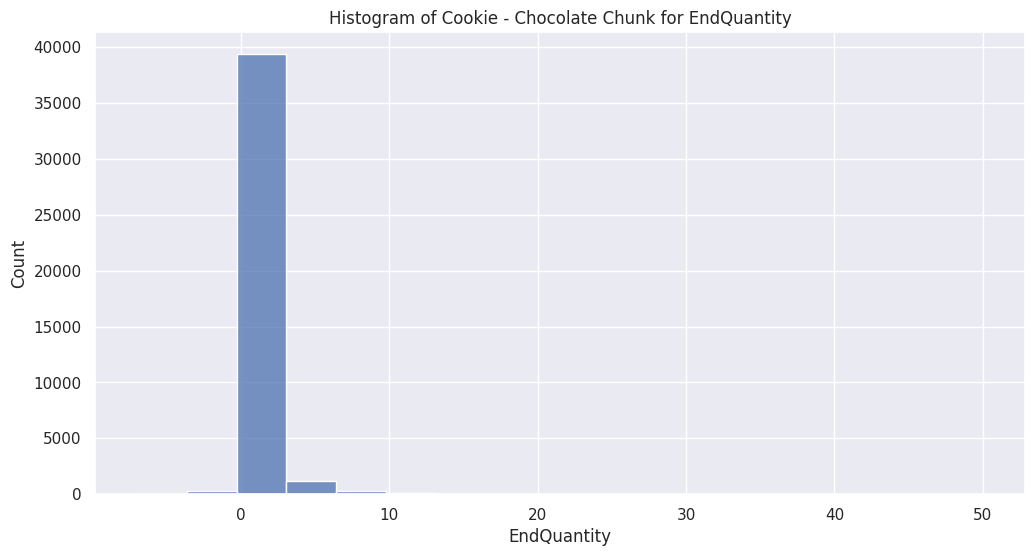

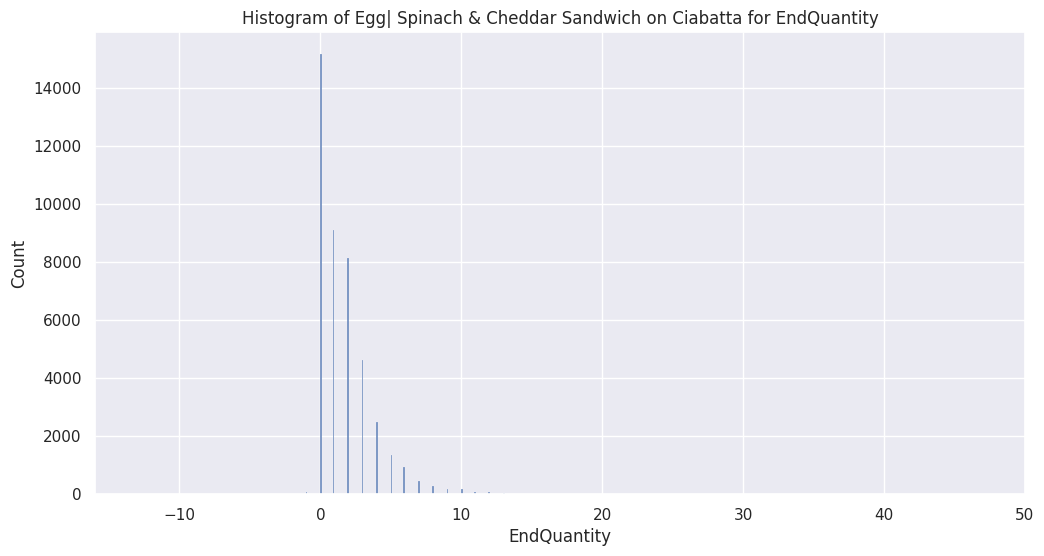

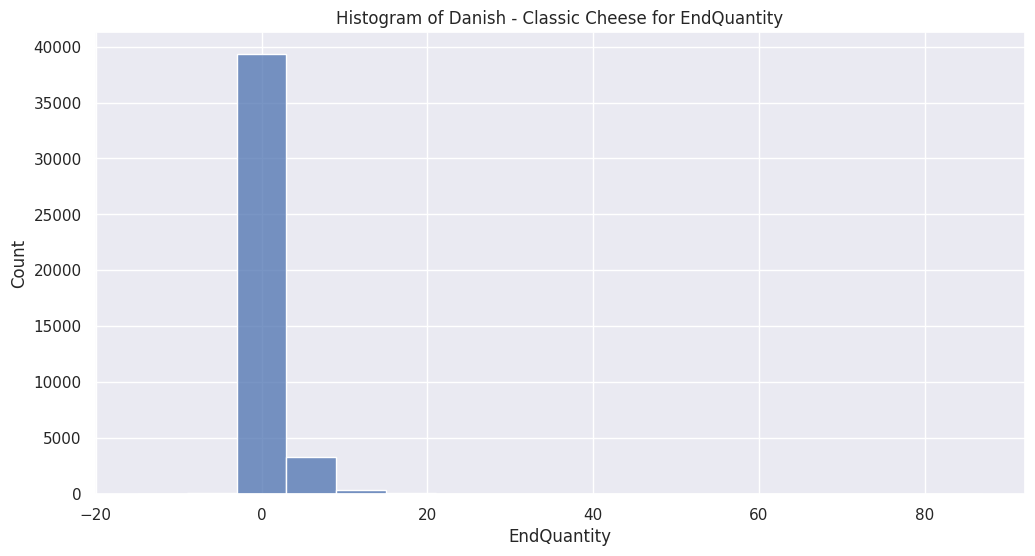

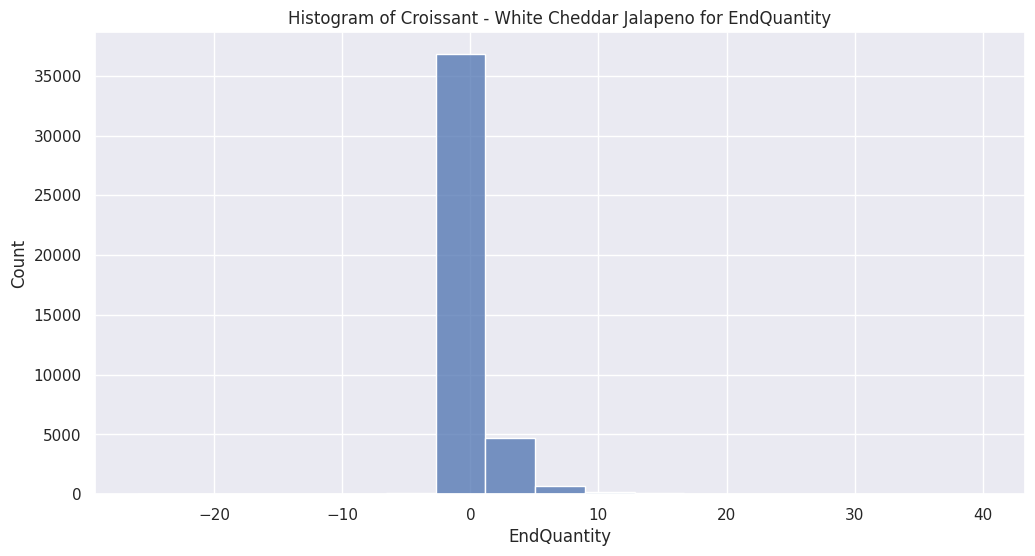

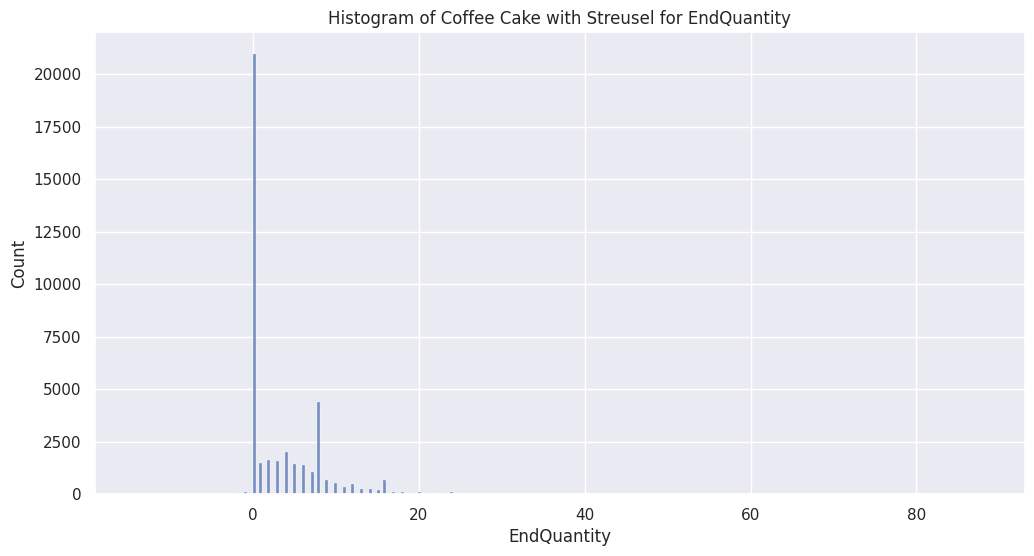

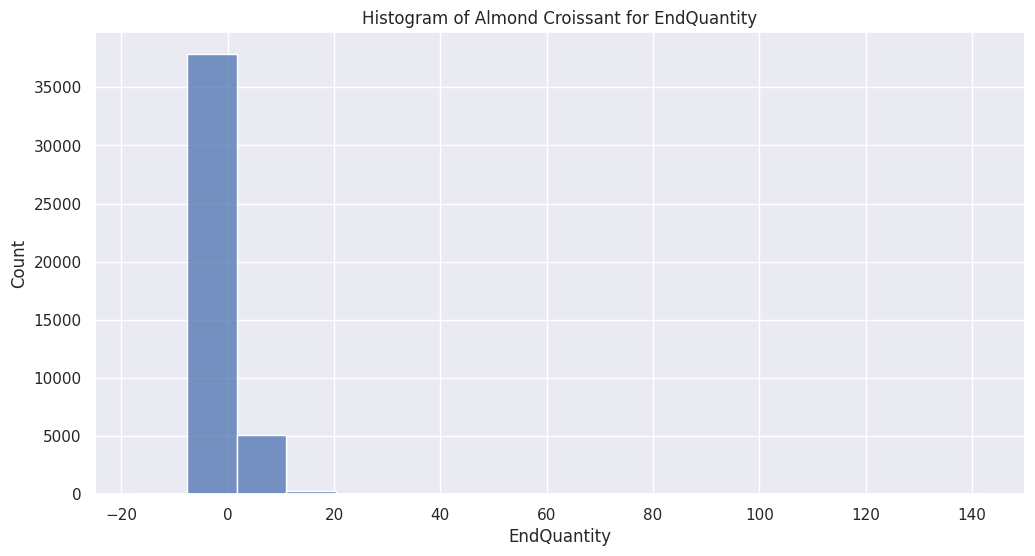

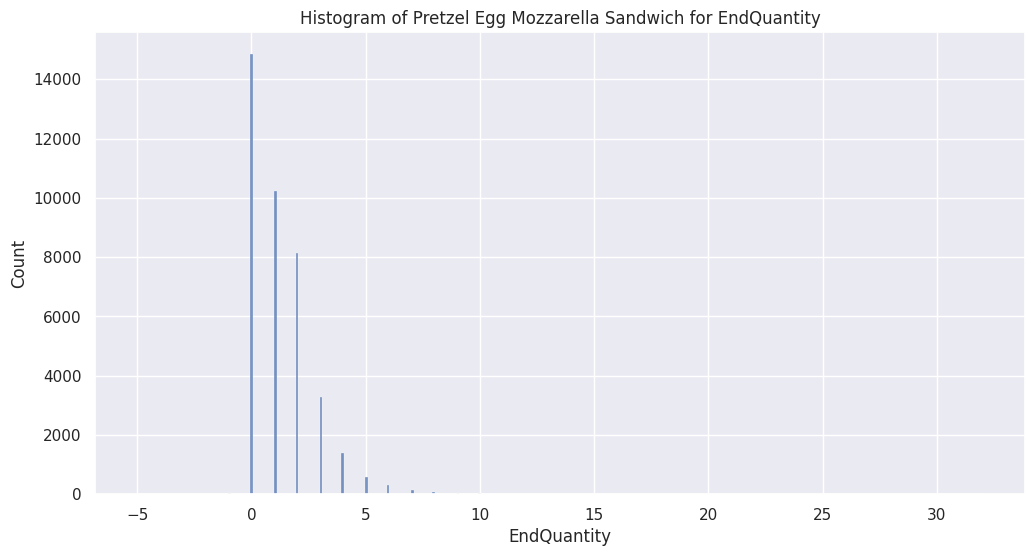

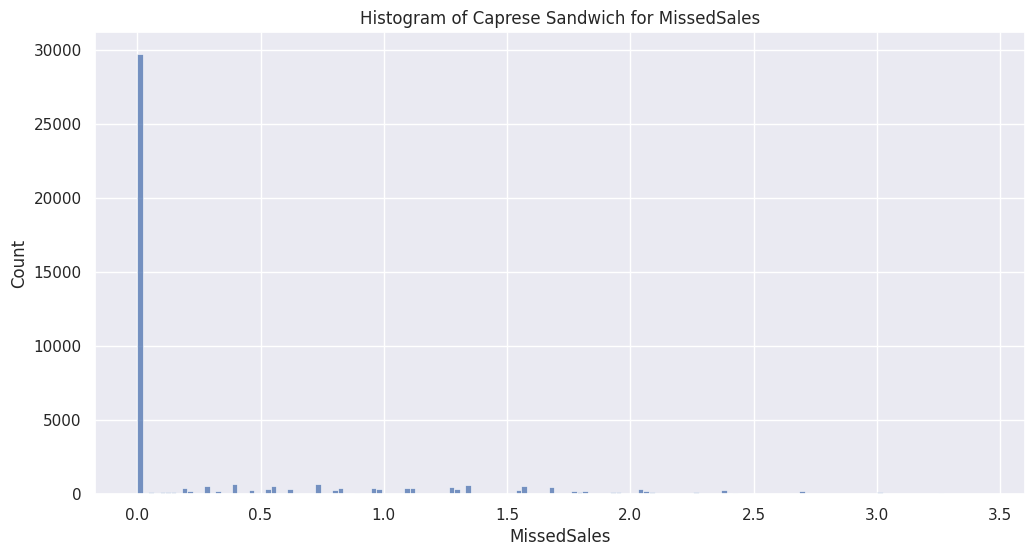

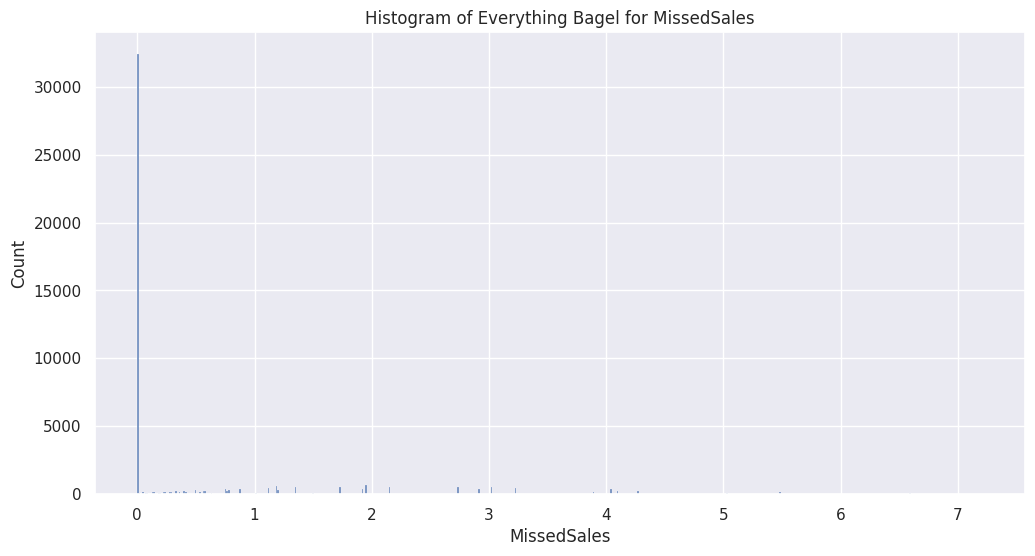

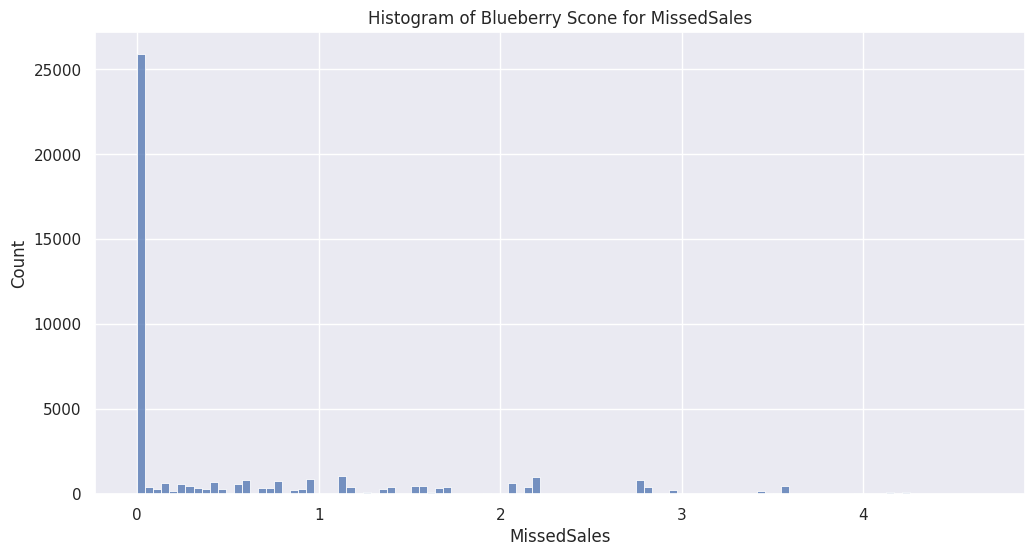

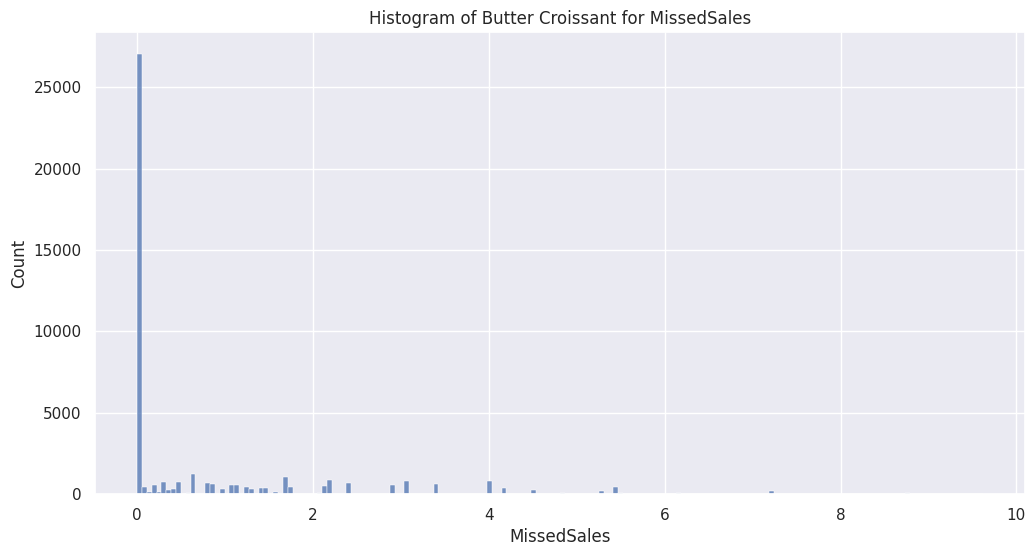

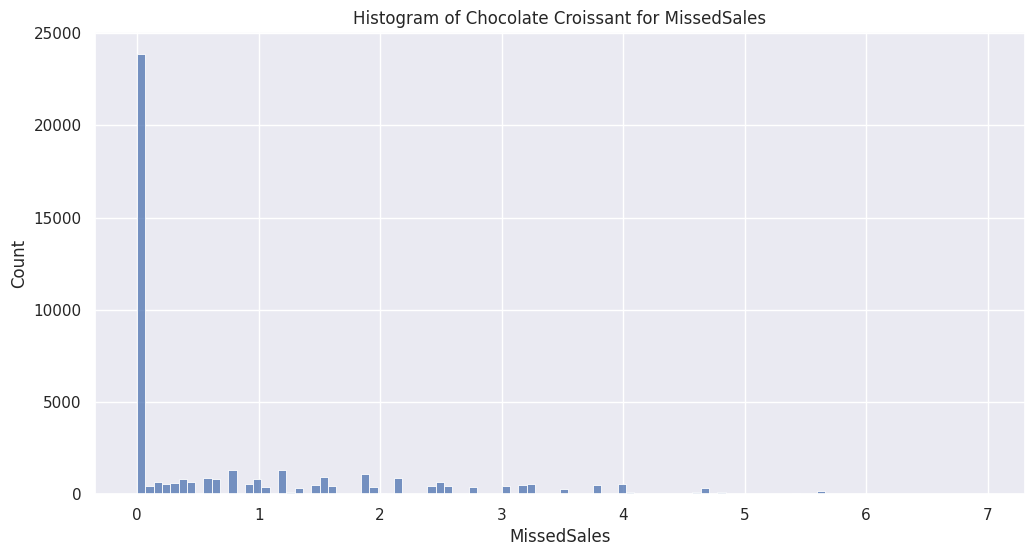

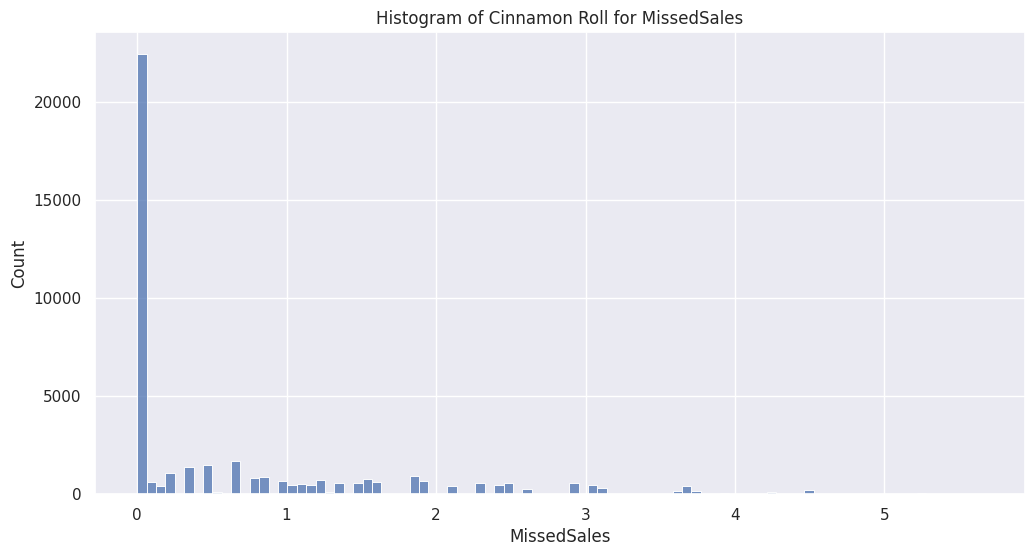

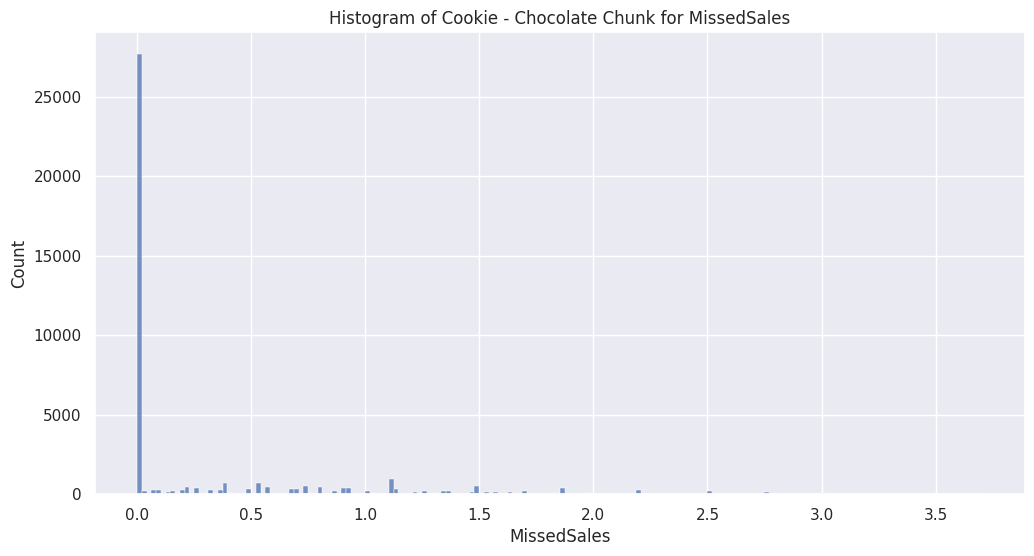

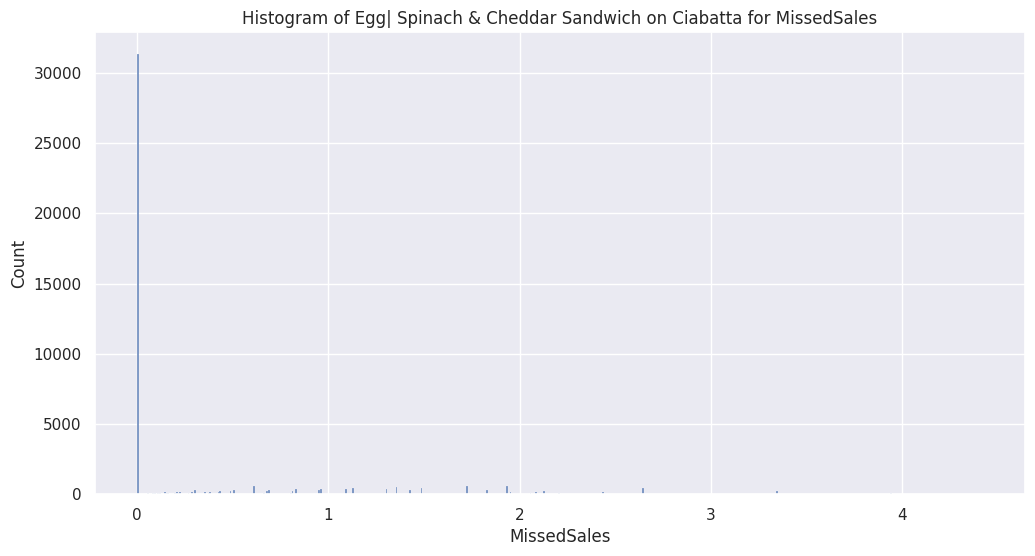

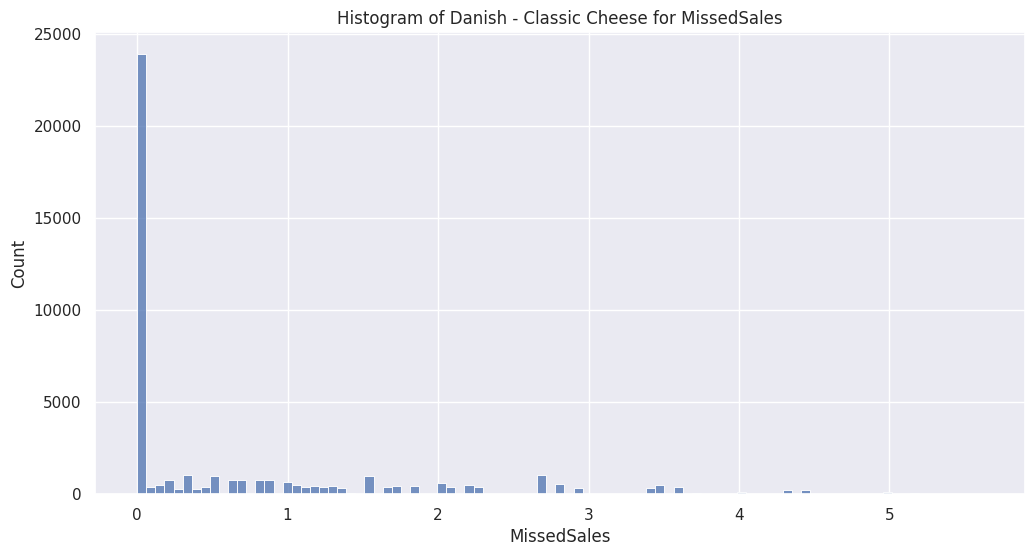

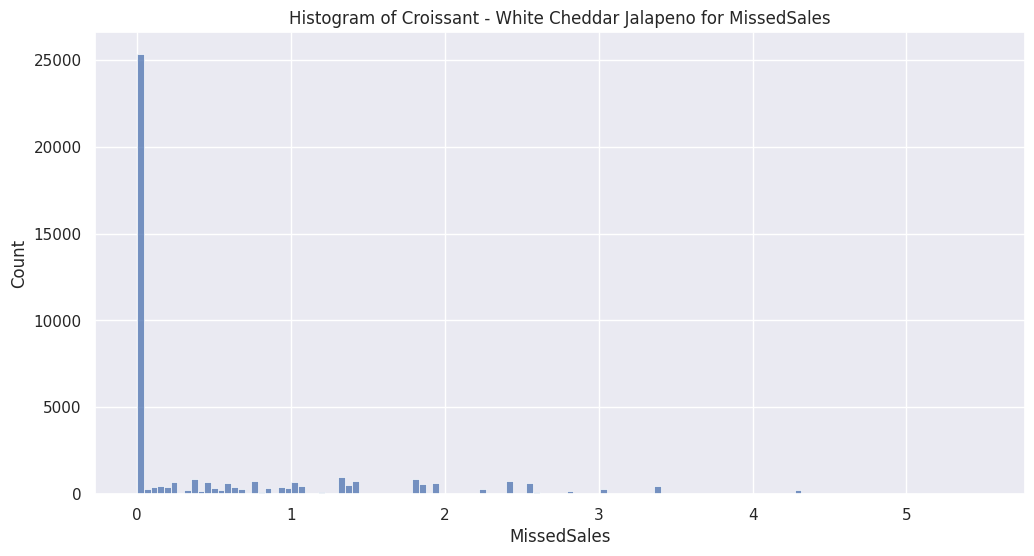

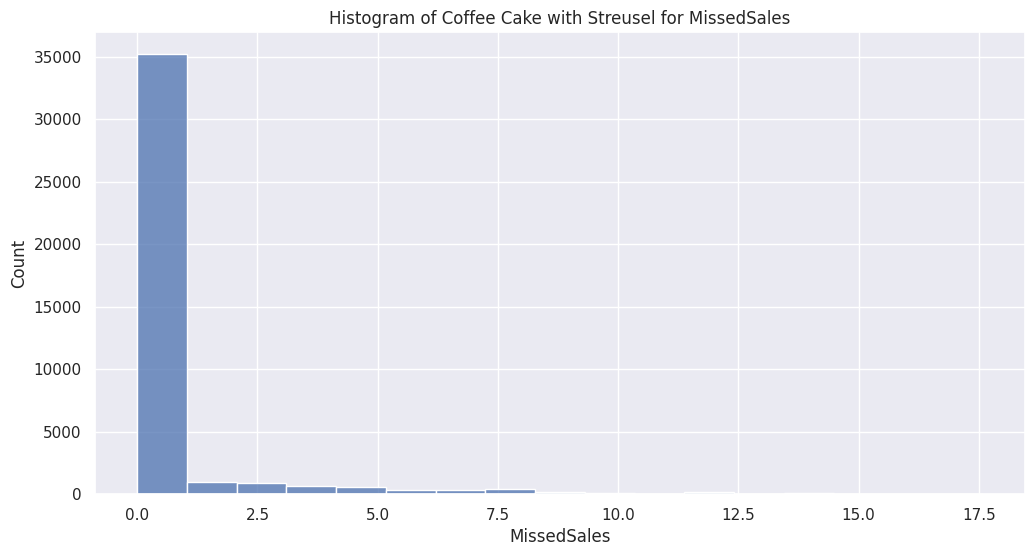

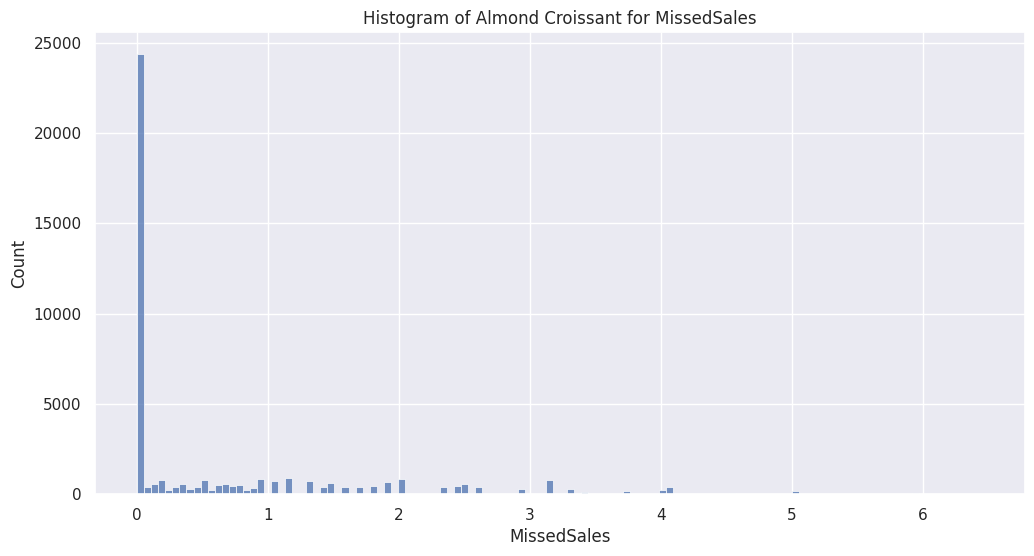

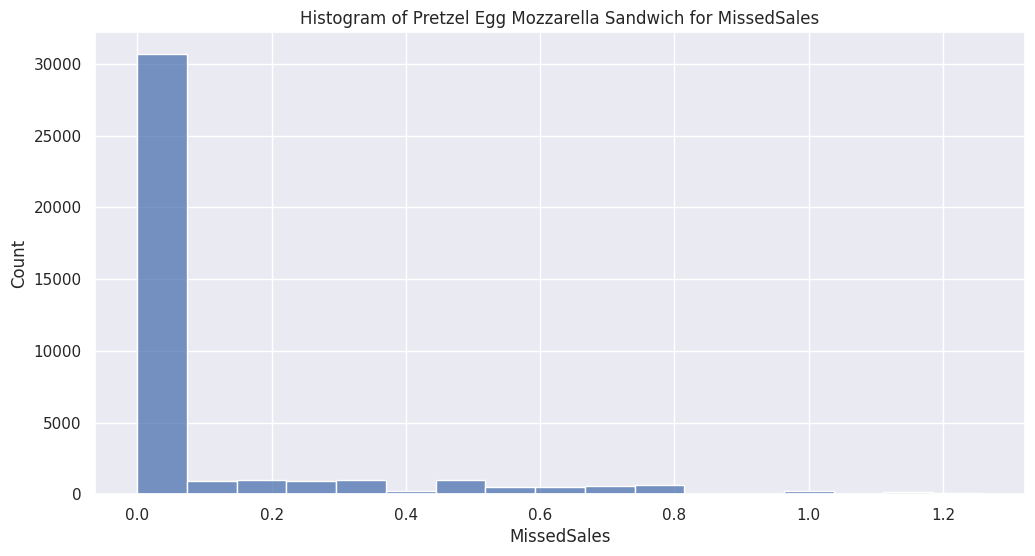

In [21]:
sns.set(rc={'figure.figsize':(12, 6)})
sub_filter = coffeeData_filtered[coffeeData_filtered['Description'].isin(all_products)]
for column in ['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'MissedSales']:
    for product in all_products:
        p_df = sub_filter[sub_filter['Description']==product]
        plt.figure()
        myplot = sns.histplot(x=p_df[column])
        myplot.set_title(f'Histogram of {product} for {column}')

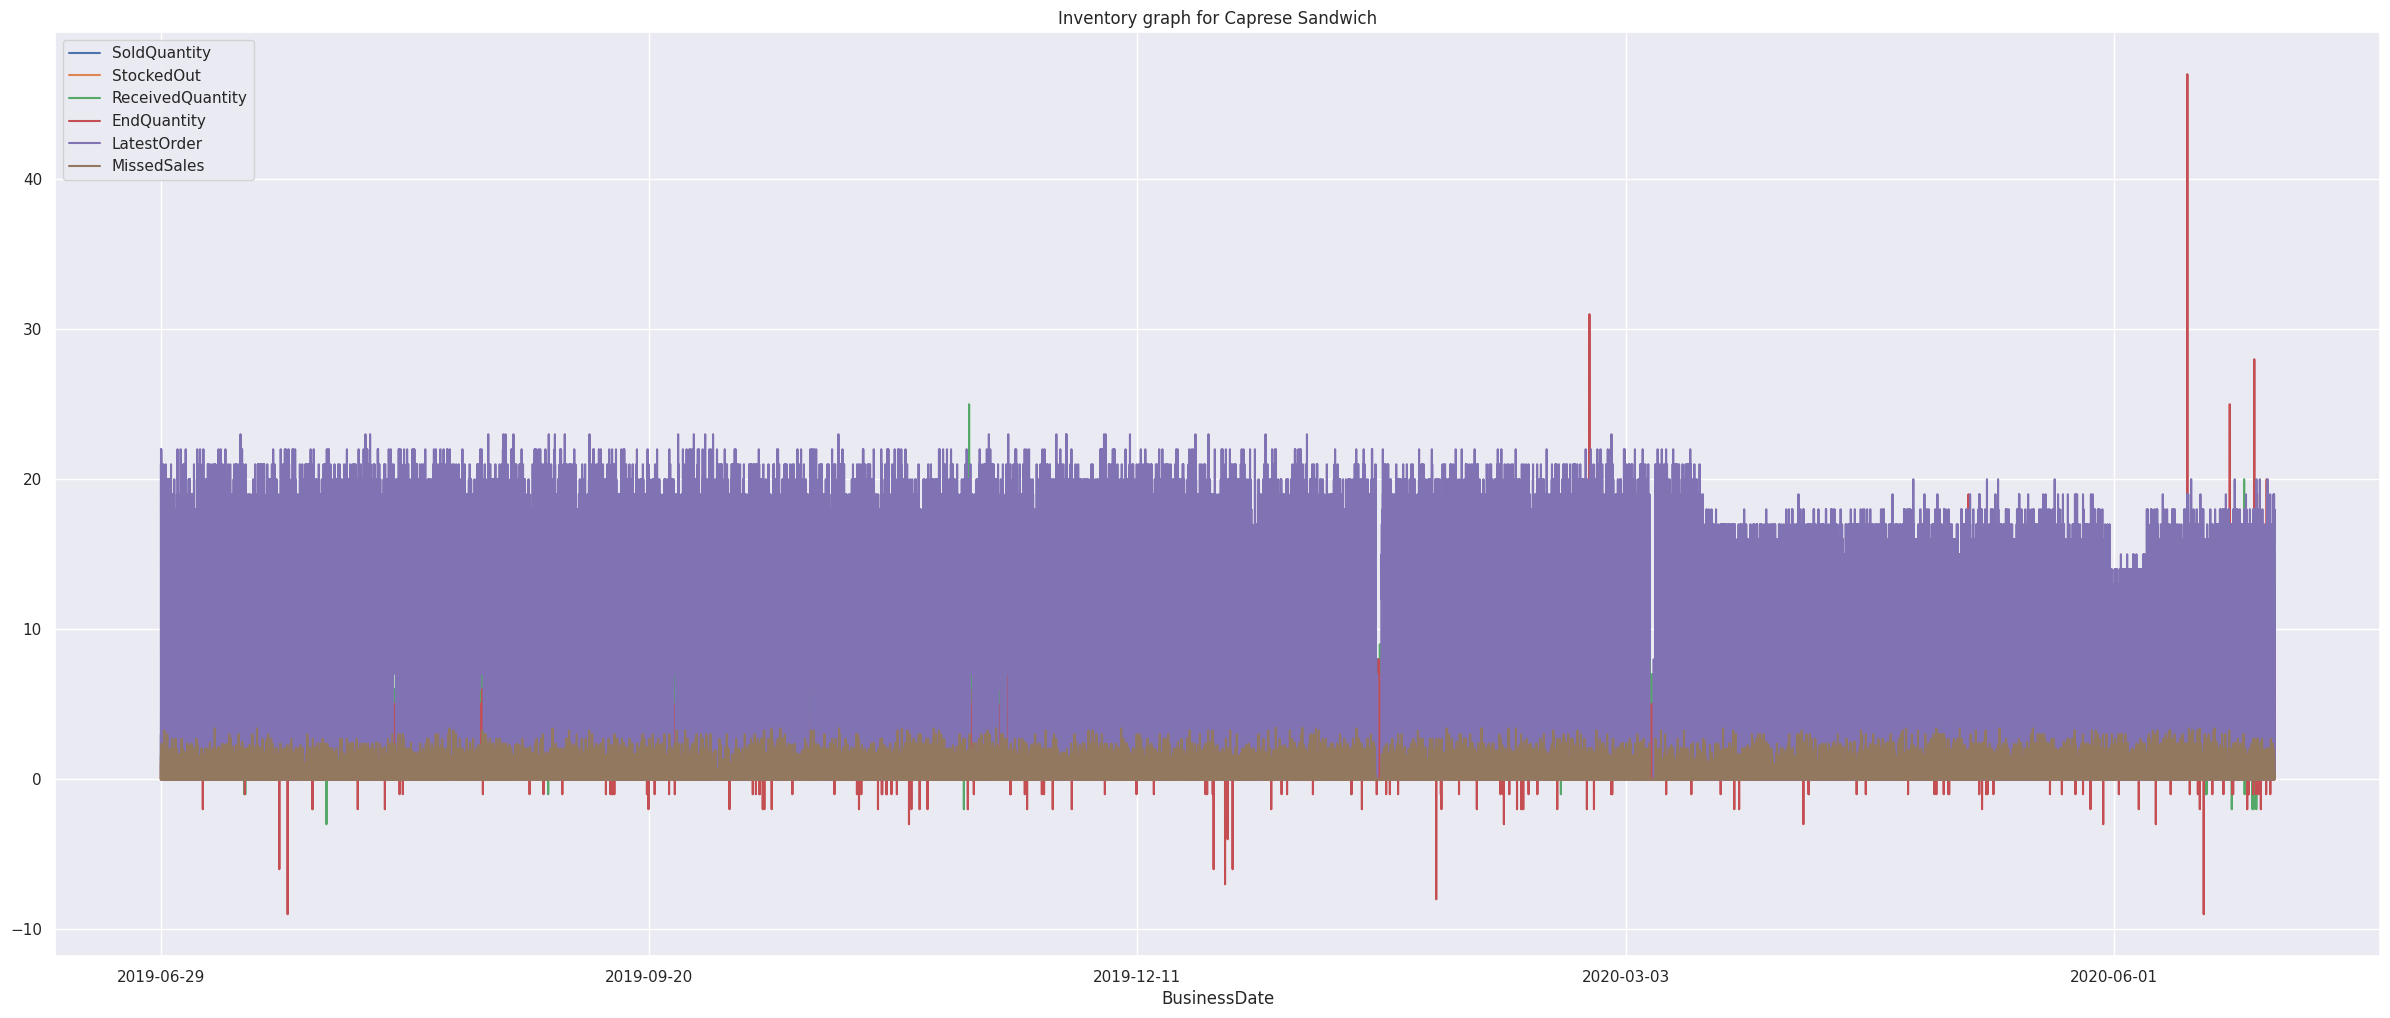

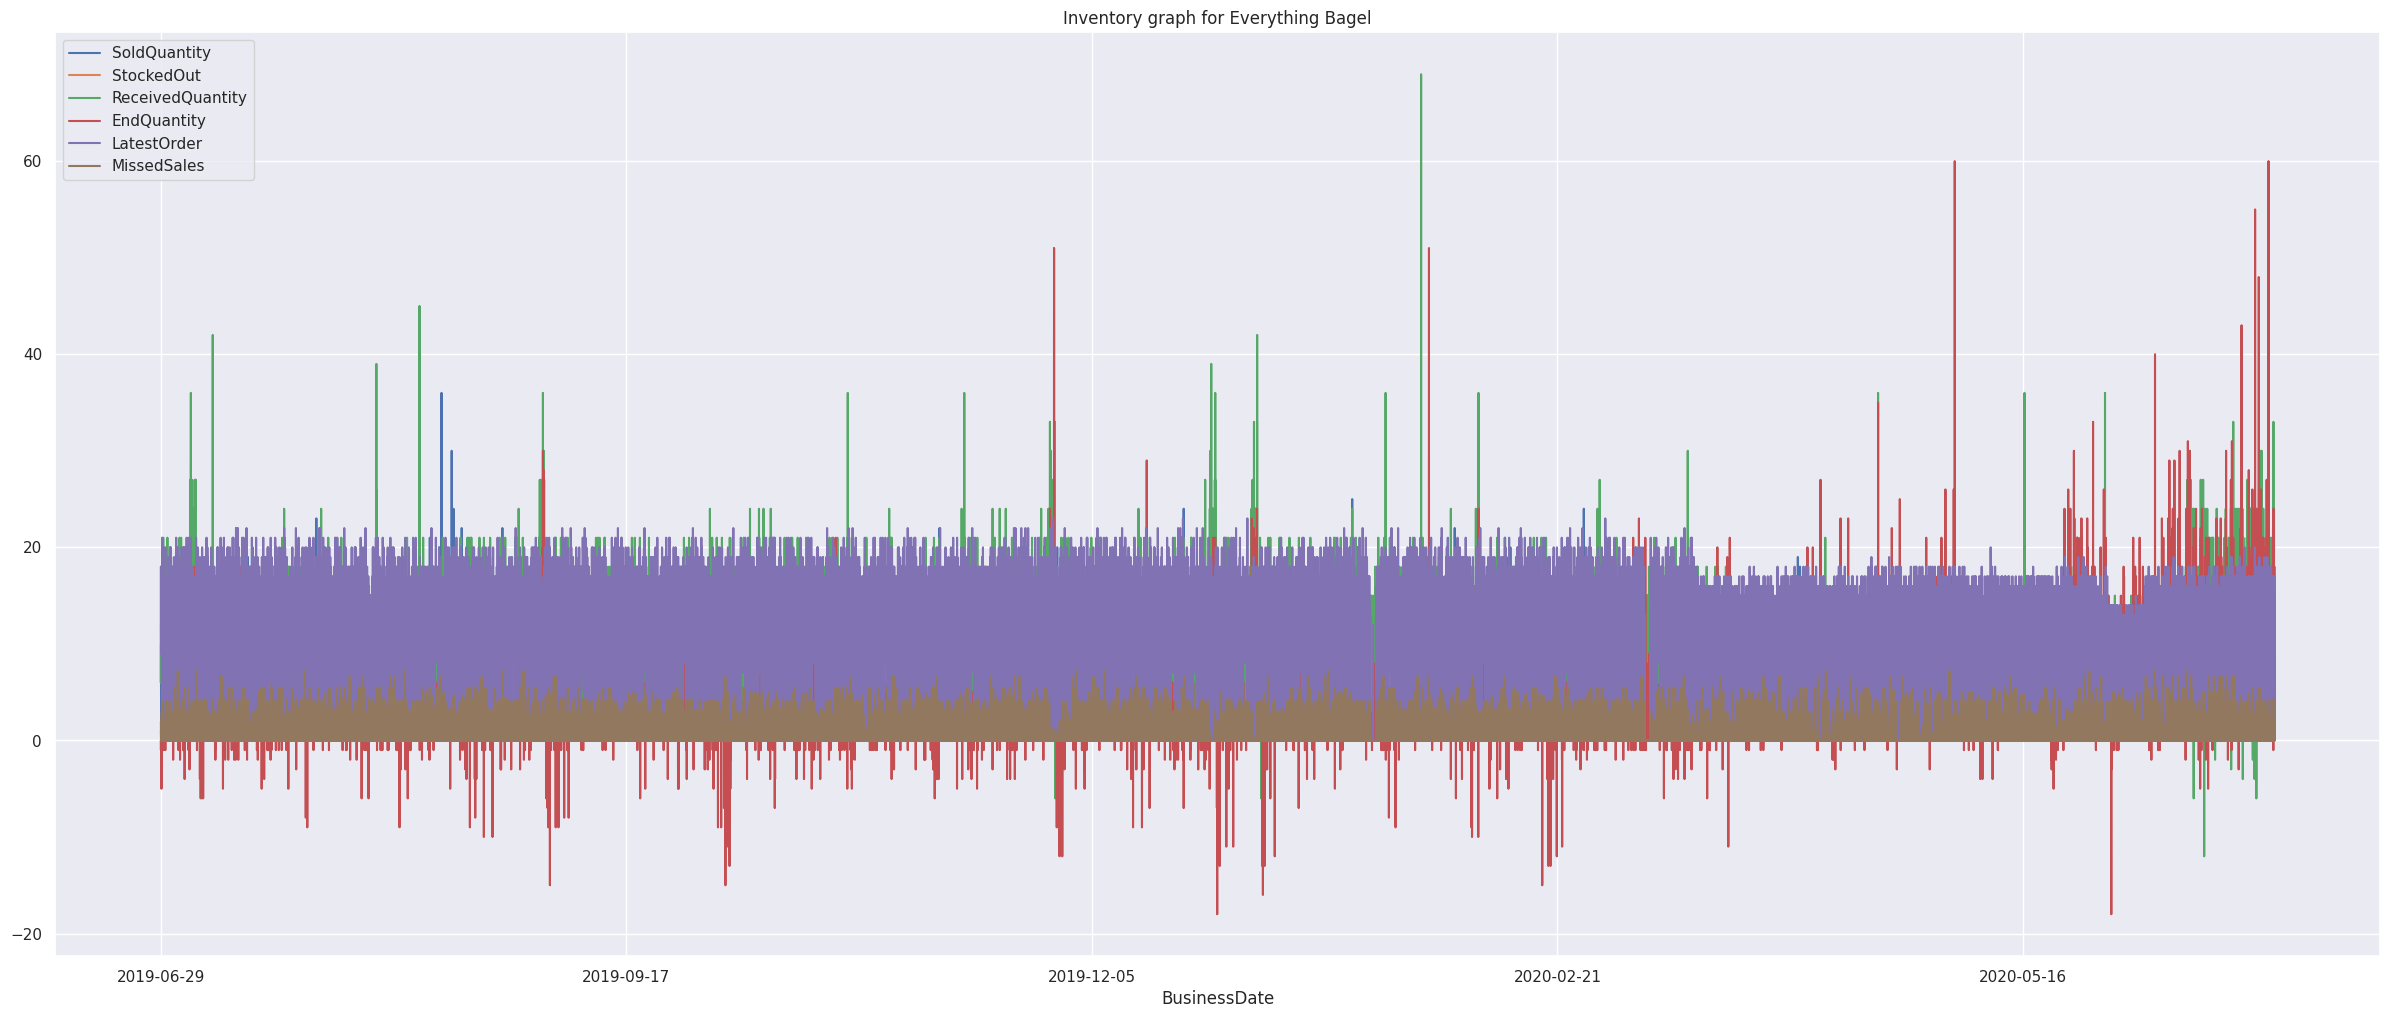

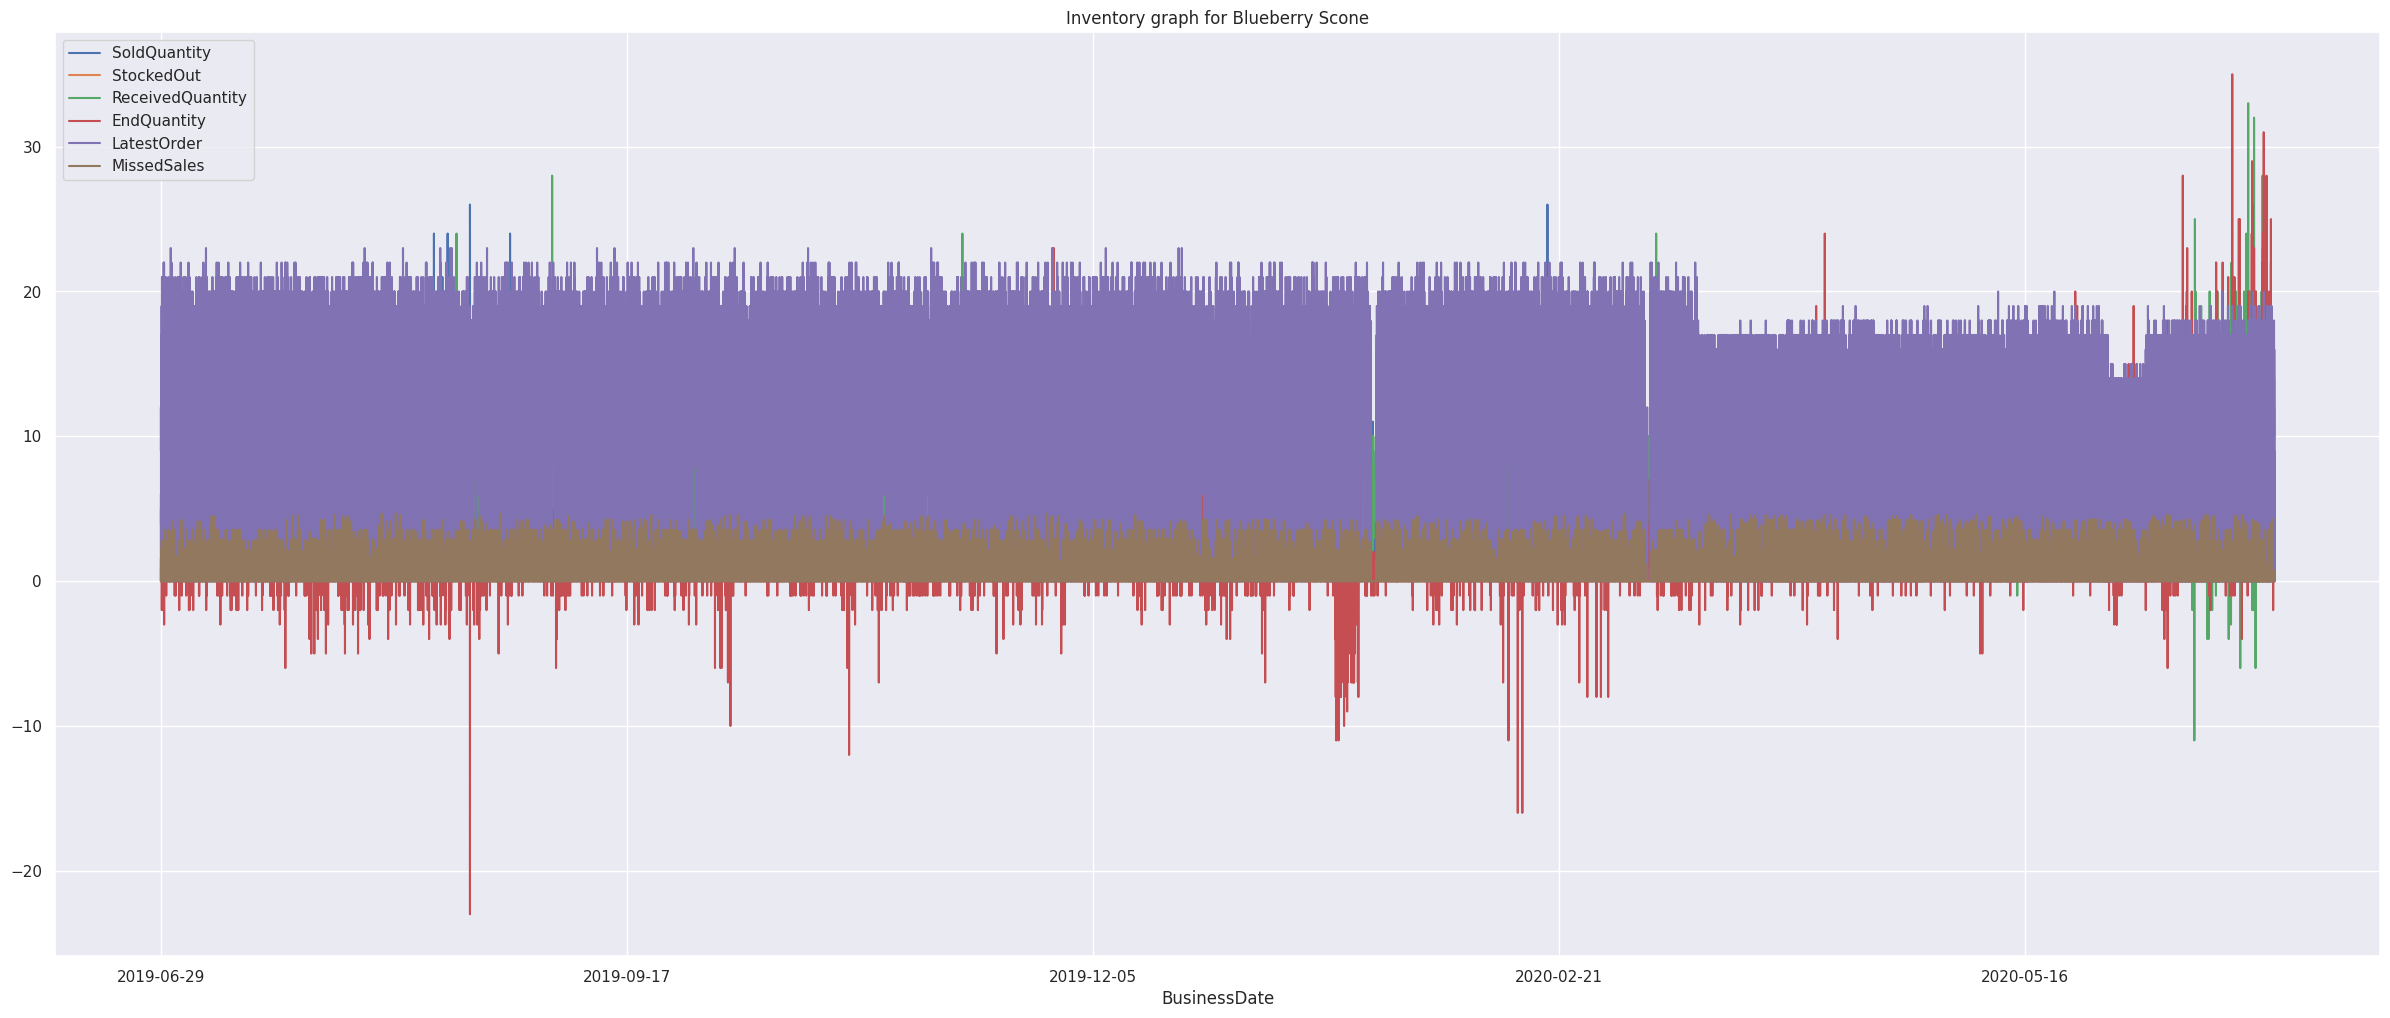

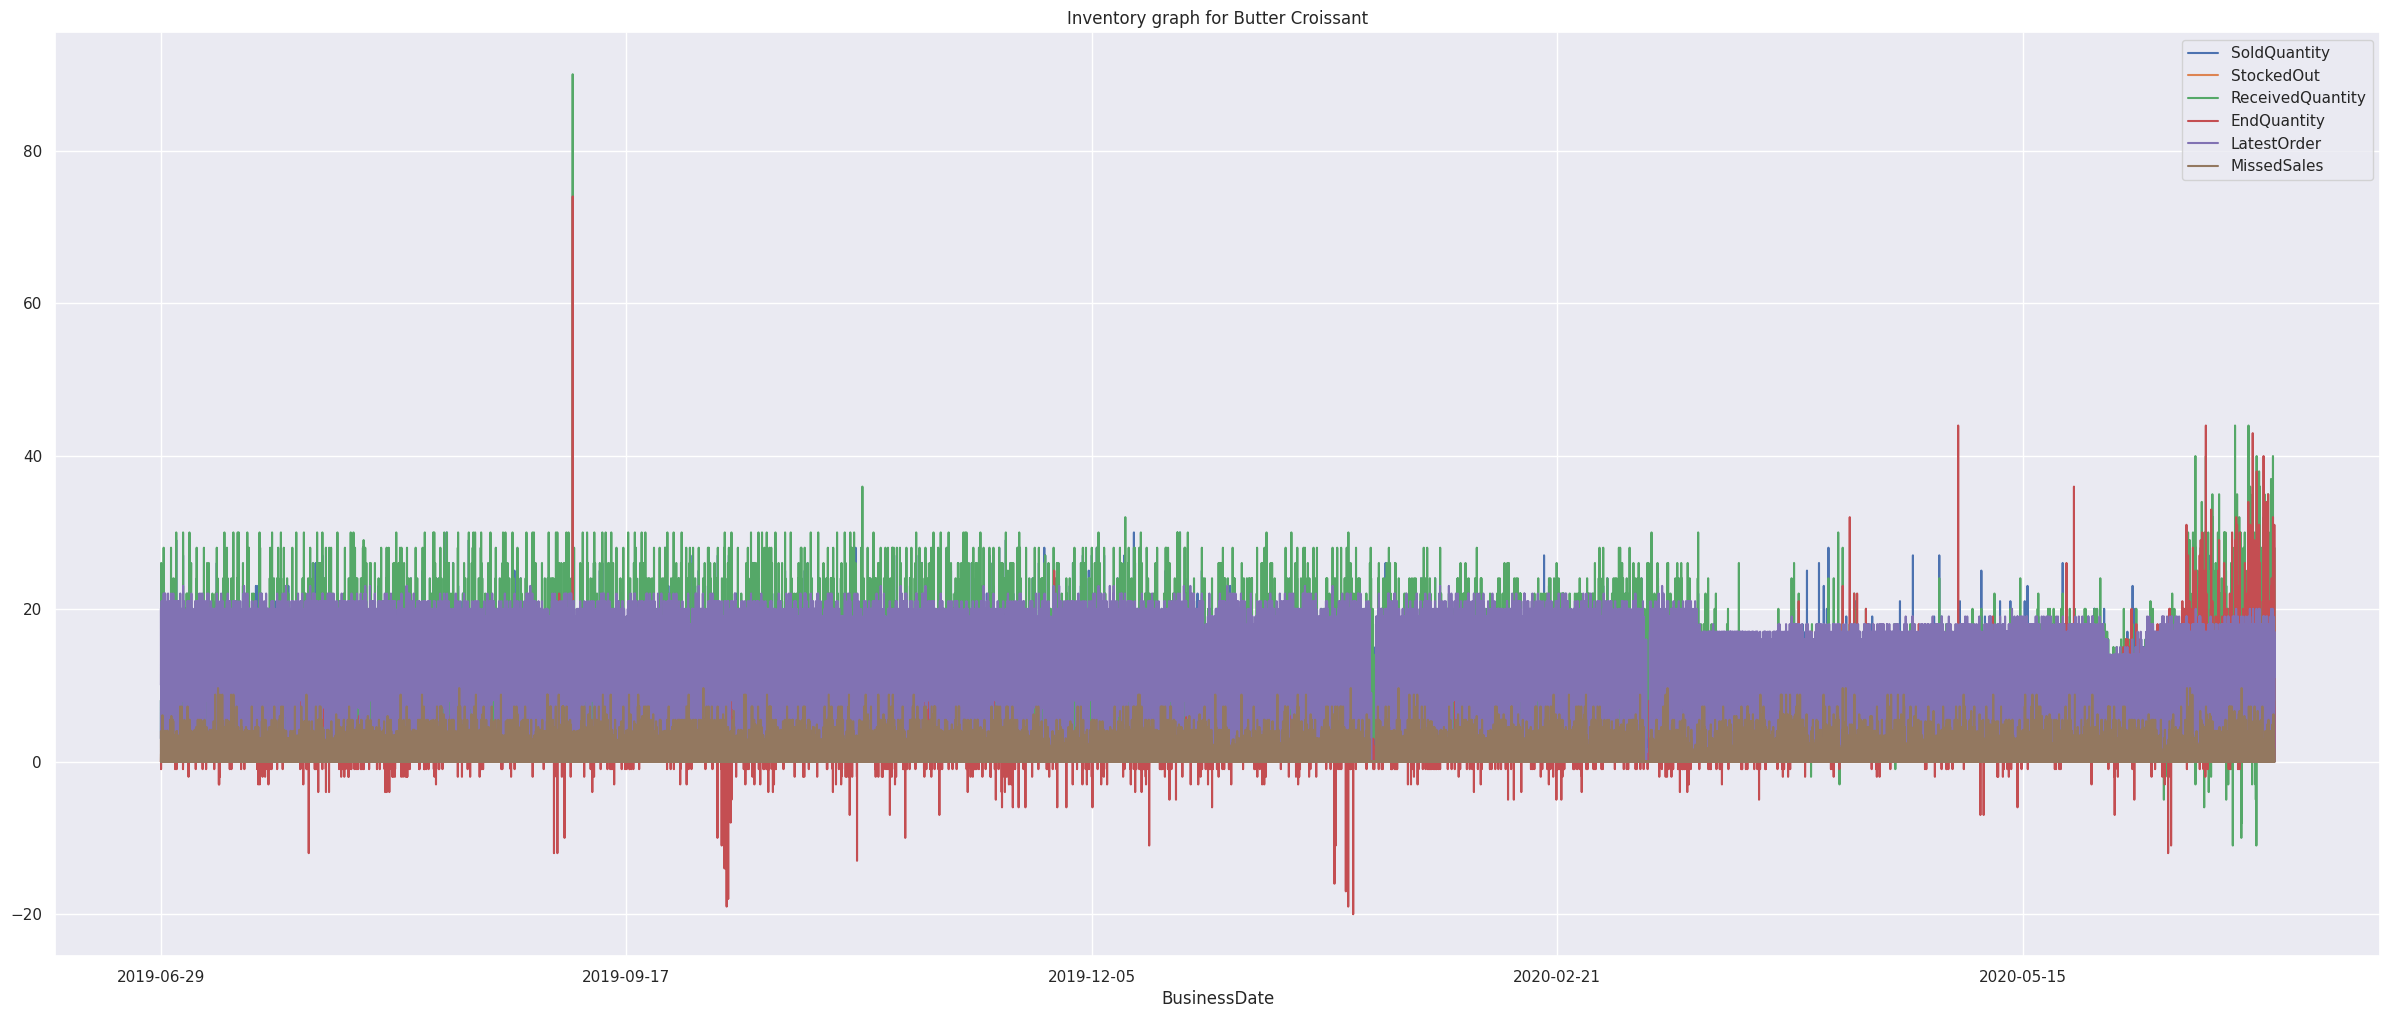

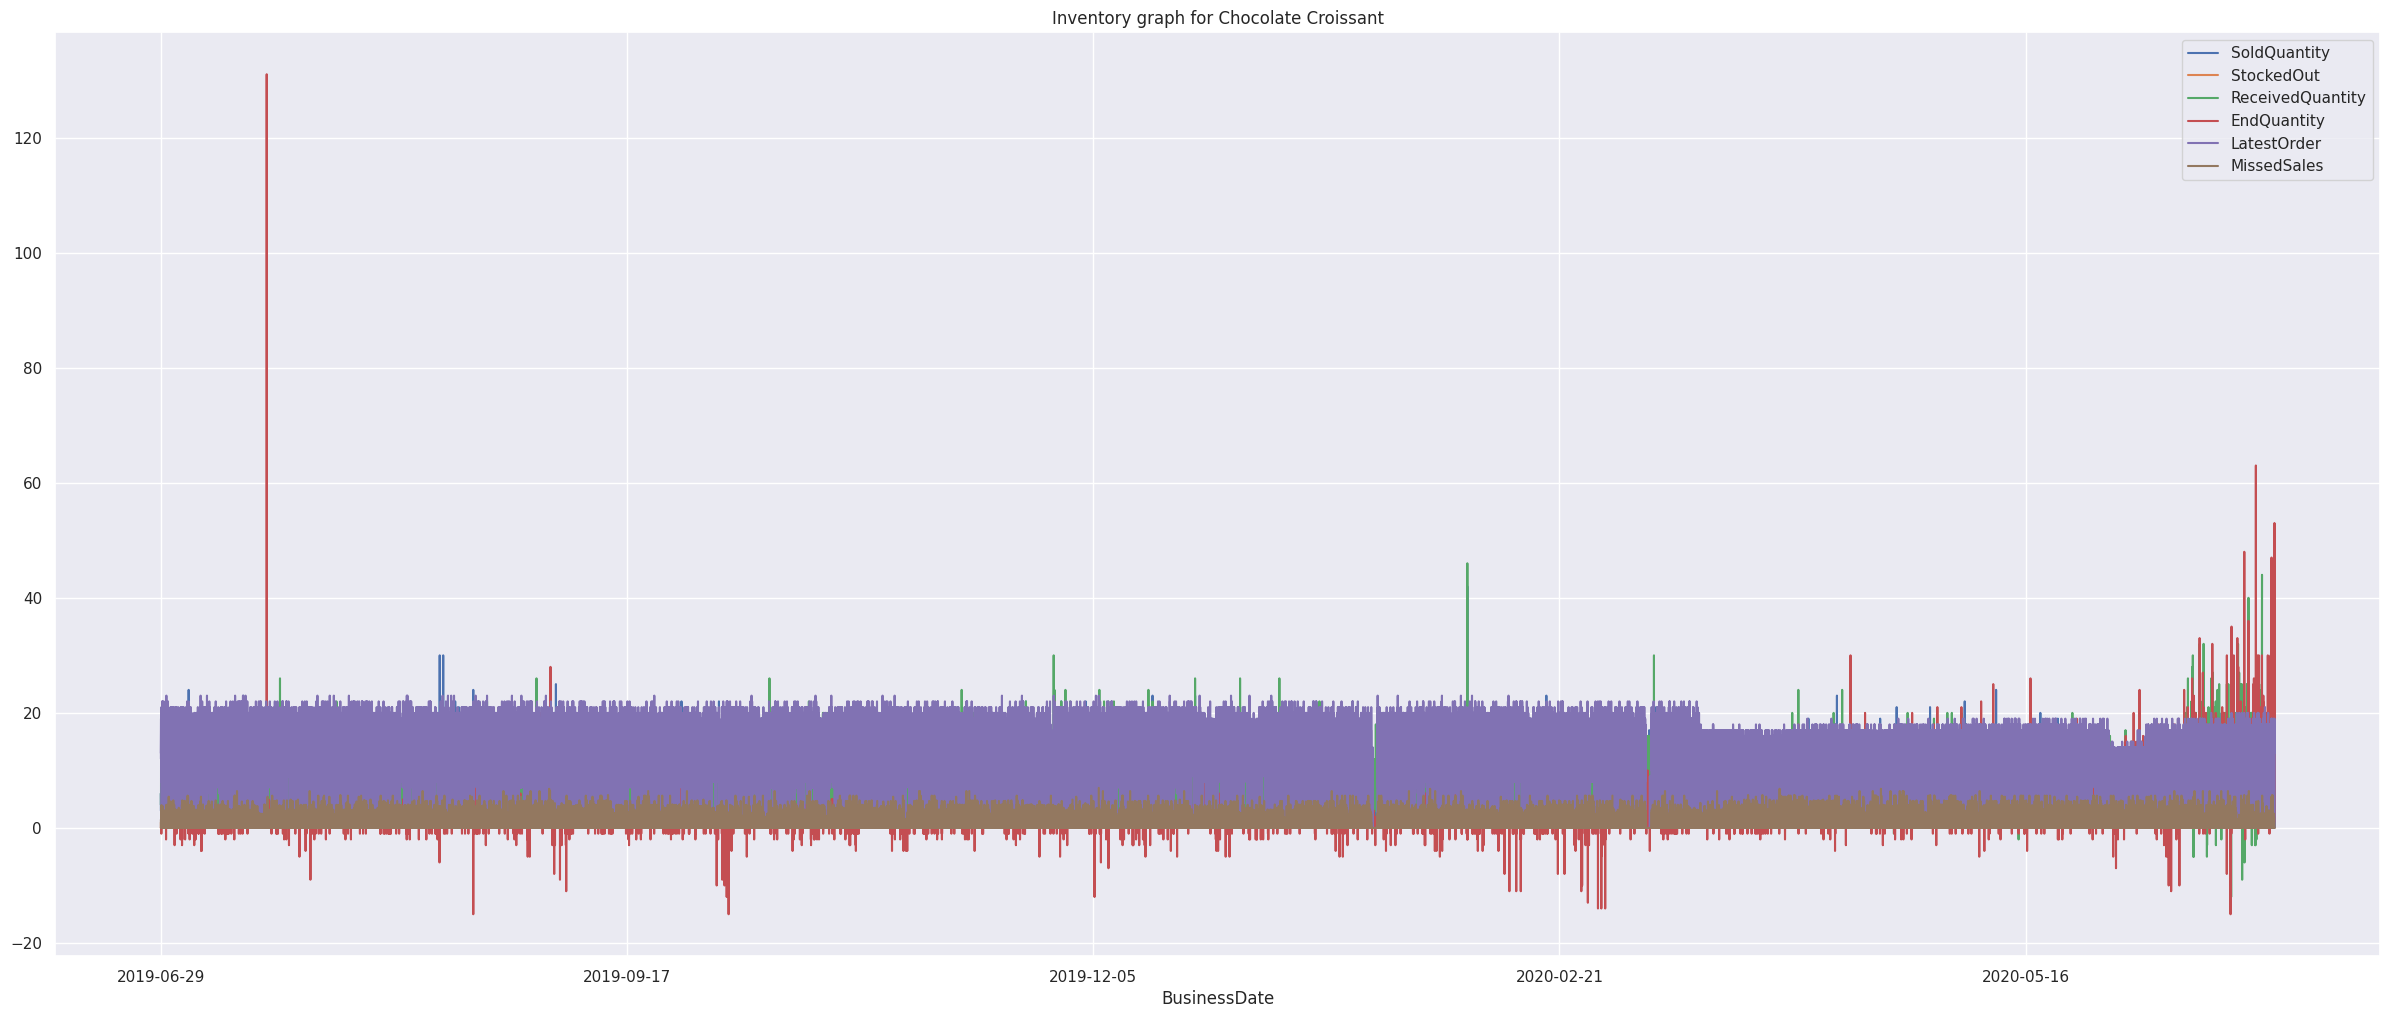

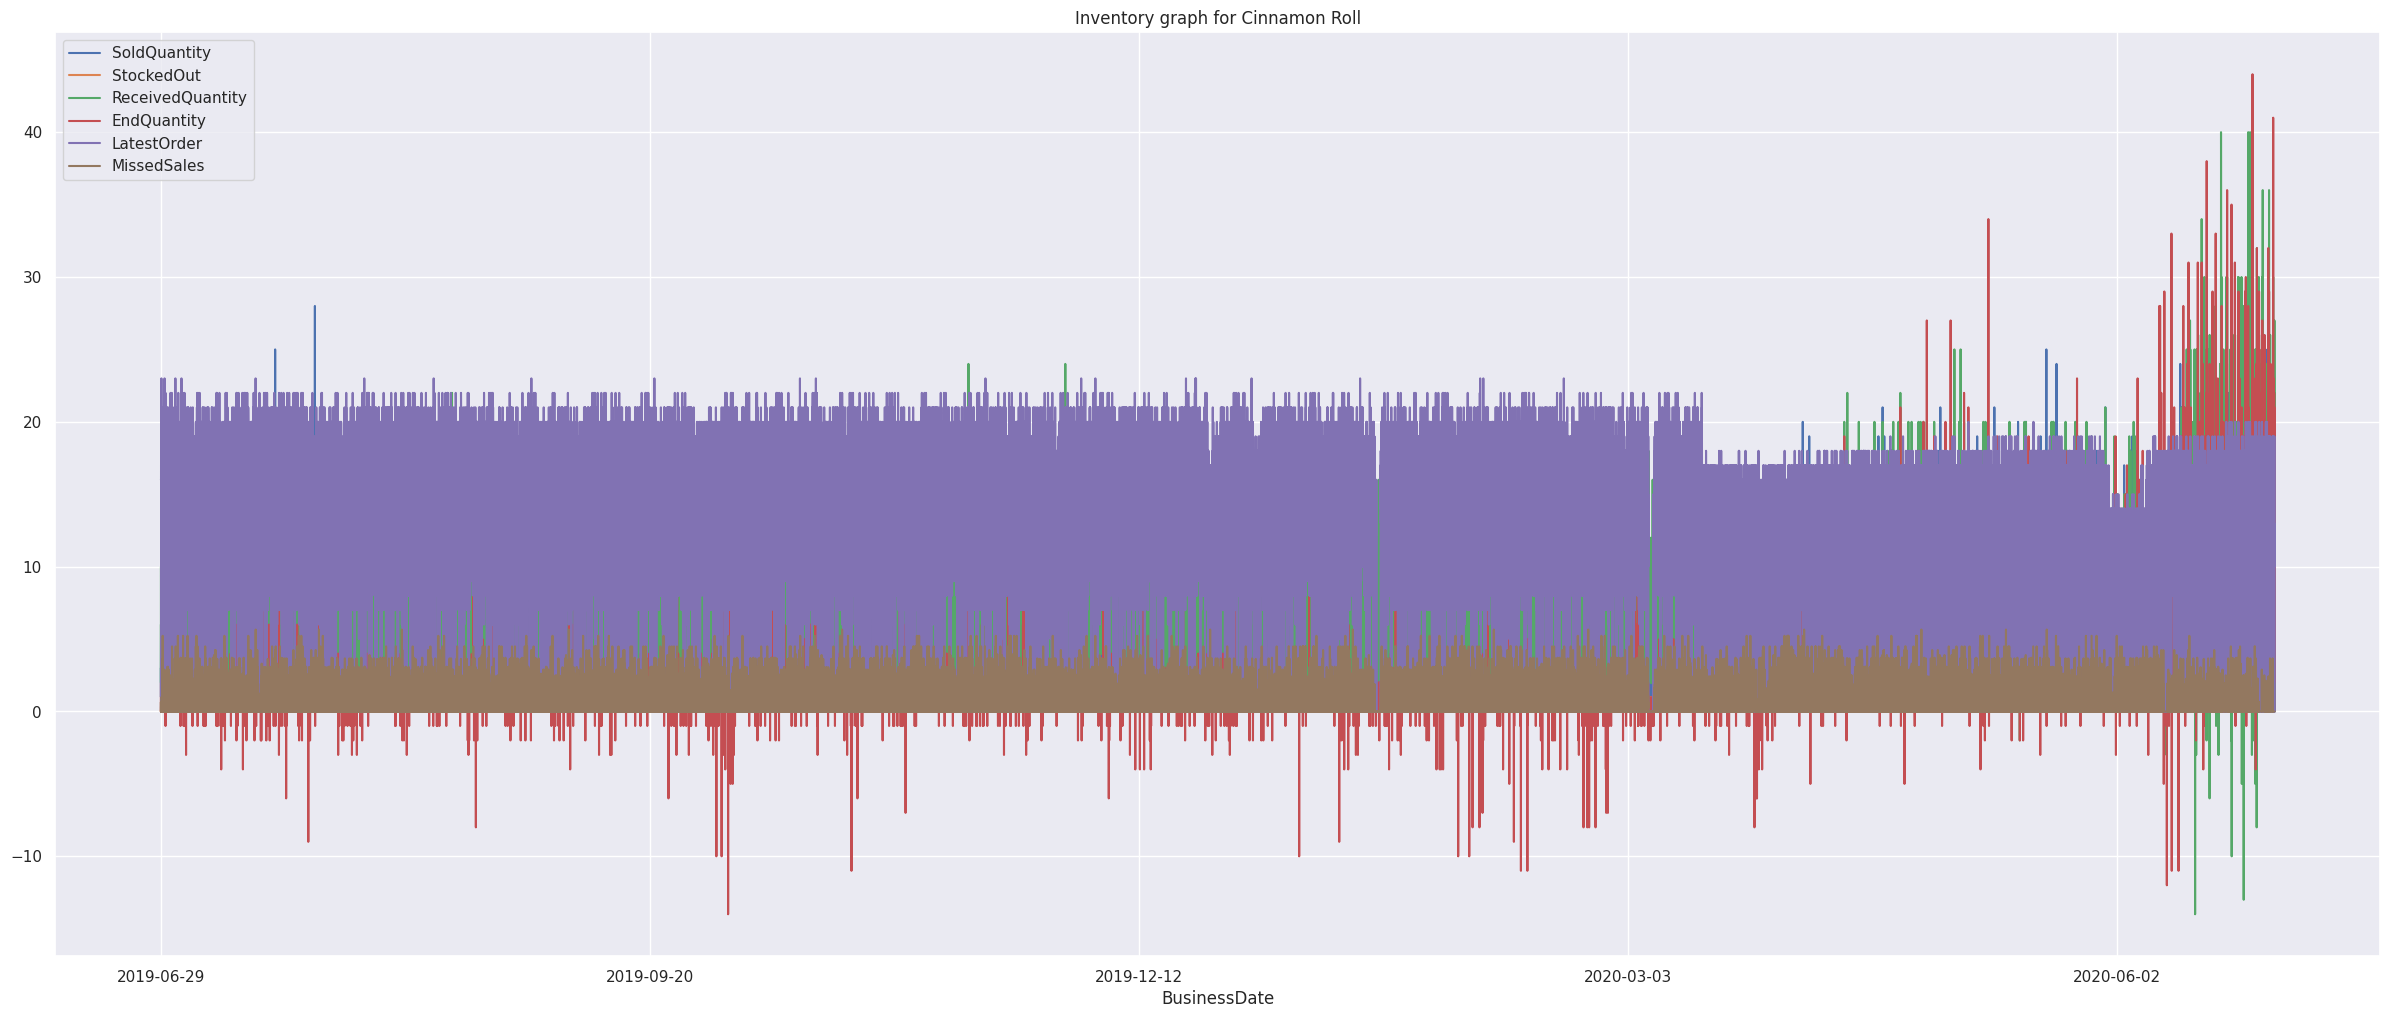

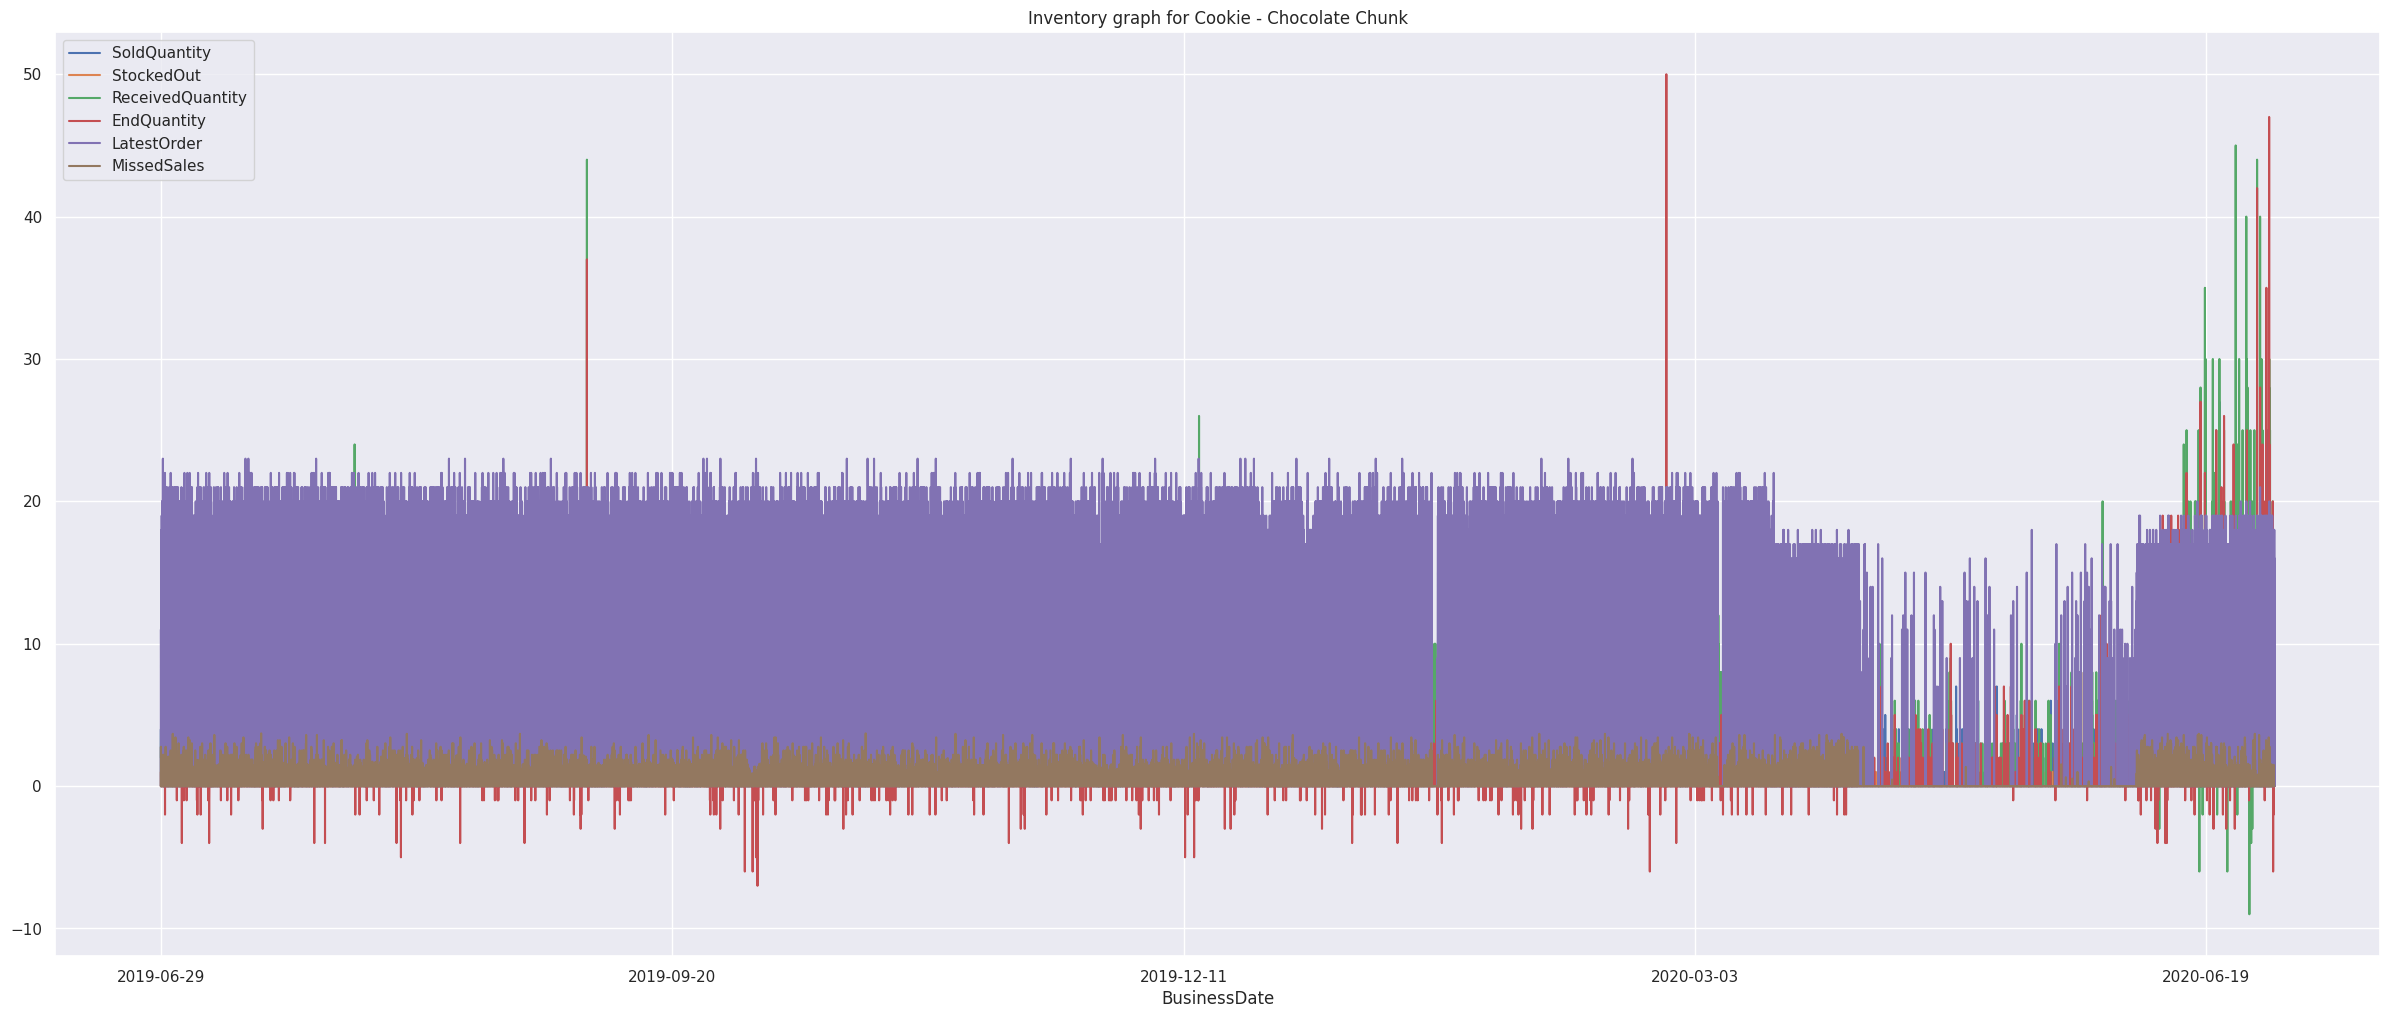

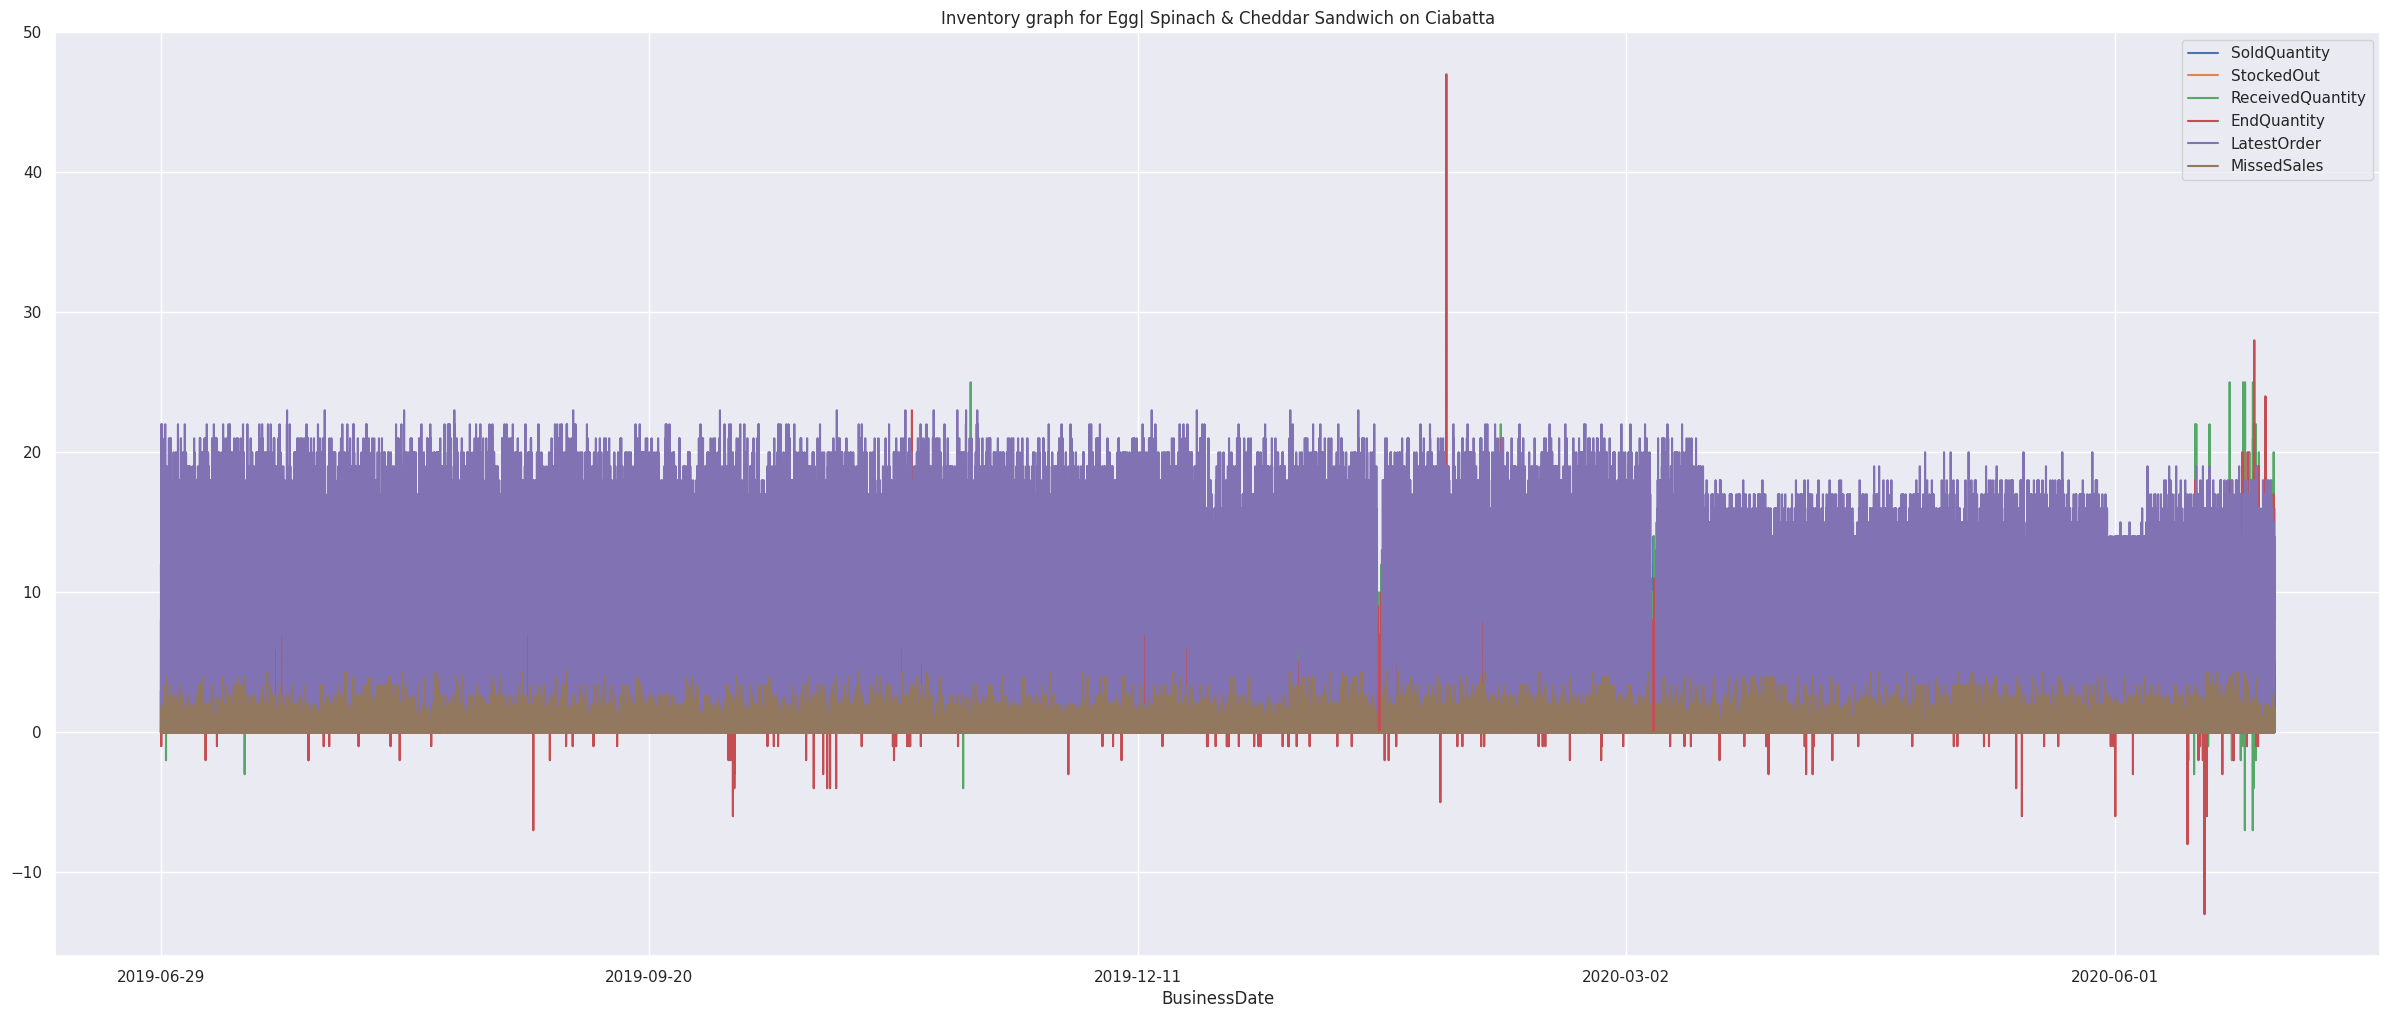

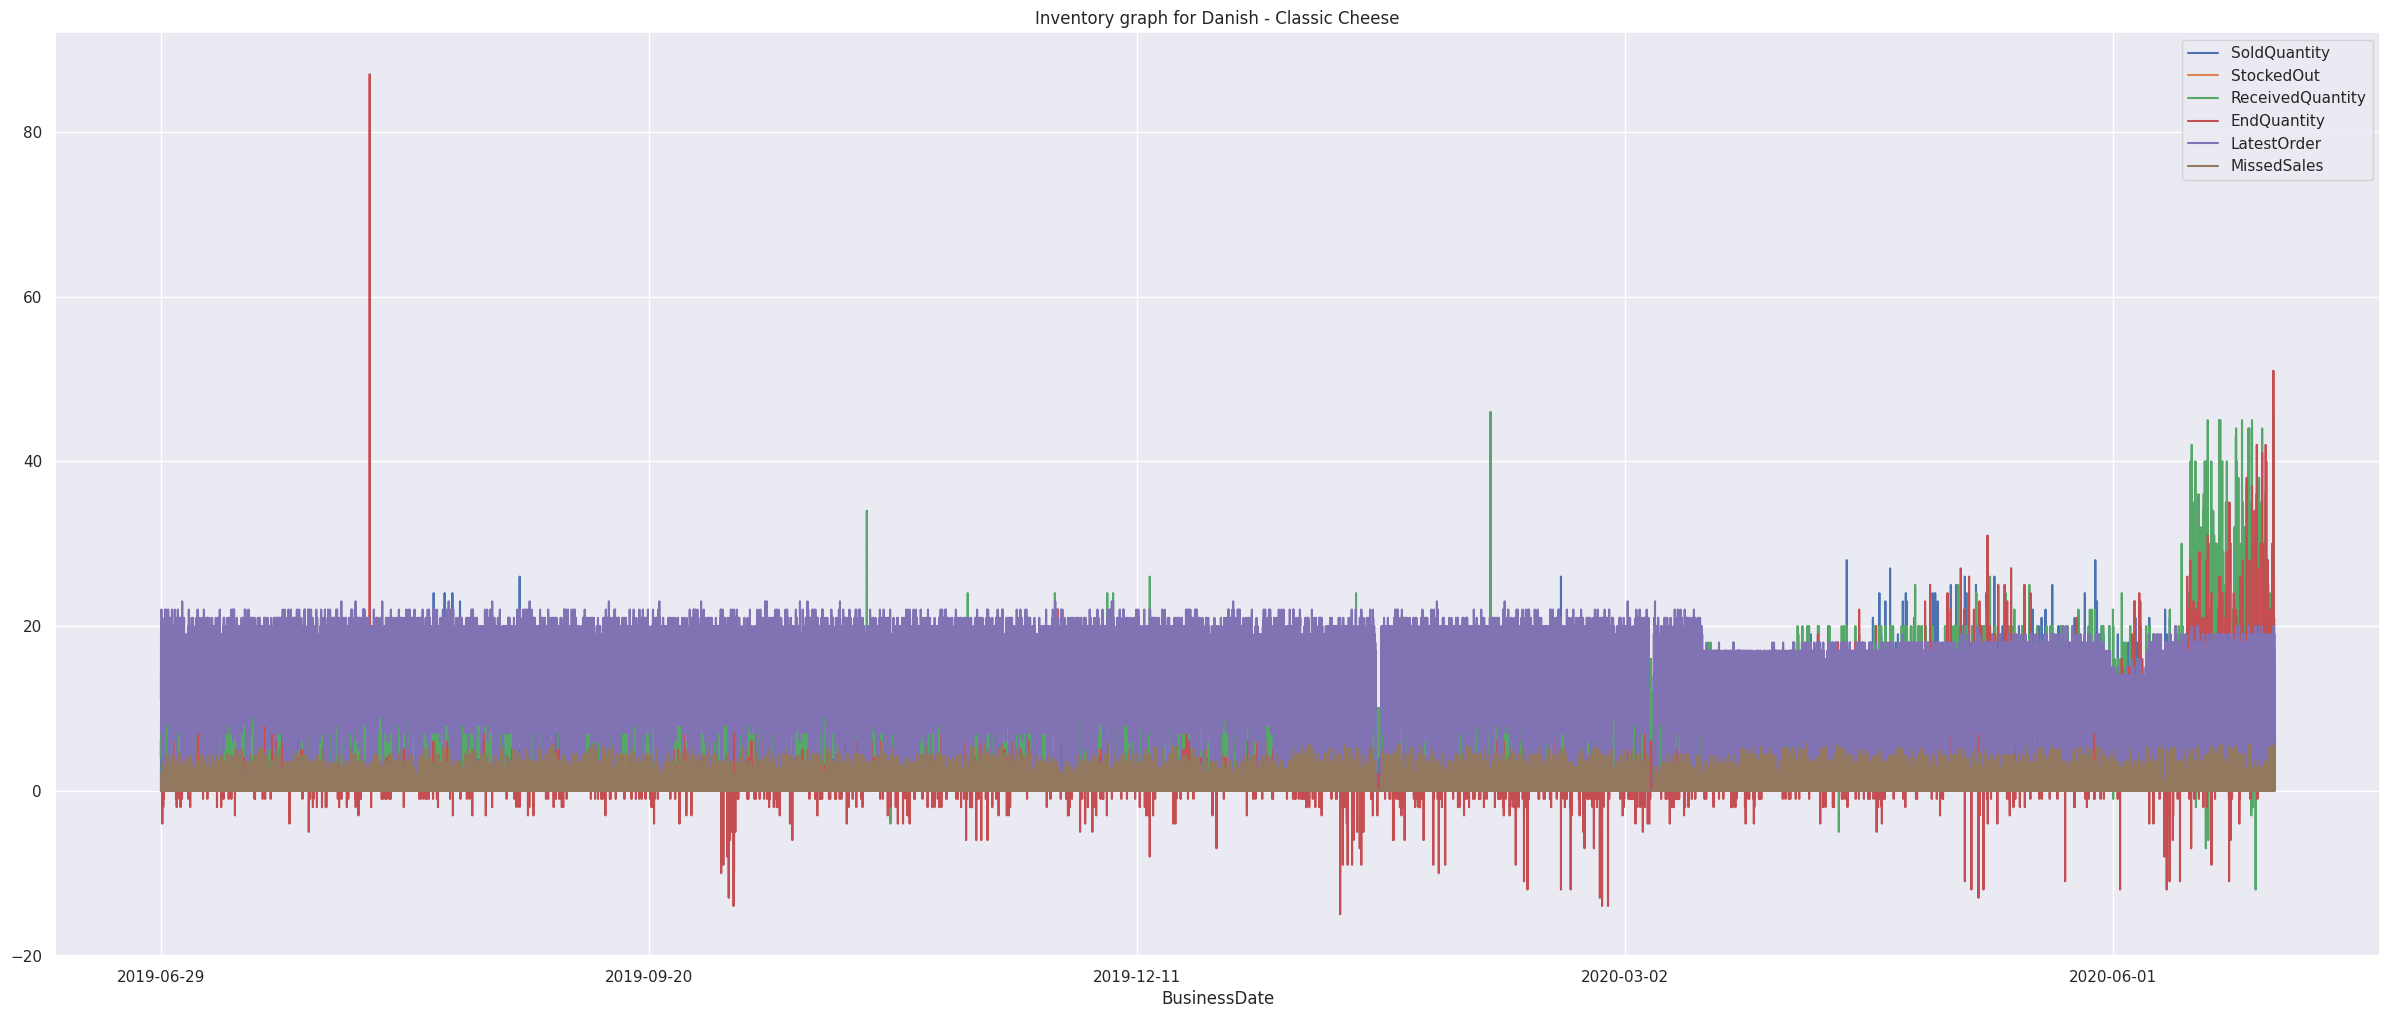

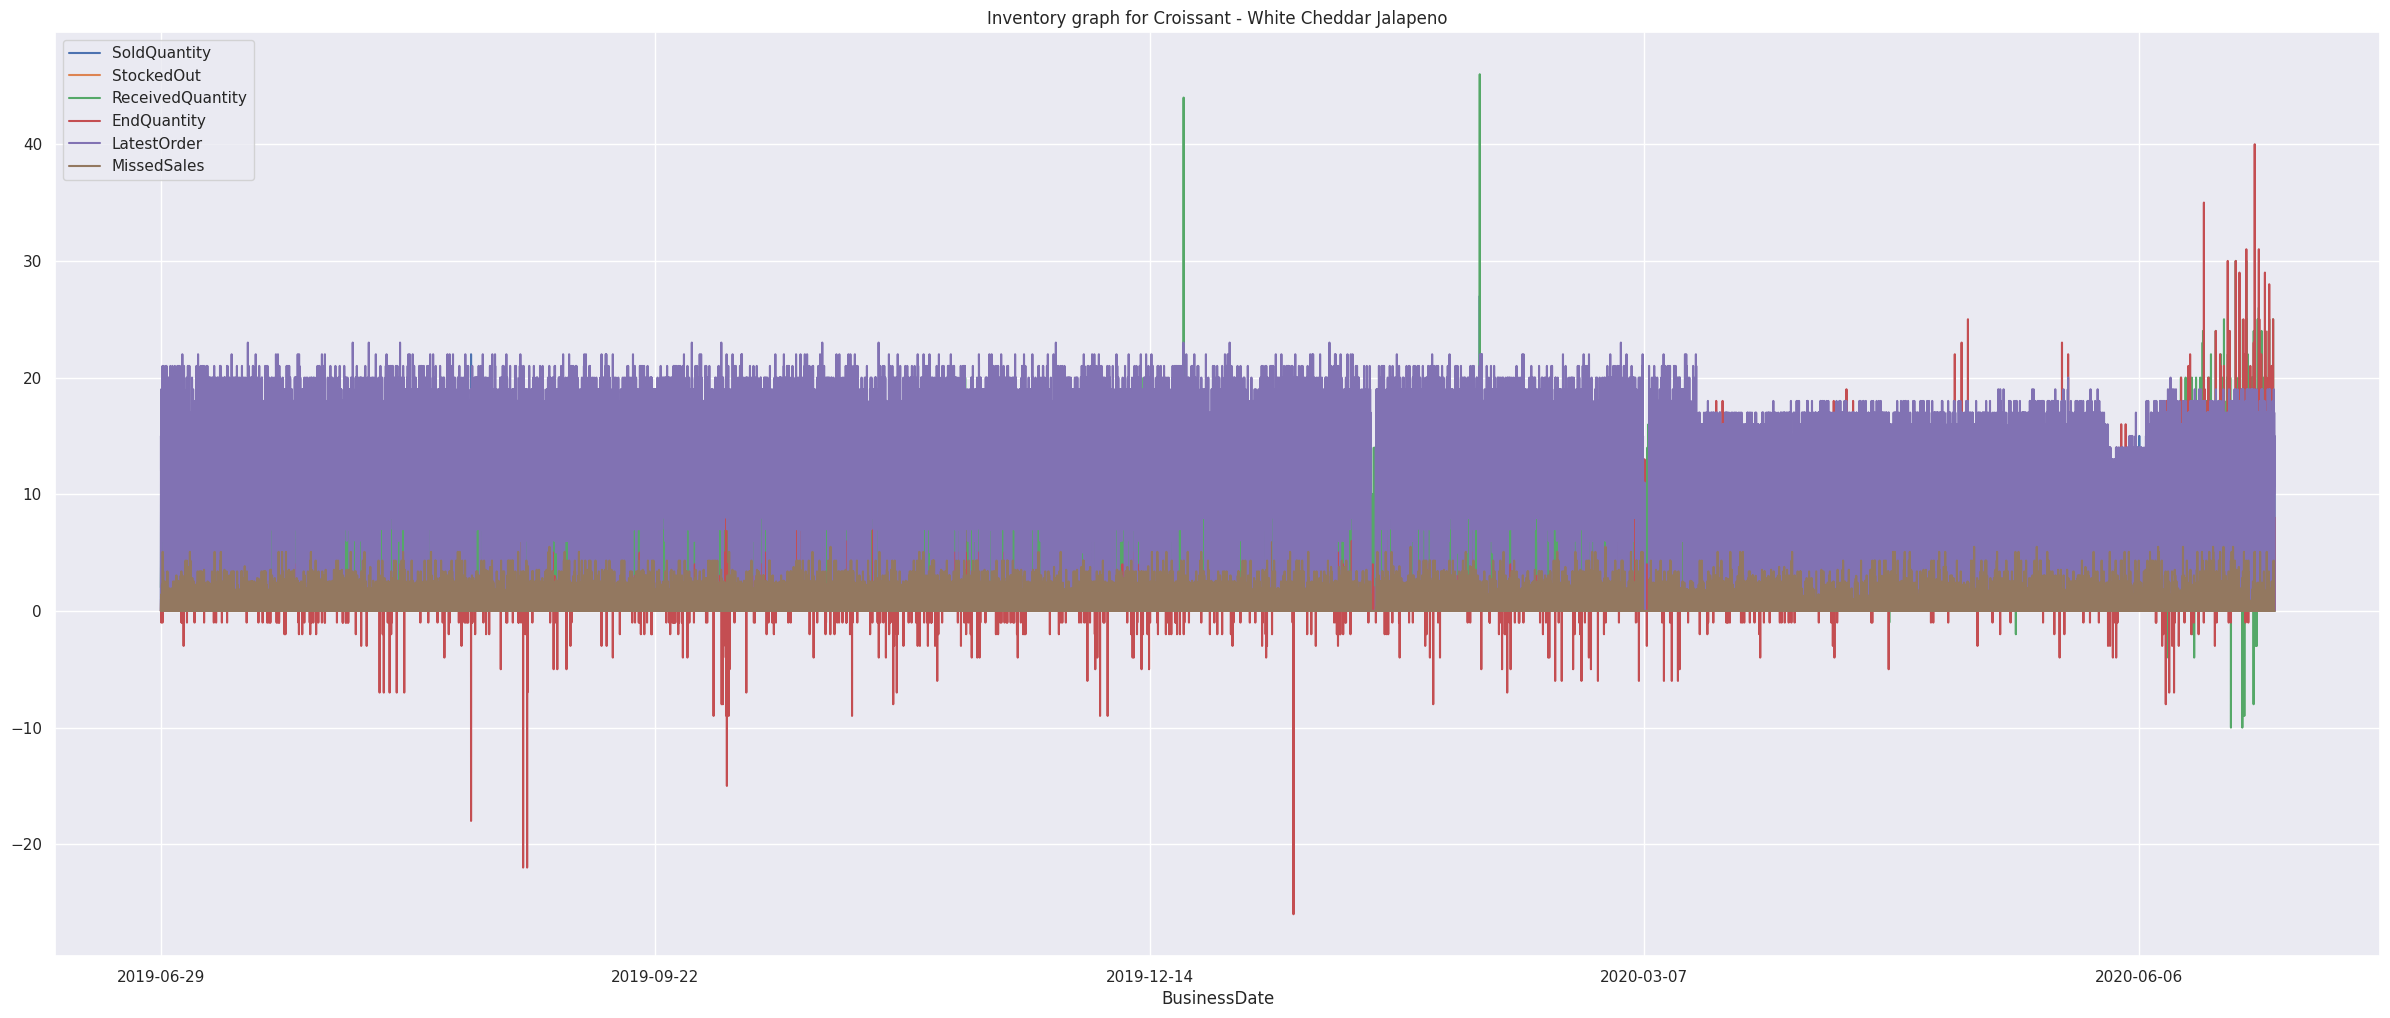

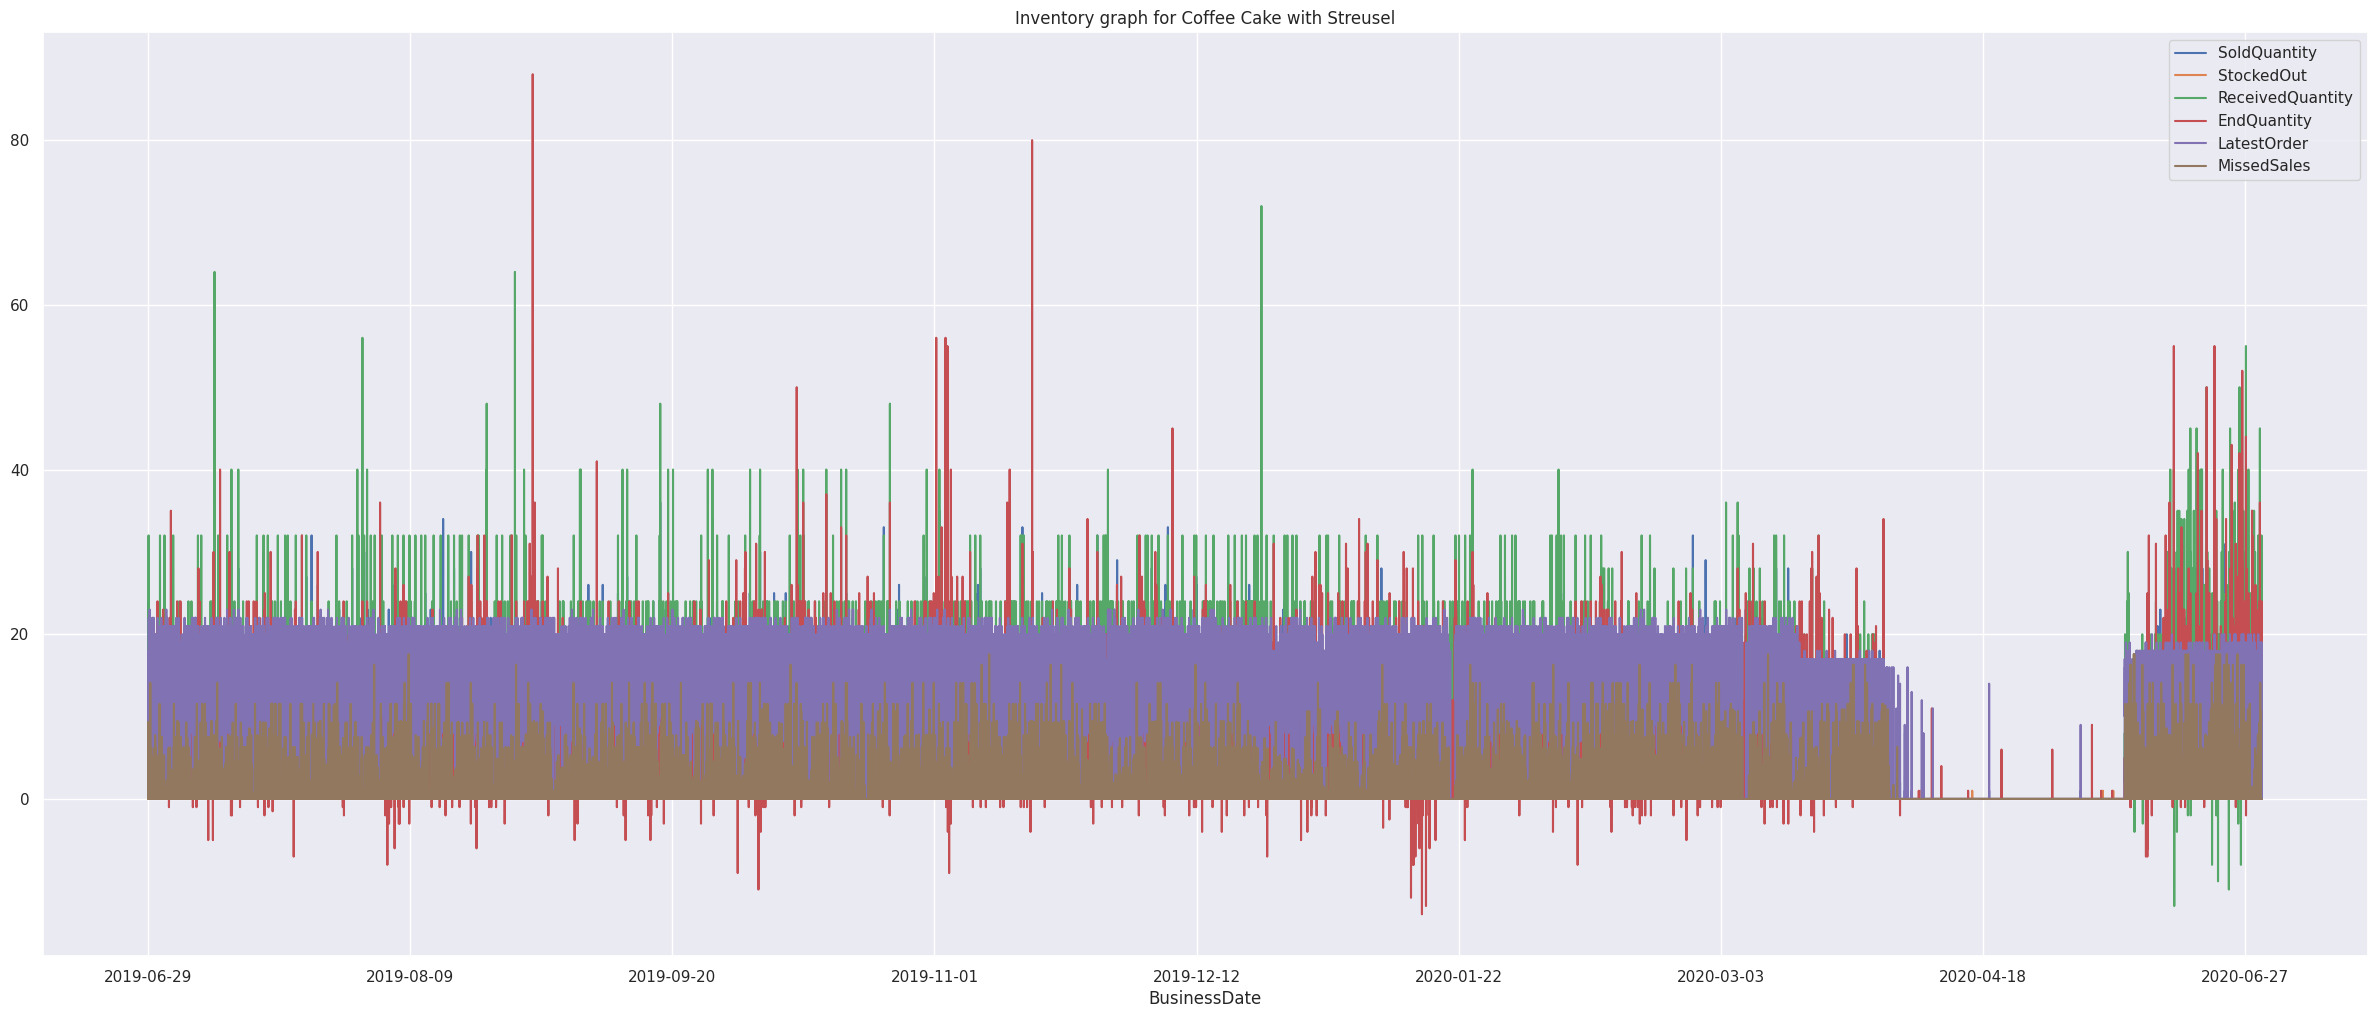

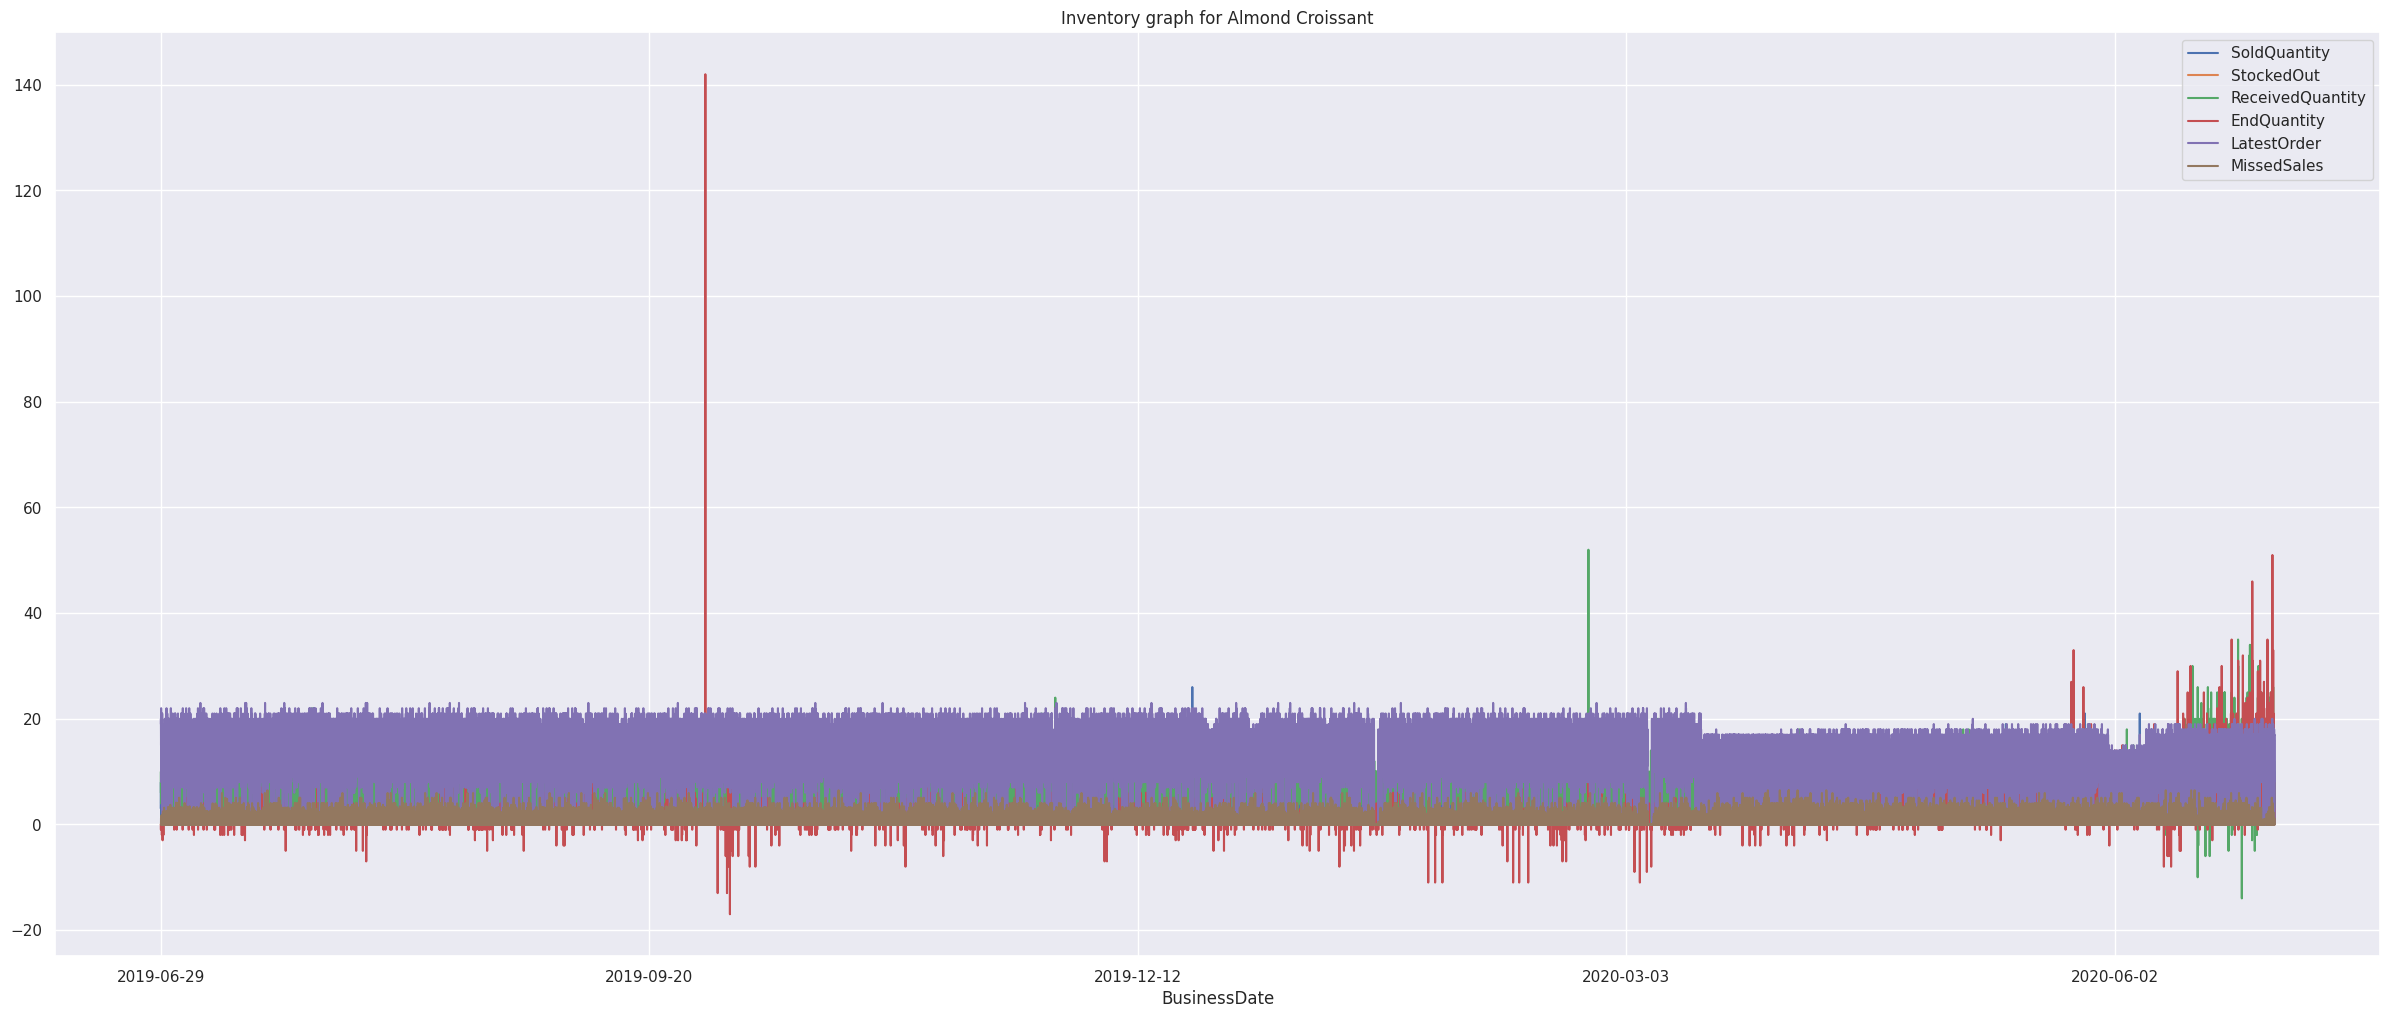

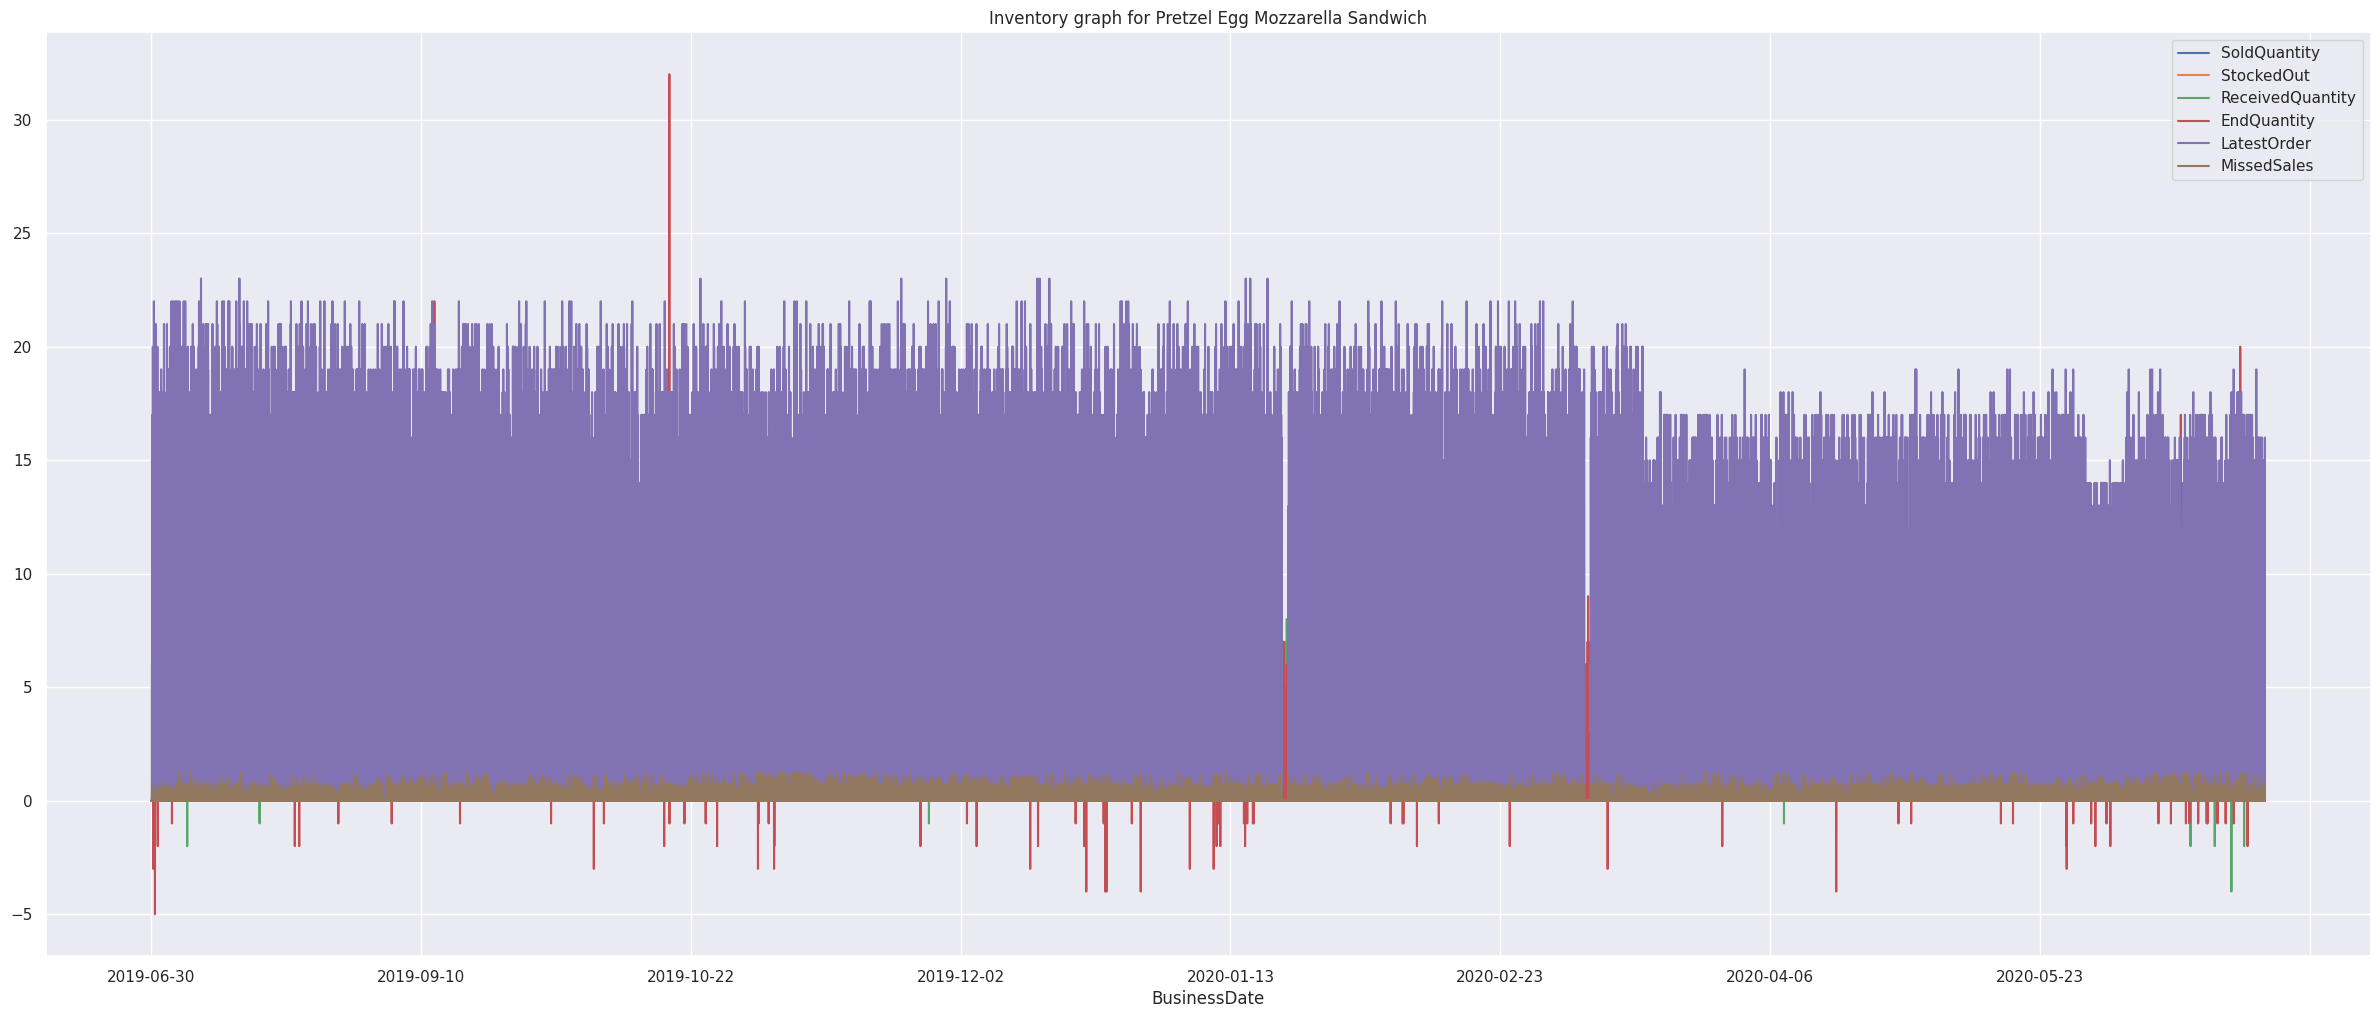

In [22]:
for products in all_products:
    specific_product_plot = coffeeData_filtered[coffeeData_filtered['Description'] == products].sort_values(by=['BusinessDate']).plot(kind='line', x='BusinessDate', y=['SoldQuantity', 'StockedOut', 'ReceivedQuantity', 'EndQuantity', 'LatestOrder', 'MissedSales'])
    specific_product_plot.set_title("Inventory graph for {}".format(products))
    f = specific_product_plot.figure
    f.set_figheight(12)
    f.set_figwidth(30)

In [25]:
def calculate_average_sales(row, grouped_data, past_weeks=4):
    current_date = row['BusinessDate']
    product = row['Description']
    stocked_out_store = row['StoreID']

    past_dates = [(current_date - timedelta(days=7*j)).strftime("%Y-%m-%d") for j in range(1, past_weeks + 1)]

    # Extract the sales data for the past dates for the given store
    past_sales = grouped_data.get_group((product, stocked_out_store)).set_index('BusinessDate').reindex(past_dates)

    # Calculate the average sales
    avg_sales = past_sales['SoldQuantity'].mean()

    return avg_sales * 0.75 if row['StockedOut'] == 1 else 0

# Group by description and store ID for efficient access
grouped_data = coffeeData_filtered.groupby


Text(0.5, 1.0, 'Estimated Loss of Sales per Year per Product')

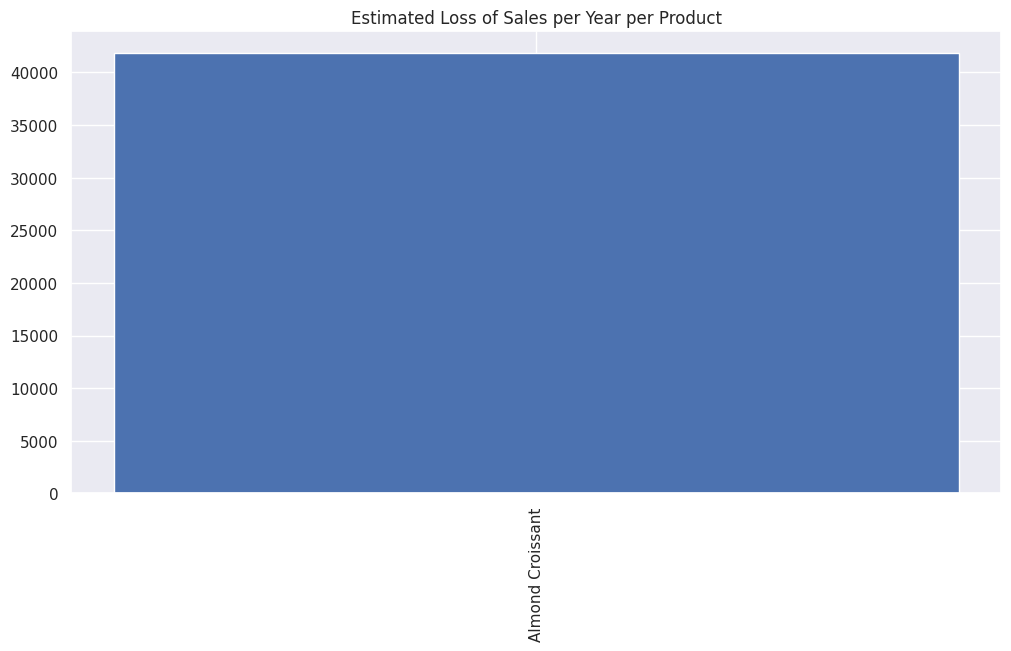

In [26]:
#print(estimated_product_sales_loss)
products = list(estimated_product_sales_loss.keys())
values = list(estimated_product_sales_loss.values())
plt.bar(range(len(estimated_product_sales_loss)), values, tick_label=products)
plt.xticks(rotation=90)
plt.title("Estimated Loss of Sales per Year per Product")

In [32]:
path = '/Coffee_Stores_Data.csv'

In [33]:
df = pd.read_csv(path)
df.head()

StoreID BusinessDate      PLU                             Description  \
0        2   2019-06-29  3000227                        Caprese Sandwich   
1        2   2019-06-29   830620                Honey Raisin Bran Muffin   
2        2   2019-06-29     6228   Pressed Juicery Spicy Greens w Ginger   
3        2   2019-06-29    12216                         Vive Juice Shot   
4        2   2019-06-29  3000277  Mixed Berries & Granola Yogurt Parfait   

     ItemType CategoryLvl1Desc CategoryLvl2Desc  CategoryLvl3Desc  \
0  Unassigned             Food        Cold Case      Ready to Eat   
1        Core             Food        Bake Case  Muffins & Scones   
2  Unassigned             Food        Cold Case    Ready to Drink   
3  Unassigned             Food        Cold Case    Ready to Drink   
4  Unassigned             Food        Cold Case      Ready to Eat   

   ReceivedQuantity  SoldQuantity  EndQuantity  LatestOrder  StockedOut  \
0               0.0           3.0          0.0           21           0   
1               4.0           2.0          0.0           10           0   
2               0.0           1.0          9.0           13           0   
3               0.0           0.0         27.0            0           0   
4               0.0           3.0          0.0           11           1   

   GroupID  MissedSales  
0      2.0     0.000000  
1      2.0     0.000000  
2      2.0     0.000000  
3      2.0     0.000000  
4      2.0     0.578969

In [34]:
from datetime import datetime
from datetime import timedelta
from datetime import date
import holidays

In [35]:
def isWeekDay(s):
  dtime = datetime.strptime(s, '%Y-%m-%d')

  return dtime.weekday() < 5

In [36]:
df['Weekday'] = df['BusinessDate'].apply(lambda d: isWeekDay(d))

In [37]:
us_holidays = holidays.US()

df['National Holiday'] = df['BusinessDate'].apply(lambda d: d in us_holidays)

In [38]:
df.head()

StoreID BusinessDate      PLU                             Description  \
0        2   2019-06-29  3000227                        Caprese Sandwich   
1        2   2019-06-29   830620                Honey Raisin Bran Muffin   
2        2   2019-06-29     6228   Pressed Juicery Spicy Greens w Ginger   
3        2   2019-06-29    12216                         Vive Juice Shot   
4        2   2019-06-29  3000277  Mixed Berries & Granola Yogurt Parfait   

     ItemType CategoryLvl1Desc CategoryLvl2Desc  CategoryLvl3Desc  \
0  Unassigned             Food        Cold Case      Ready to Eat   
1        Core             Food        Bake Case  Muffins & Scones   
2  Unassigned             Food        Cold Case    Ready to Drink   
3  Unassigned             Food        Cold Case    Ready to Drink   
4  Unassigned             Food        Cold Case      Ready to Eat   

   ReceivedQuantity  SoldQuantity  EndQuantity  LatestOrder  StockedOut  \
0               0.0           3.0          0.0           21           0   
1               4.0           2.0          0.0           10           0   
2               0.0           1.0          9.0           13           0   
3               0.0           0.0         27.0            0           0   
4               0.0           3.0          0.0           11           1   

   GroupID  MissedSales  Weekday  National Holiday  
0      2.0     0.000000    False             False  
1      2.0     0.000000    False             False  
2      2.0     0.000000    False             False  
3      2.0     0.000000    False             False  
4      2.0     0.578969    False             False

In [39]:
weekday_sales = sum(df[df['Weekday'] == True]['SoldQuantity'])
weekend_sales = sum(df[df['Weekday'] == False]['SoldQuantity'])
holiday_sales = sum(df[df['National Holiday'] == True]['SoldQuantity'])

weekday_sales, weekend_sales, holiday_sales

(3048713.0, 1111439.0, 101457.0)

Text(0.5, 1.0, 'Sold Quantity based on Day')

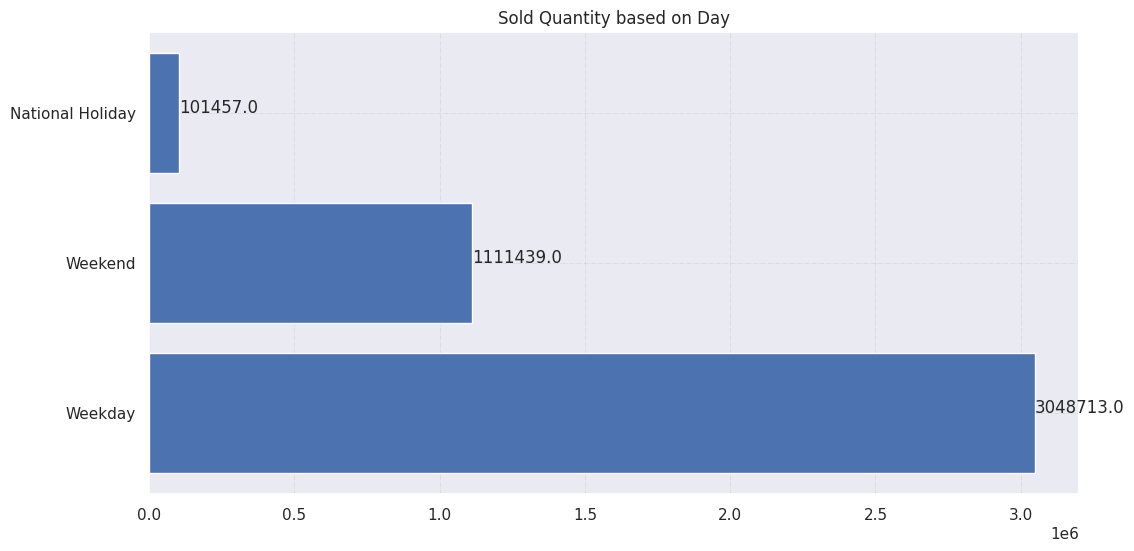

In [41]:
labels = ['Weekday', 'Weekend', 'National Holiday']
values = [weekday_sales, weekend_sales, holiday_sales]

fig, ax = plt.subplots()

ax.grid(which='both', color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))

ax.barh(labels, values)
ax.set_title('Sold Quantity based on Day')
